In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

#### Importing the dataset

In [4]:
Default = pd.read_excel('CompData-1.xlsx')
Default.head()

Co_Code          Co_Name  _Operating_Expense_Rate  \
0    16974      Hind.Cables             8.820000e+09   
1    21214  Tata Tele. Mah.             9.380000e+09   
2    14852     ABG Shipyard             3.800000e+09   
3     2439              GTL             6.440000e+09   
4    23505  Bharati Defence             3.680000e+09   

   _Research_and_development_expense_rate  _Cash_flow_rate  \
0                            0.000000e+00         0.462045   
1                            4.230000e+09         0.460116   
2                            8.150000e+08         0.449893   
3                            0.000000e+00         0.462731   
4                            0.000000e+00         0.463117   

   _Interest_bearing_debt_interest_rate  _Tax_rate_A  _Cash_Flow_Per_Share  \
0                              0.000352     0.001417              0.322558   
1                              0.000716     0.000000              0.315520   
2                              0.000496     0.000000              0.299851   
3                              0.000592     0.009313              0.319834   
4                              0.000782     0.400243              0.325104   

   _Per_Share_Net_profit_before_tax_Yuan_  \
0                                0.194472   
1                                0.161633   
2                                0.172554   
3                                0.174738   
4                                0.176546   

   _Realized_Sales_Gross_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                                  0.022074  ...              0.310901   
1                                  0.021902  ...              0.314572   
2                                  0.022186  ...              0.314777   
3                                  0.027638  ...              0.316974   
4                                  0.022072  ...              0.317729   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                              0.034913                       0   
1                              0.041653                       0   
2                              0.033560                       0   
3                              0.016527                       0   
4                              0.034497                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                    0.028801             0.620927   
1                    0.006191             0.622513   
2                    0.001095             0.623749   
3                    0.003749             0.622963   
4                    0.006595             0.624419   

   _Degree_of_Financial_Leverage_DFL  \
0                           0.026930   
1                           0.026297   
2                           0.027276   
3                           0.026988   
4                           0.027498   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                           0.565744                 1   
1                                           0.560741                 1   
2                                           0.566744                 1   
3                                           0.565950                 1   
4                                           0.567177                 1   

   _Equity_to_Liability  Default  
0              0.015338        0  
1              0.029445        1  
2              0.041718        0  
3              0.026956        0  
4              0.019900        0  

[5 rows x 58 columns]

#### Dataset Shape

In [5]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


#### Dataset Info

In [6]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

#### Checking Duplicates

In [7]:
Default.duplicated().sum()

0

* There is no duplicates present in the data.

In [8]:
Default.drop(['Co_Code','Co_Name'], axis = 1, inplace = True)

* The Company code and Name columns are dropped.

In [9]:
Default["_Liability_Assets_Flag"] = pd.Categorical(Default["_Liability_Assets_Flag"])
Default["_Net_Income_Flag"] = pd.Categorical(Default["_Net_Income_Flag"])
Default["Default"] = pd.Categorical(Default["Default"])

* The Default,Liability Assets Flag and Net Income Flag columns are changed to categorical datatype.

In [10]:
Default.head()

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
0             8.820000e+09                            0.000000e+00   
1             9.380000e+09                            4.230000e+09   
2             3.800000e+09                            8.150000e+08   
3             6.440000e+09                            0.000000e+00   
4             3.680000e+09                            0.000000e+00   

   _Cash_flow_rate  _Interest_bearing_debt_interest_rate  _Tax_rate_A  \
0         0.462045                              0.000352     0.001417   
1         0.460116                              0.000716     0.000000   
2         0.449893                              0.000496     0.000000   
3         0.462731                              0.000592     0.009313   
4         0.463117                              0.000782     0.400243   

   _Cash_Flow_Per_Share  _Per_Share_Net_profit_before_tax_Yuan_  \
0              0.322558                                0.194472   
1              0.315520                                0.161633   
2              0.299851                                0.172554   
3              0.319834                                0.174738   
4              0.325104                                0.176546   

   _Realized_Sales_Gross_Profit_Growth_Rate  _Operating_Profit_Growth_Rate  \
0                                  0.022074                       0.848021   
1                                  0.021902                       0.839645   
2                                  0.022186                       0.848196   
3                                  0.027638                       0.848391   
4                                  0.022072                       0.847987   

   _Continuous_Net_Profit_Growth_Rate  ...  _Cash_Flow_to_Equity  \
0                            0.217590  ...              0.310901   
1                            0.217360  ...              0.314572   
2                            0.217573  ...              0.314777   
3                            0.217662  ...              0.316974   
4                            0.217589  ...              0.317729   

   _Current_Liability_to_Current_Assets  _Liability_Assets_Flag  \
0                              0.034913                       0   
1                              0.041653                       0   
2                              0.033560                       0   
3                              0.016527                       0   
4                              0.034497                       0   

   _Total_assets_to_GNP_price  _No_credit_Interval  \
0                    0.028801             0.620927   
1                    0.006191             0.622513   
2                    0.001095             0.623749   
3                    0.003749             0.622963   
4                    0.006595             0.624419   

   _Degree_of_Financial_Leverage_DFL  \
0                           0.026930   
1                           0.026297   
2                           0.027276   
3                           0.026988   
4                           0.027498   

   _Interest_Coverage_Ratio_Interest_expense_to_EBIT  _Net_Income_Flag  \
0                                           0.565744                 1   
1                                           0.560741                 1   
2                                           0.566744                 1   
3                                           0.565950                 1   
4                                           0.567177                 1   

   _Equity_to_Liability  Default  
0              0.015338        0  
1              0.029445        1  
2              0.041718        0  
3              0.026956        0  
4              0.019900        0  

[5 rows x 56 columns]

In [11]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 56 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   _Operating_Expense_Rate                            2058 non-null   float64 
 1   _Research_and_development_expense_rate             2058 non-null   float64 
 2   _Cash_flow_rate                                    2058 non-null   float64 
 3   _Interest_bearing_debt_interest_rate               2058 non-null   float64 
 4   _Tax_rate_A                                        2058 non-null   float64 
 5   _Cash_Flow_Per_Share                               1891 non-null   float64 
 6   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64 
 7   _Realized_Sales_Gross_Profit_Growth_Rate           2058 non-null   float64 
 8   _Operating_Profit_Growth_Rate                      2058 non-null   float64 
 9

#### Descriptive Statistics

In [12]:
pd.options.display.float_format = '{:.2f}'.format
Default.describe(include="all").T

count  unique  top  \
_Operating_Expense_Rate                           2058.00     NaN  NaN   
_Research_and_development_expense_rate            2058.00     NaN  NaN   
_Cash_flow_rate                                   2058.00     NaN  NaN   
_Interest_bearing_debt_interest_rate              2058.00     NaN  NaN   
_Tax_rate_A                                       2058.00     NaN  NaN   
_Cash_Flow_Per_Share                              1891.00     NaN  NaN   
_Per_Share_Net_profit_before_tax_Yuan_            2058.00     NaN  NaN   
_Realized_Sales_Gross_Profit_Growth_Rate          2058.00     NaN  NaN   
_Operating_Profit_Growth_Rate                     2058.00     NaN  NaN   
_Continuous_Net_Profit_Growth_Rate                2058.00     NaN  NaN   
_Total_Asset_Growth_Rate                          2058.00     NaN  NaN   
_Net_Value_Growth_Rate                            2058.00     NaN  NaN   
_Total_Asset_Return_Growth_Rate_Ratio             2058.00     NaN  NaN   
_Cash_Reinvestment_perc                           2058.00     NaN  NaN   
_Current_Ratio                                    2058.00     NaN  NaN   
_Quick_Ratio                                      2058.00     NaN  NaN   
_Interest_Expense_Ratio                           2058.00     NaN  NaN   
_Total_debt_to_Total_net_worth                    2037.00     NaN  NaN   
_Long_term_fund_suitability_ratio_A               2058.00     NaN  NaN   
_Net_profit_before_tax_to_Paid_in_capital         2058.00     NaN  NaN   
_Total_Asset_Turnover                             2058.00     NaN  NaN   
_Accounts_Receivable_Turnover                     2058.00     NaN  NaN   
_Average_Collection_Days                          2058.00     NaN  NaN   
_Inventory_Turnover_Rate_times                    2058.00     NaN  NaN   
_Fixed_Assets_Turnover_Frequency                  2058.00     NaN  NaN   
_Net_Worth_Turnover_Rate_times                    2058.00     NaN  NaN   
_Operating_profit_per_person                      2058.00     NaN  NaN   
_Allocation_rate_per_person                       2058.00     NaN  NaN   
_Quick_Assets_to_Total_Assets                     2058.00     NaN  NaN   
_Cash_to_Total_Assets                             1962.00     NaN  NaN   
_Quick_Assets_to_Current_Liability                2058.00     NaN  NaN   
_Cash_to_Current_Liability                        2058.00     NaN  NaN   
_Operating_Funds_to_Liability                     2058.00     NaN  NaN   
_Inventory_to_Working_Capital                     2058.00     NaN  NaN   
_Inventory_to_Current_Liability                   2058.00     NaN  NaN   
_Long_term_Liability_to_Current_Assets            2058.00     NaN  NaN   
_Retained_Earnings_to_Total_Assets                2058.00     NaN  NaN   
_Total_income_to_Total_expense                    2058.00     NaN  NaN   
_Total_expense_to_Assets                          2058.00     NaN  NaN   
_Current_Asset_Turnover_Rate                      2058.00     NaN  NaN   
_Quick_Asset_Turnover_Rate                        2058.00     NaN  NaN   
_Cash_Turnover_Rate                               2058.00     NaN  NaN   
_Fixed_Assets_to_Assets                           2058.00     NaN  NaN   
_Cash_Flow_to_Total_Assets                        2058.00     NaN  NaN   
_Cash_Flow_to_Liability                           2058.00     NaN  NaN   
_CFO_to_Assets                                    2058.00     NaN  NaN   
_Cash_Flow_to_Equity                              2058.00     NaN  NaN   
_Current_Liability_to_Current_Assets              2044.00     NaN  NaN   
_Liability_Assets_Flag                            2058.00    2.00 0.00   
_Total_assets_to_GNP_price                        2058.00     NaN  NaN   
_No_credit_Interval                               2058.00     NaN  NaN   
_Degree_of_Financial_Leverage_DFL                 2058.00     NaN  NaN   
_Interest_Coverage_Ratio_Interest_expense_to_EBIT 2058.00     NaN  NaN   
_Net_Income_Flag                                  2058.0

In [13]:
2051/2058

0.9965986394557823

In [14]:
Default.drop(['_Net_Income_Flag','_Liability_Assets_Flag'], axis = 1, inplace = True)

* Net Income Flag is constant and 99% of Liability Assest Flag has only one category.
* These two are dropped as they are not that significant to the model.

In [15]:
Default.describe(include="all").T

count  unique  top  \
_Operating_Expense_Rate                           2058.00     NaN  NaN   
_Research_and_development_expense_rate            2058.00     NaN  NaN   
_Cash_flow_rate                                   2058.00     NaN  NaN   
_Interest_bearing_debt_interest_rate              2058.00     NaN  NaN   
_Tax_rate_A                                       2058.00     NaN  NaN   
_Cash_Flow_Per_Share                              1891.00     NaN  NaN   
_Per_Share_Net_profit_before_tax_Yuan_            2058.00     NaN  NaN   
_Realized_Sales_Gross_Profit_Growth_Rate          2058.00     NaN  NaN   
_Operating_Profit_Growth_Rate                     2058.00     NaN  NaN   
_Continuous_Net_Profit_Growth_Rate                2058.00     NaN  NaN   
_Total_Asset_Growth_Rate                          2058.00     NaN  NaN   
_Net_Value_Growth_Rate                            2058.00     NaN  NaN   
_Total_Asset_Return_Growth_Rate_Ratio             2058.00     NaN  NaN   
_Cash_Reinvestment_perc                           2058.00     NaN  NaN   
_Current_Ratio                                    2058.00     NaN  NaN   
_Quick_Ratio                                      2058.00     NaN  NaN   
_Interest_Expense_Ratio                           2058.00     NaN  NaN   
_Total_debt_to_Total_net_worth                    2037.00     NaN  NaN   
_Long_term_fund_suitability_ratio_A               2058.00     NaN  NaN   
_Net_profit_before_tax_to_Paid_in_capital         2058.00     NaN  NaN   
_Total_Asset_Turnover                             2058.00     NaN  NaN   
_Accounts_Receivable_Turnover                     2058.00     NaN  NaN   
_Average_Collection_Days                          2058.00     NaN  NaN   
_Inventory_Turnover_Rate_times                    2058.00     NaN  NaN   
_Fixed_Assets_Turnover_Frequency                  2058.00     NaN  NaN   
_Net_Worth_Turnover_Rate_times                    2058.00     NaN  NaN   
_Operating_profit_per_person                      2058.00     NaN  NaN   
_Allocation_rate_per_person                       2058.00     NaN  NaN   
_Quick_Assets_to_Total_Assets                     2058.00     NaN  NaN   
_Cash_to_Total_Assets                             1962.00     NaN  NaN   
_Quick_Assets_to_Current_Liability                2058.00     NaN  NaN   
_Cash_to_Current_Liability                        2058.00     NaN  NaN   
_Operating_Funds_to_Liability                     2058.00     NaN  NaN   
_Inventory_to_Working_Capital                     2058.00     NaN  NaN   
_Inventory_to_Current_Liability                   2058.00     NaN  NaN   
_Long_term_Liability_to_Current_Assets            2058.00     NaN  NaN   
_Retained_Earnings_to_Total_Assets                2058.00     NaN  NaN   
_Total_income_to_Total_expense                    2058.00     NaN  NaN   
_Total_expense_to_Assets                          2058.00     NaN  NaN   
_Current_Asset_Turnover_Rate                      2058.00     NaN  NaN   
_Quick_Asset_Turnover_Rate                        2058.00     NaN  NaN   
_Cash_Turnover_Rate                               2058.00     NaN  NaN   
_Fixed_Assets_to_Assets                           2058.00     NaN  NaN   
_Cash_Flow_to_Total_Assets                        2058.00     NaN  NaN   
_Cash_Flow_to_Liability                           2058.00     NaN  NaN   
_CFO_to_Assets                                    2058.00     NaN  NaN   
_Cash_Flow_to_Equity                              2058.00     NaN  NaN   
_Current_Liability_to_Current_Assets              2044.00     NaN  NaN   
_Total_assets_to_GNP_price                        2058.00     NaN  NaN   
_No_credit_Interval                               2058.00     NaN  NaN   
_Degree_of_Financial_Leverage_DFL                 2058.00     NaN  NaN   
_Interest_Coverage_Ratio_Interest_expense_to_EBIT 2058.00     NaN  NaN   
_Equity_to_Liability                              2058.00     NaN  NaN   
Default                                           2058.0

### EDA

#### Count Plot

In [16]:
cat = list(Default.dtypes[Default.dtypes != 'float64'].index)

for i in cat:
    print(i.upper())
    print(Default[i].value_counts())
    print(i," in Percentage")
    print(Default[i].value_counts(normalize=True)*100)
    print('*'*100)

DEFAULT
0    1838
1     220
Name: Default, dtype: int64
Default  in Percentage
0   89.31
1   10.69
Name: Default, dtype: float64
****************************************************************************************************


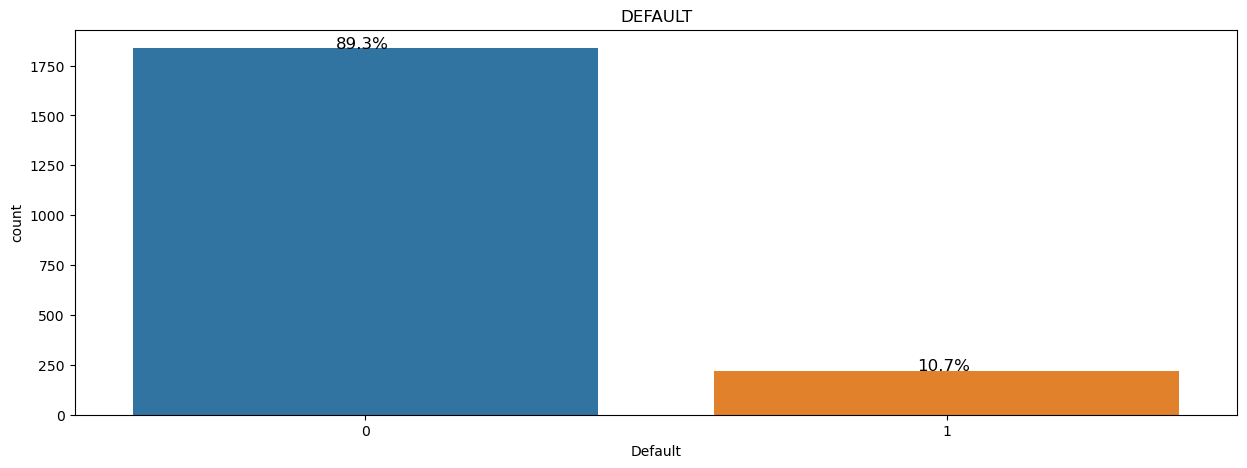

In [17]:
def count_plot(Default,cat):
        total = len(Default[cat])
        fig,axes = plt.subplots(figsize = (15,5))
        ax = sns.countplot(x = i,data = Default)
        axes.set_title(i.upper())
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
            x = p.get_x() + p.get_width() / 2 - 0.05 
            y = p.get_y() + p.get_height()           
        
            ax.annotate(percentage, (x, y), size = 12)
for i in cat:
    count_plot(Default,i)

#### Box Plot

In [18]:
num = list(Default.dtypes[Default.dtypes == 'float64'].index)

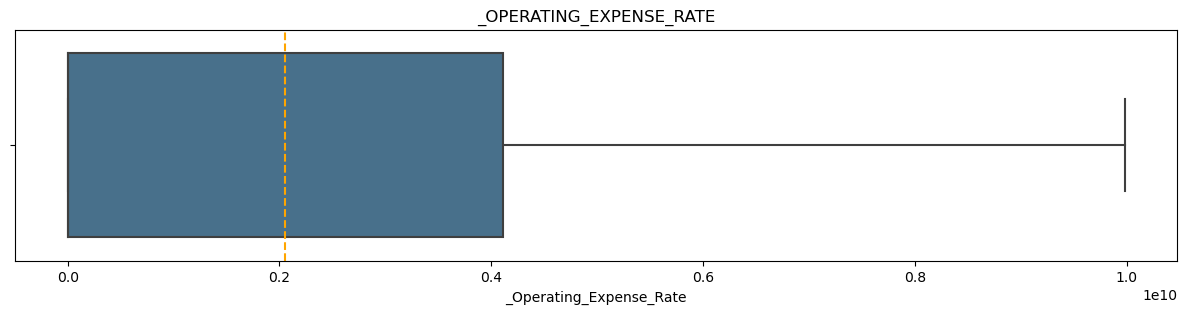

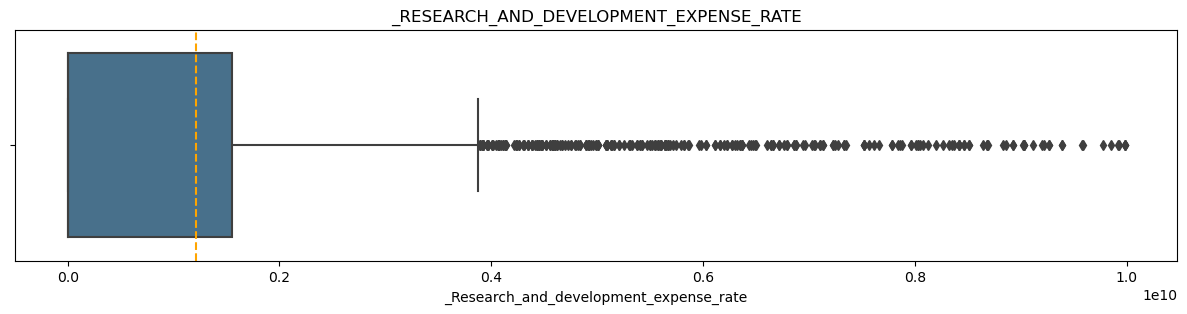

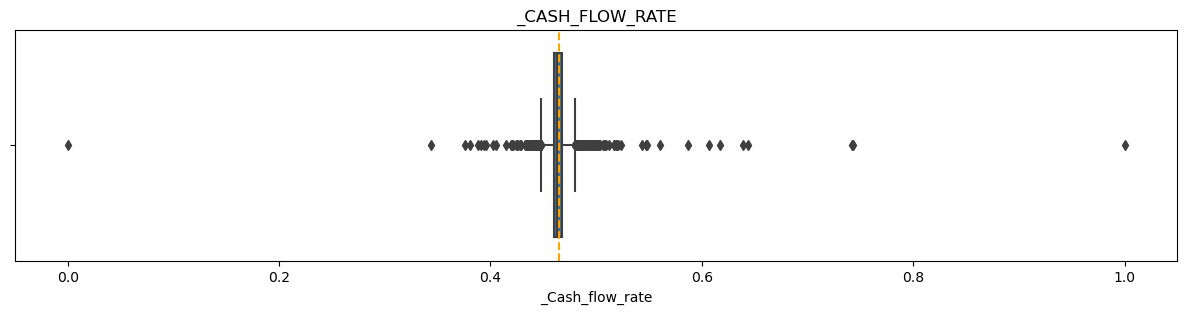

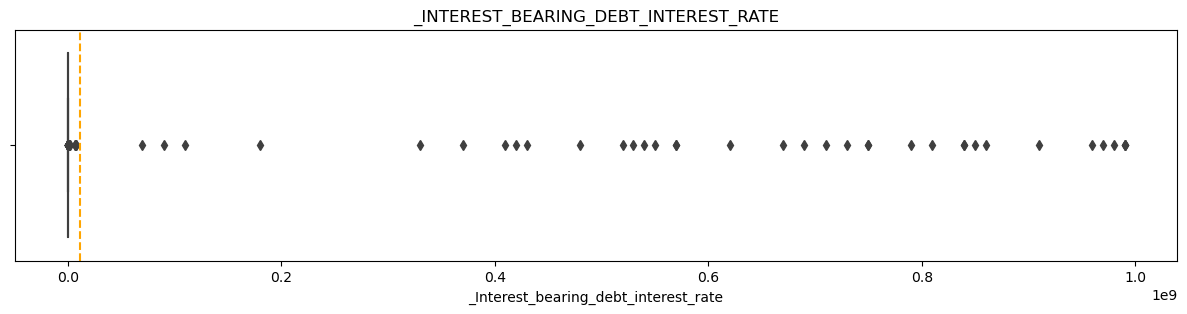

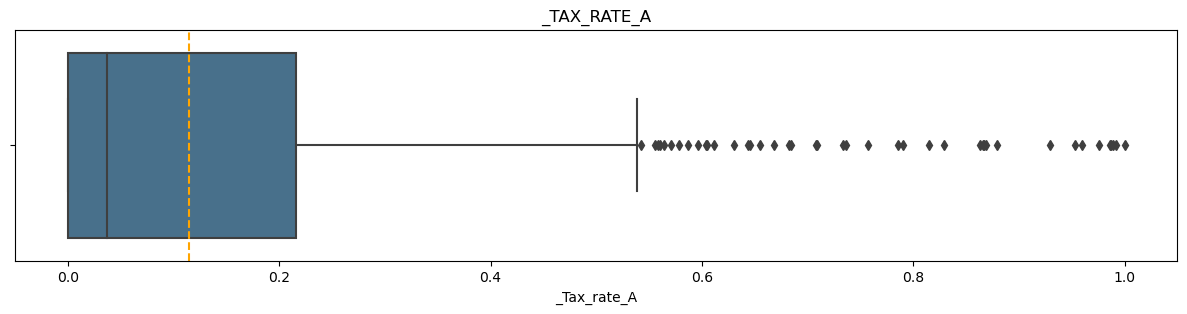

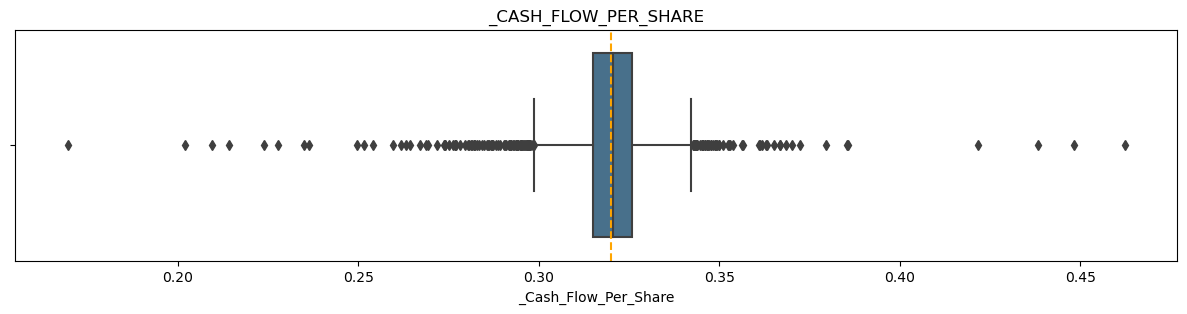

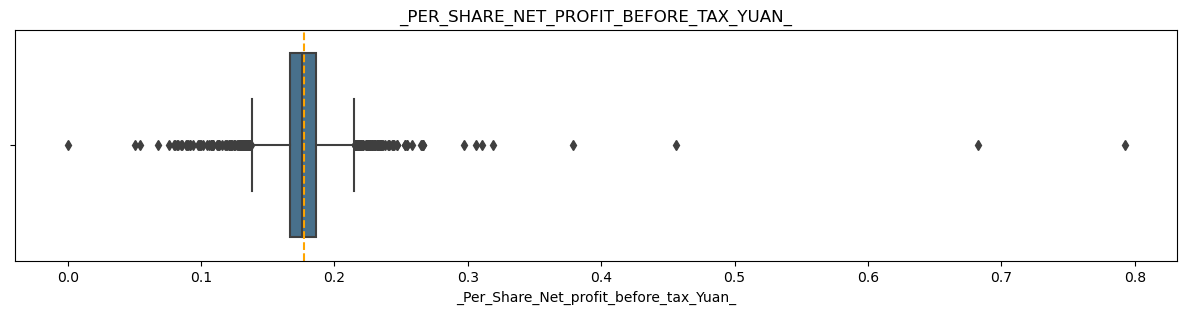

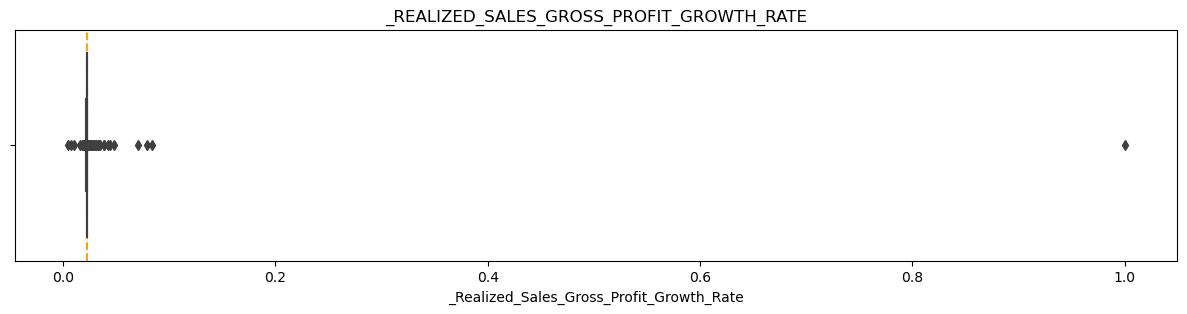

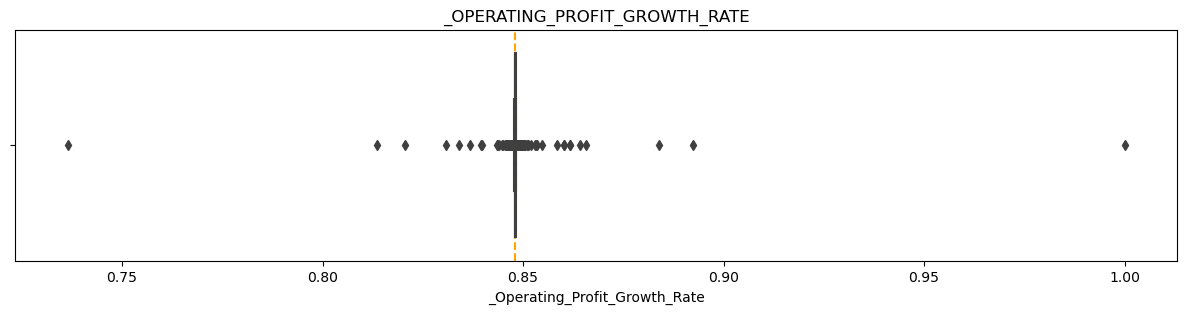

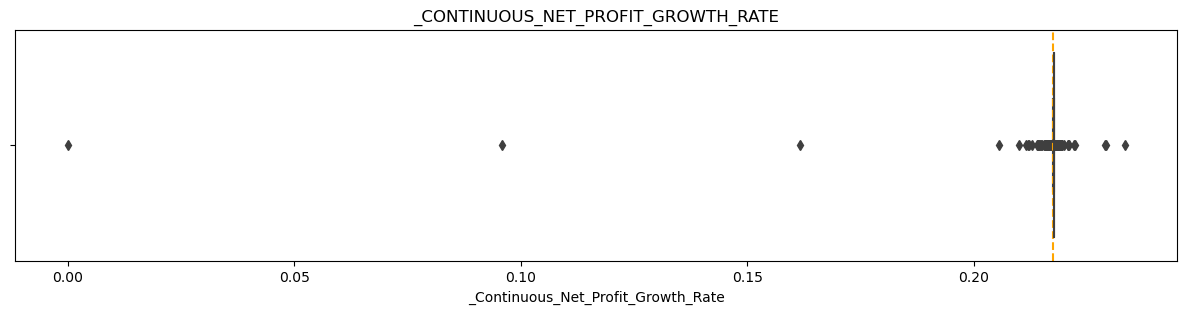

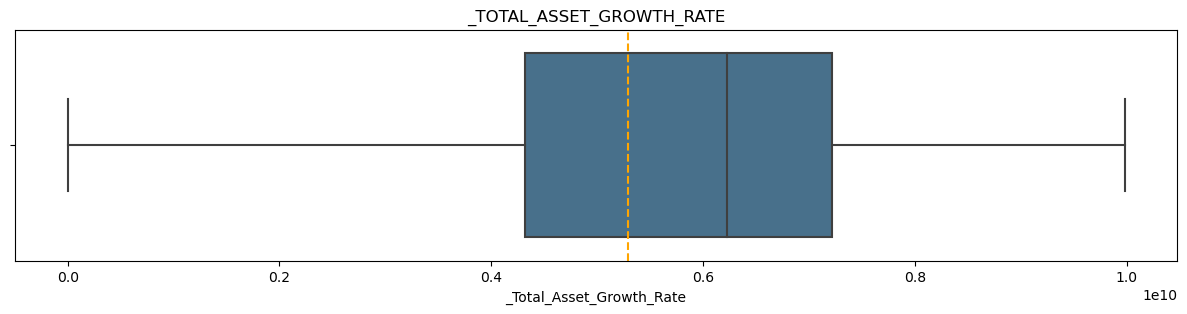

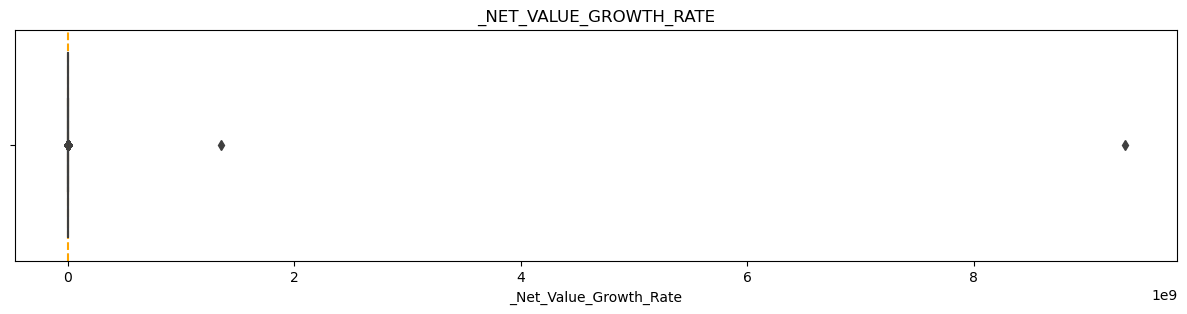

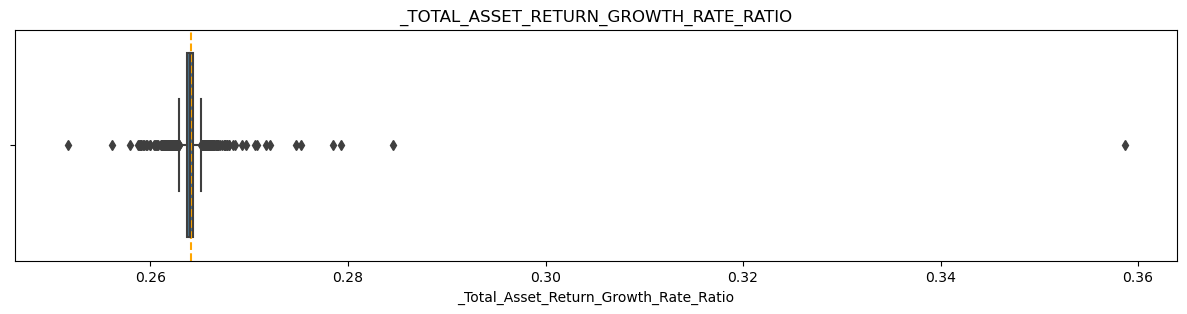

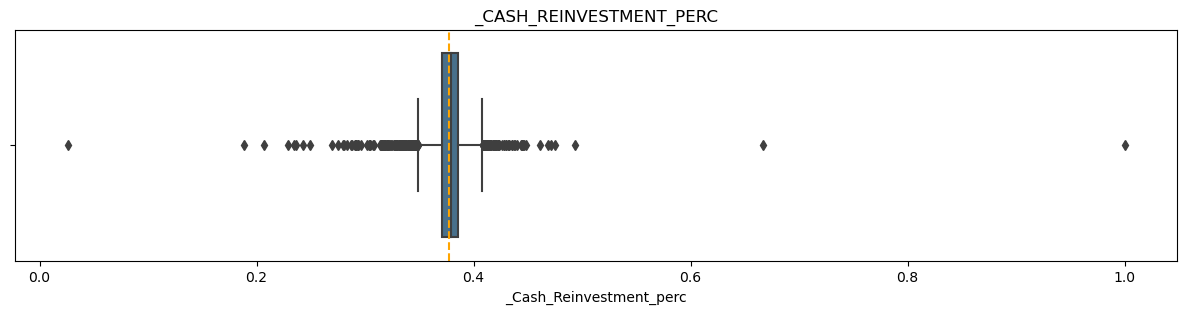

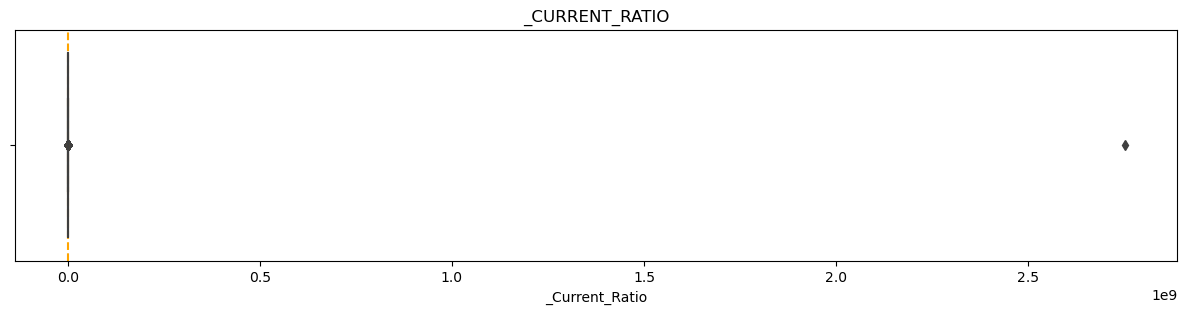

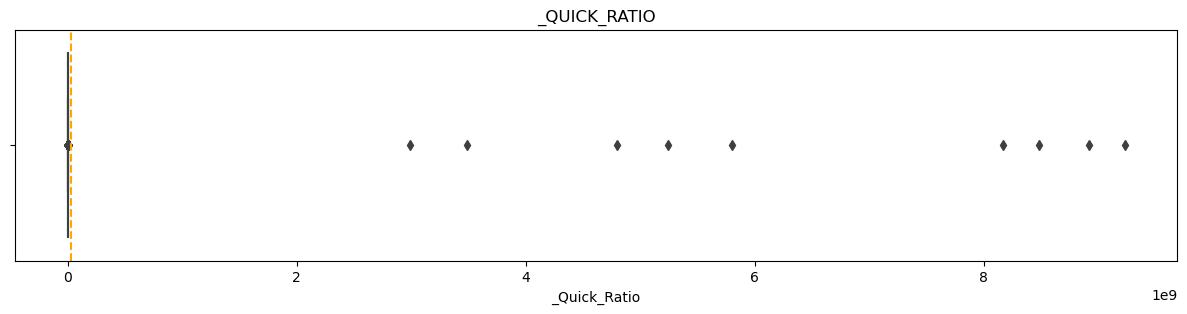

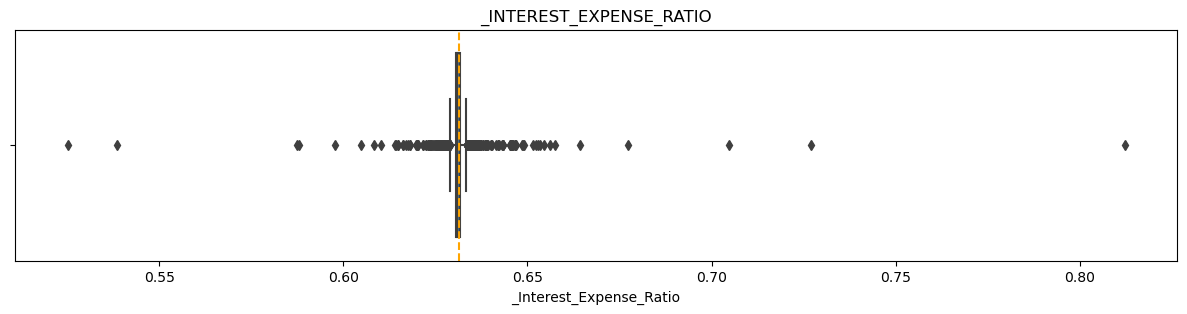

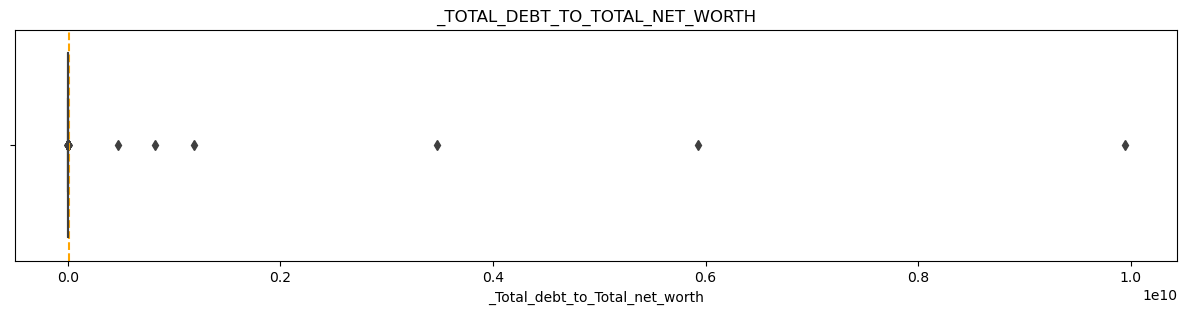

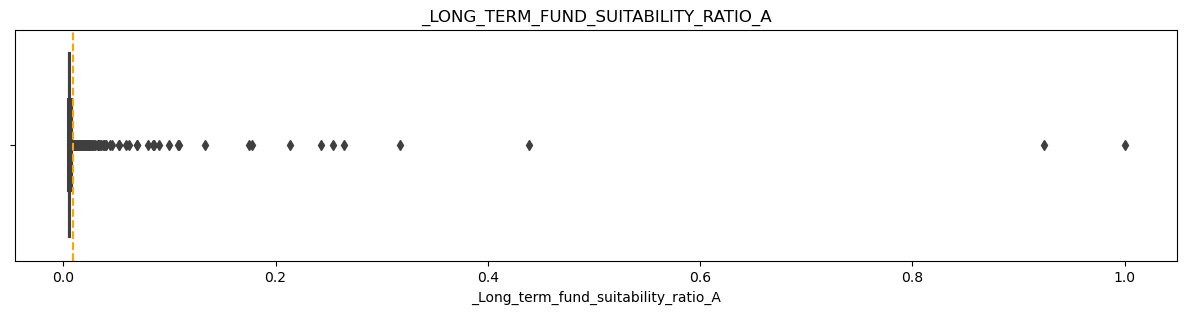

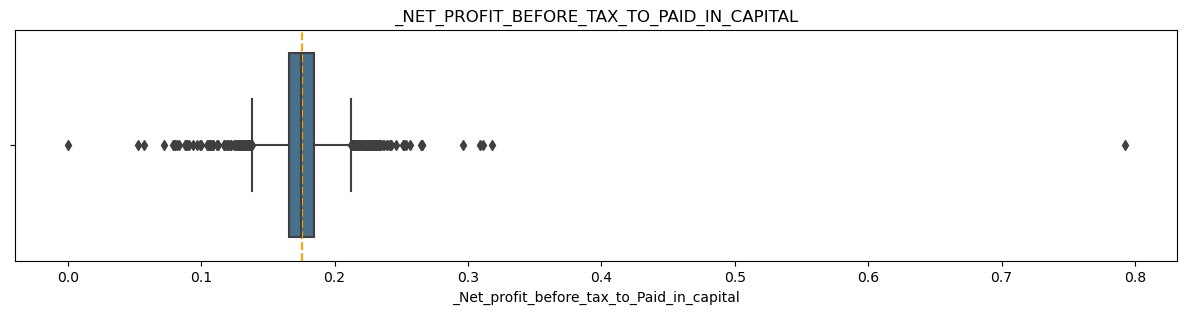

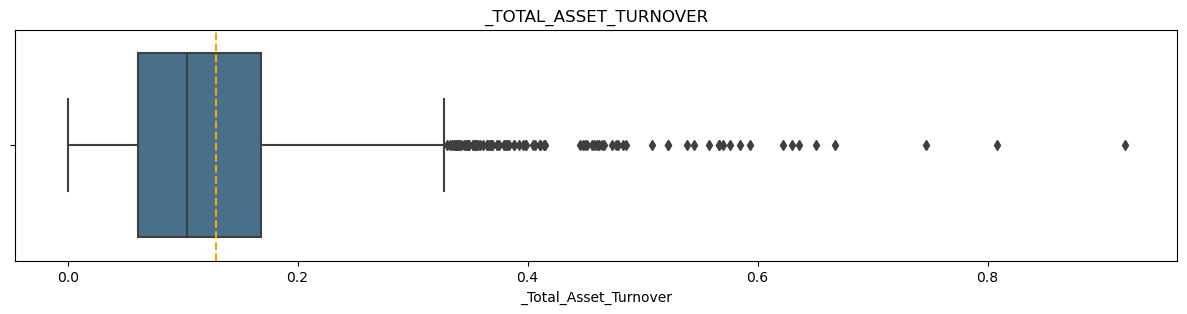

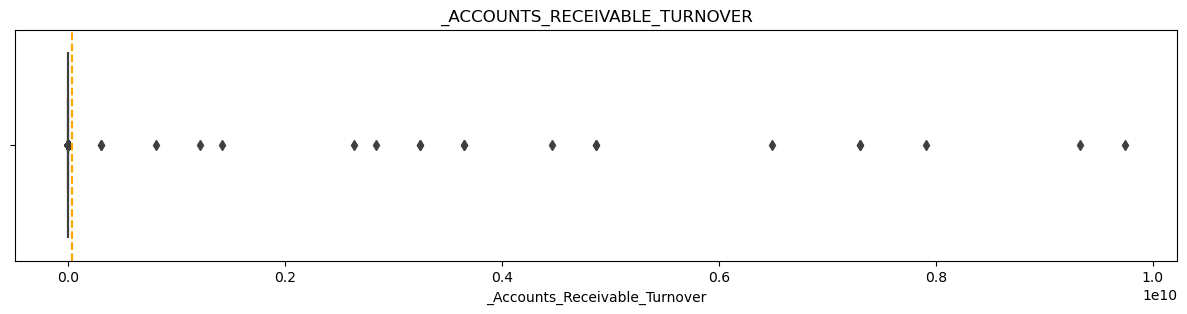

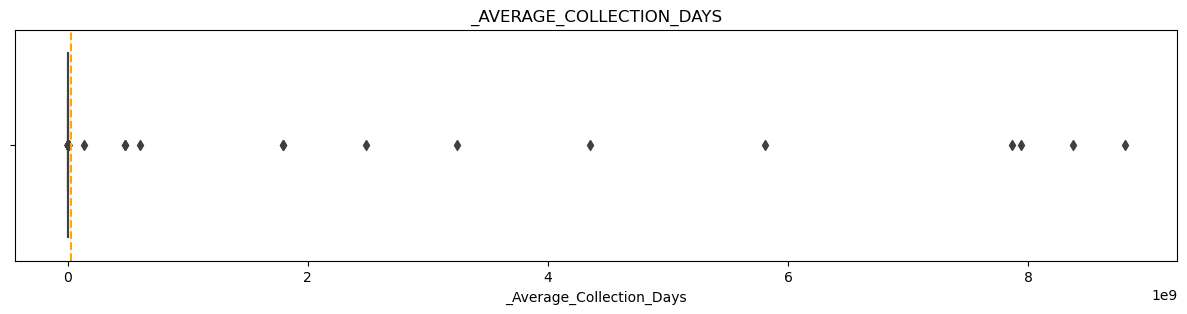

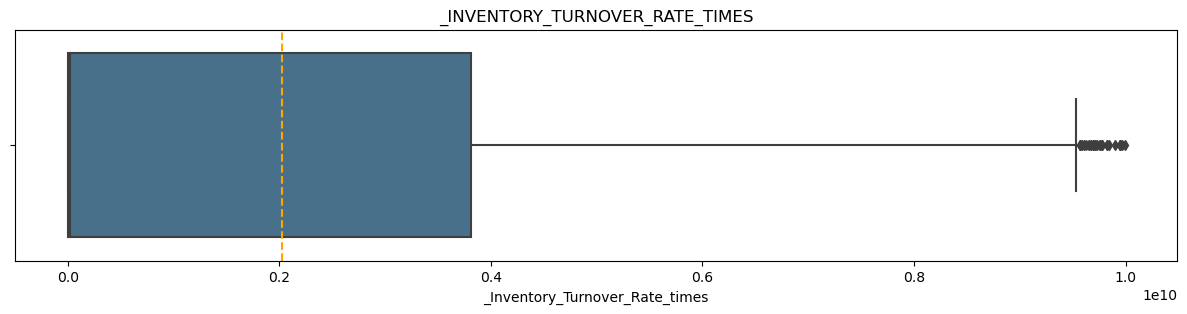

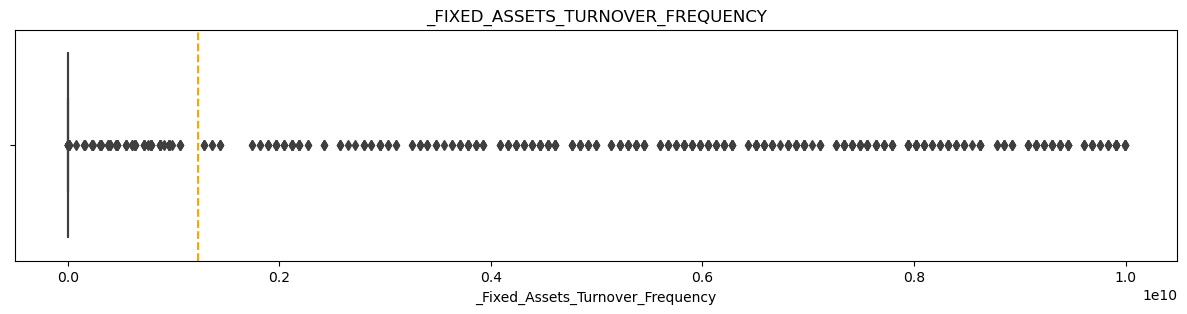

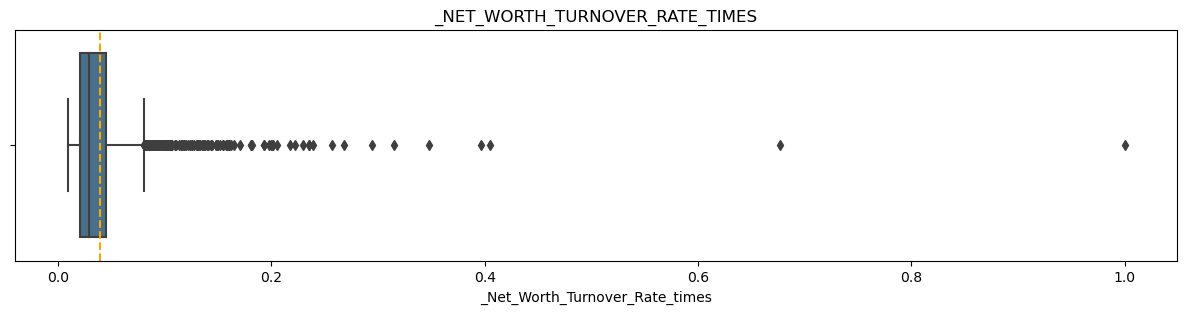

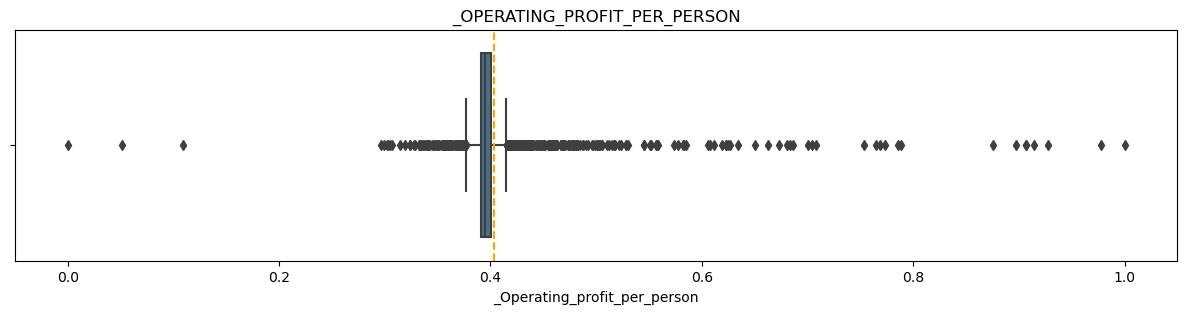

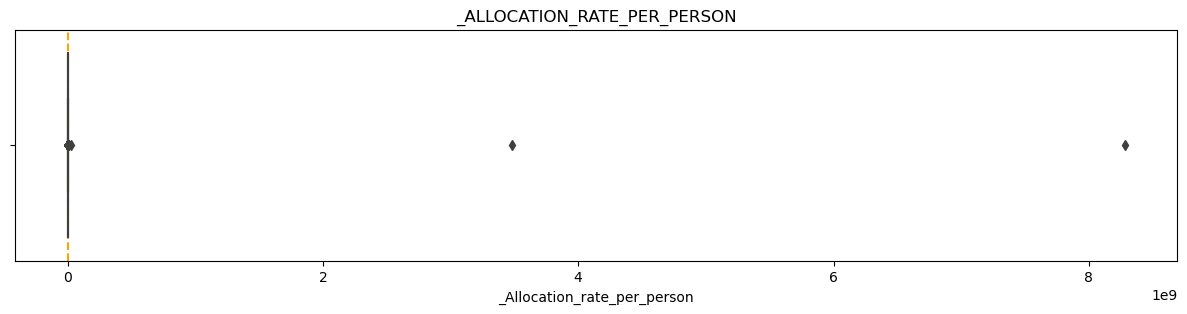

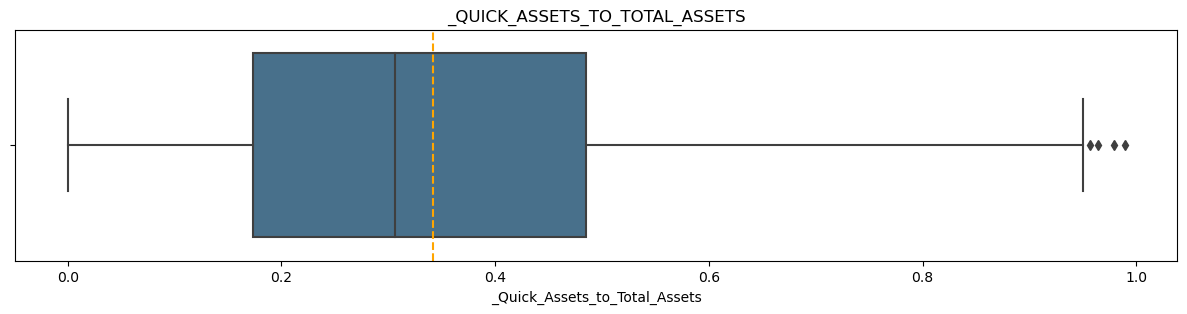

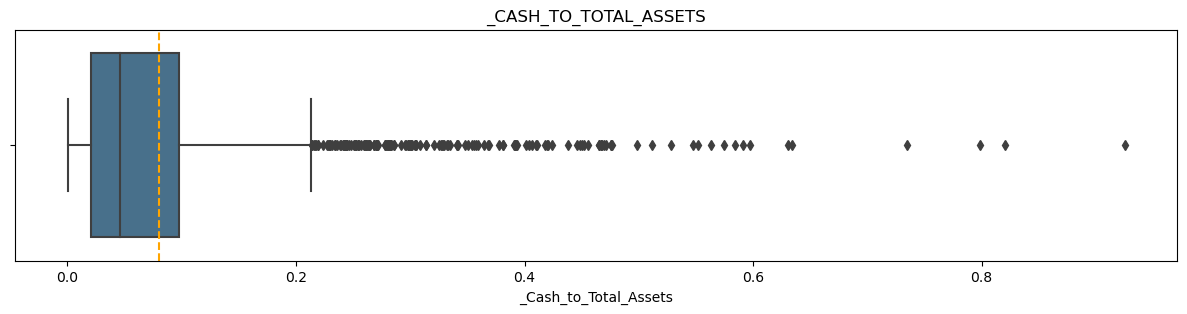

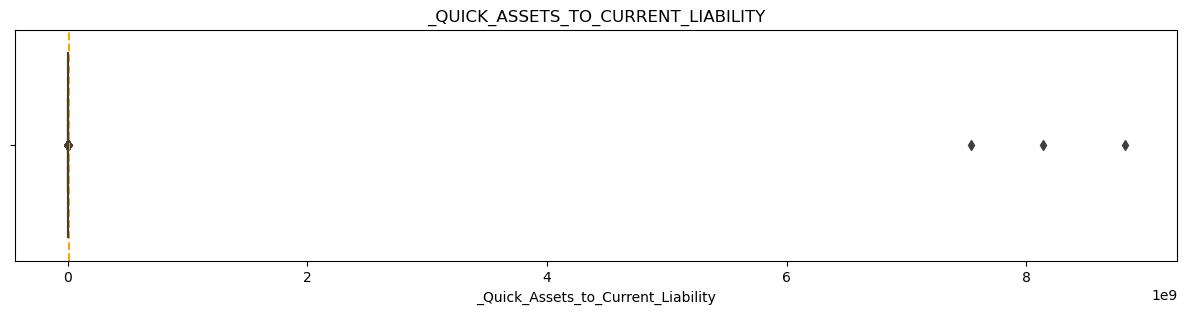

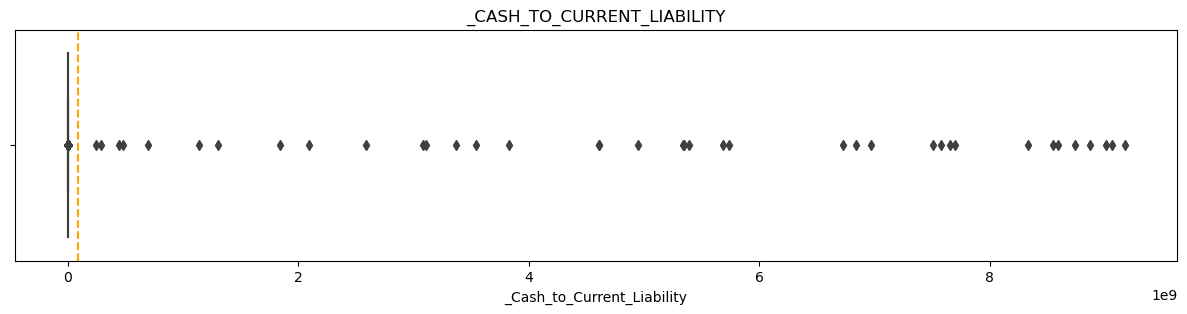

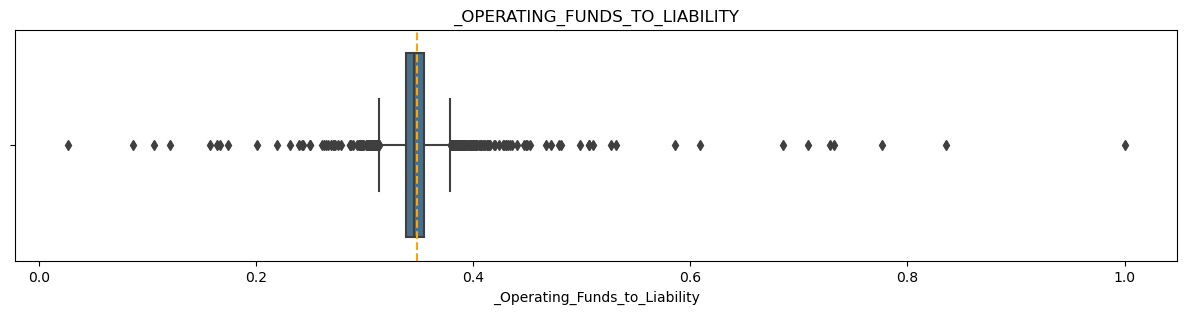

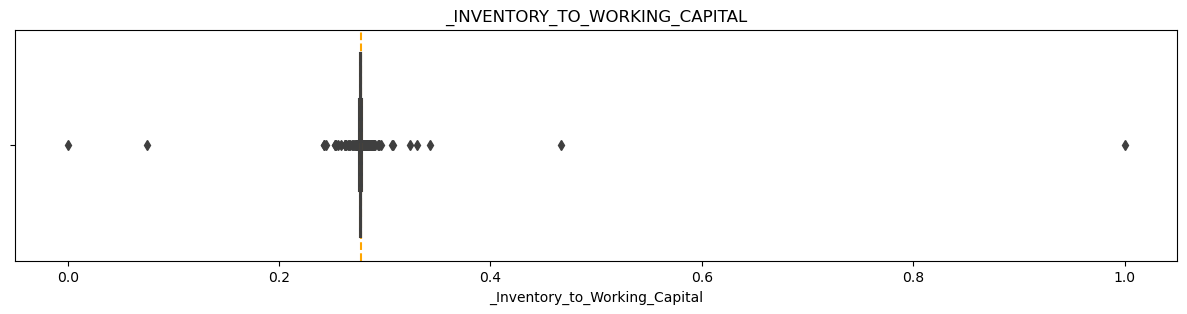

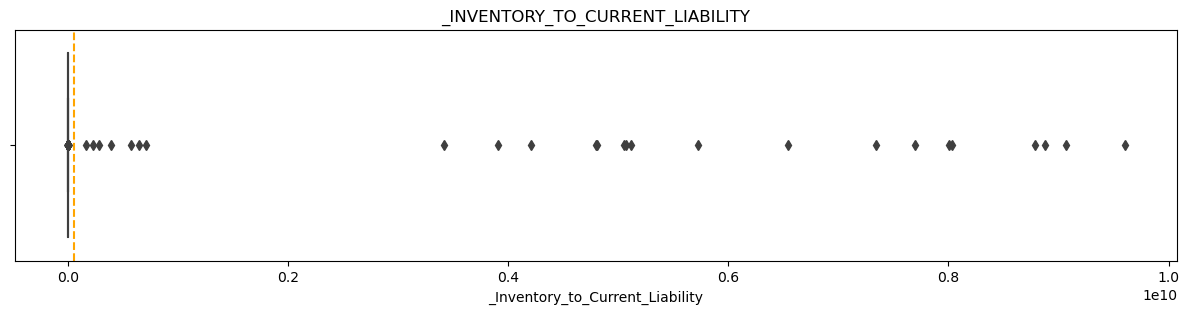

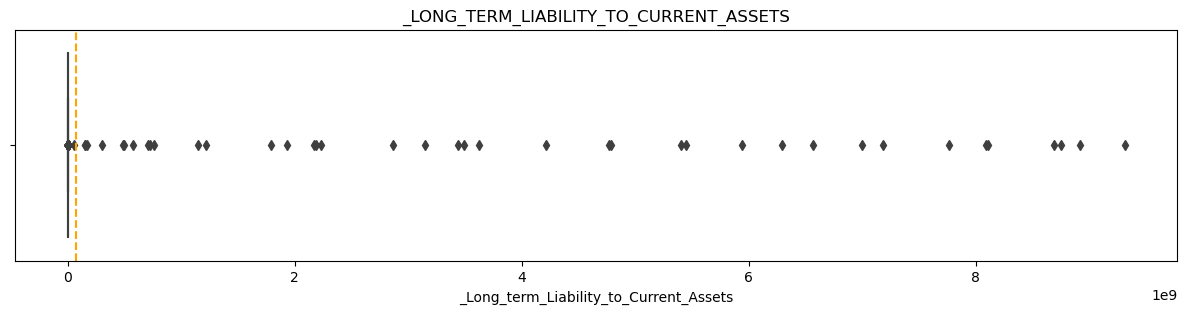

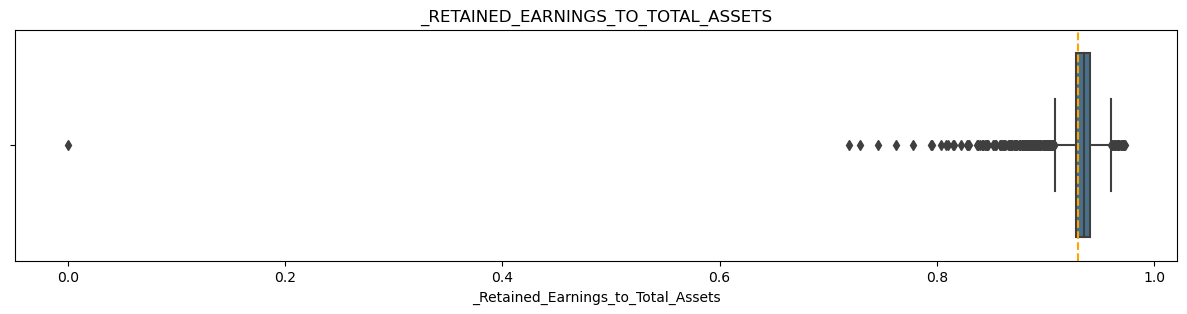

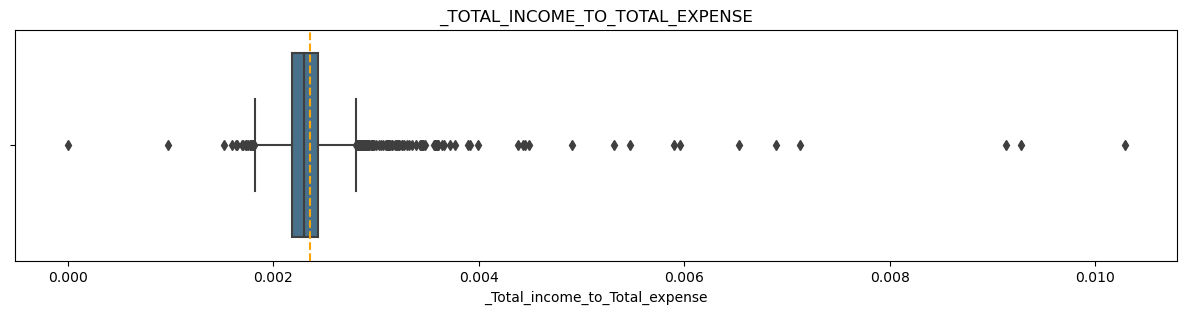

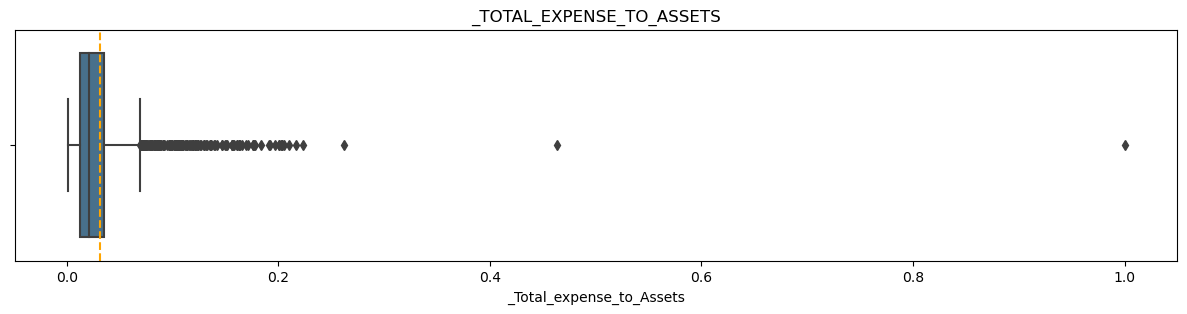

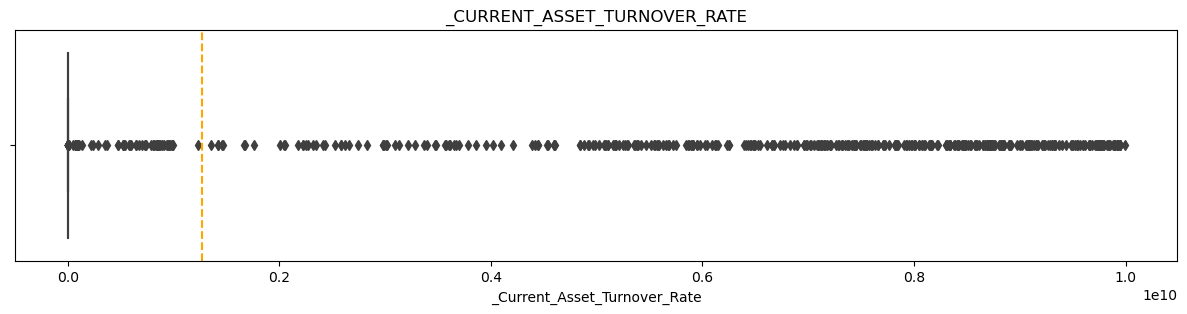

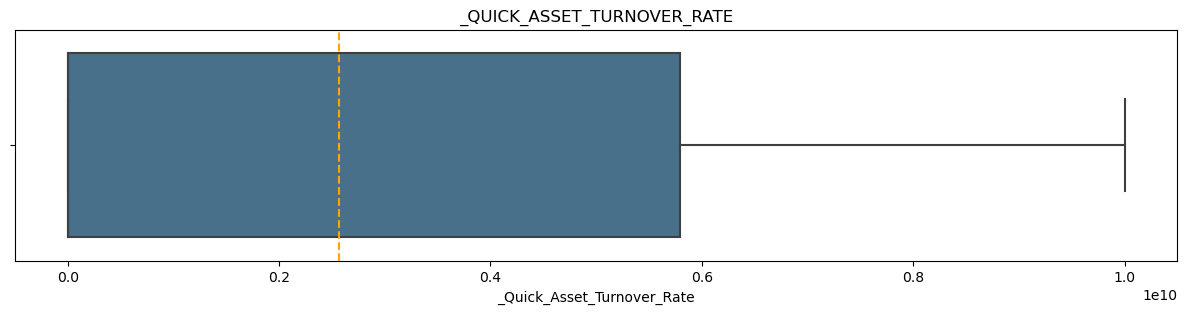

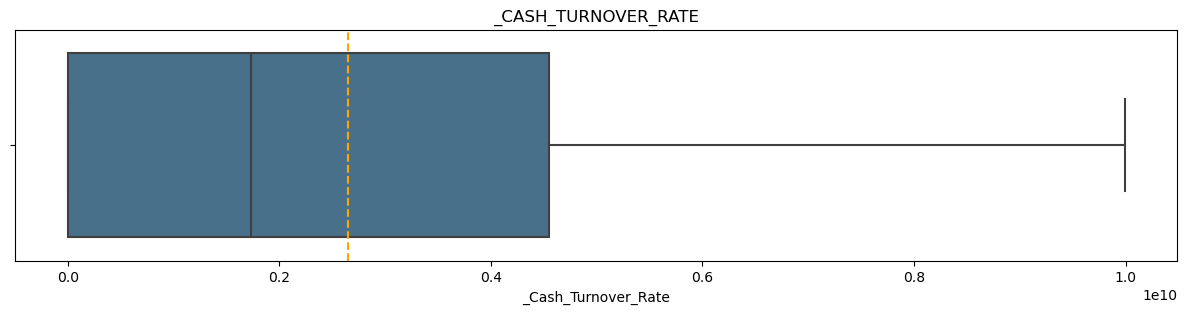

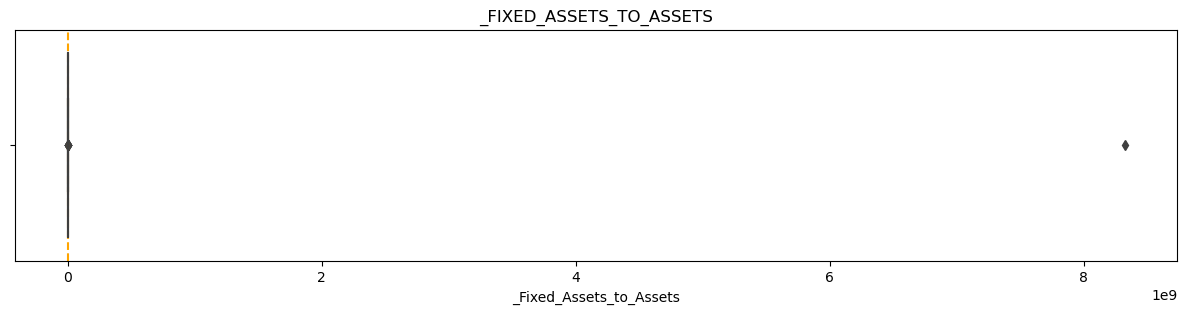

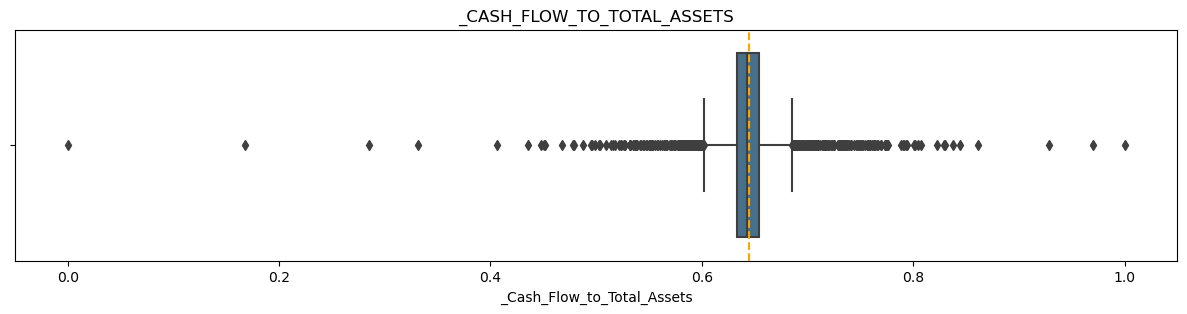

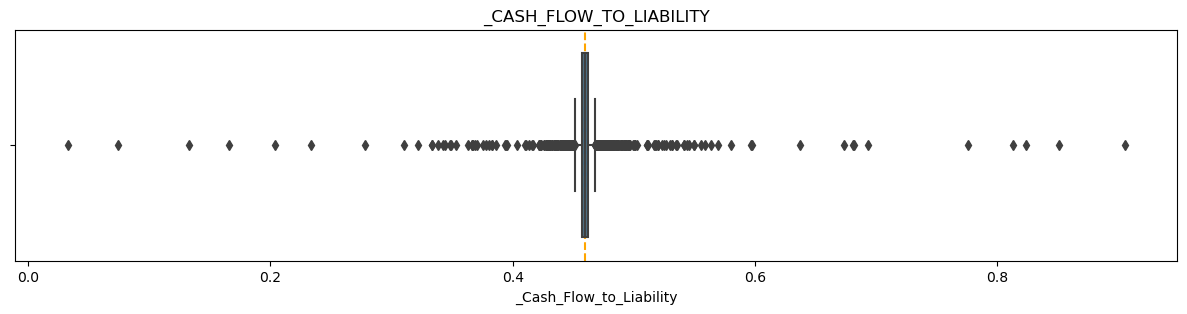

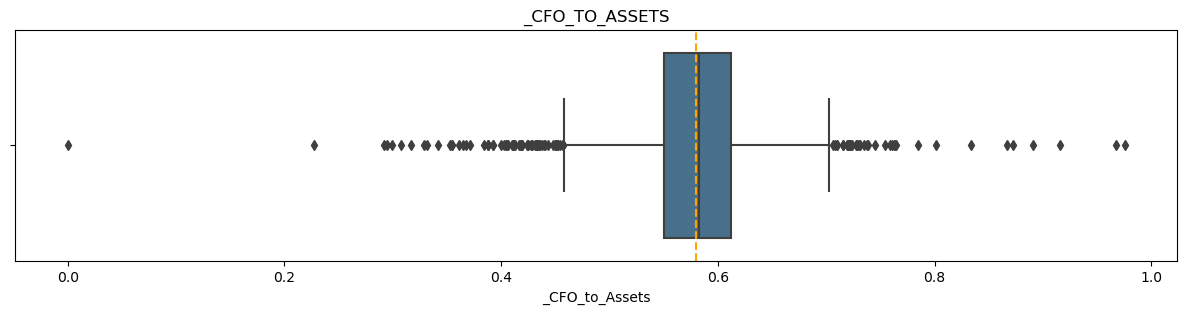

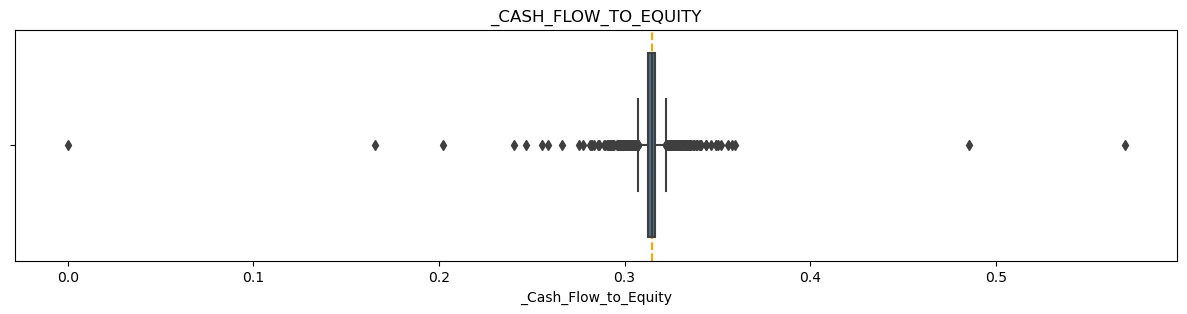

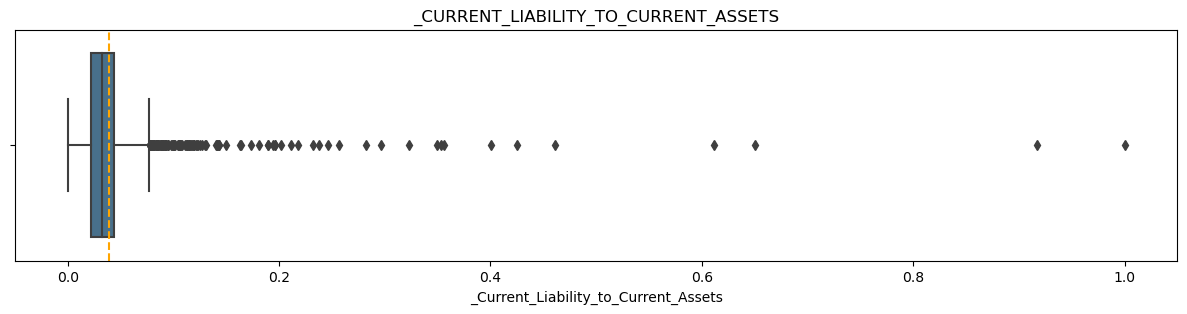

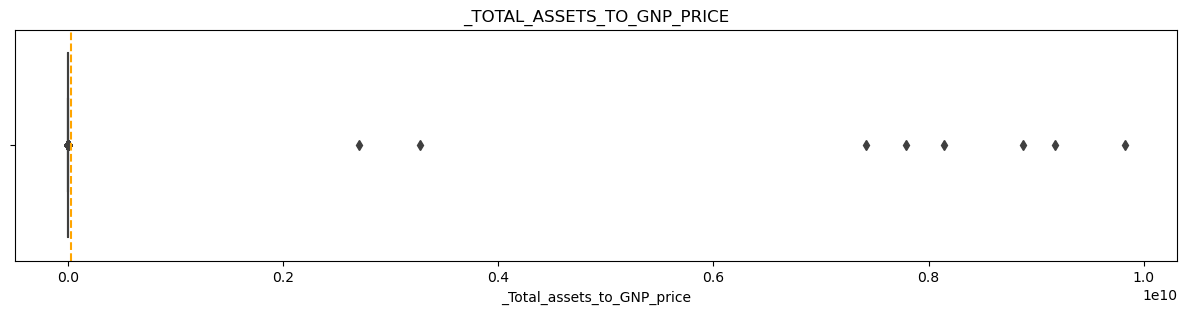

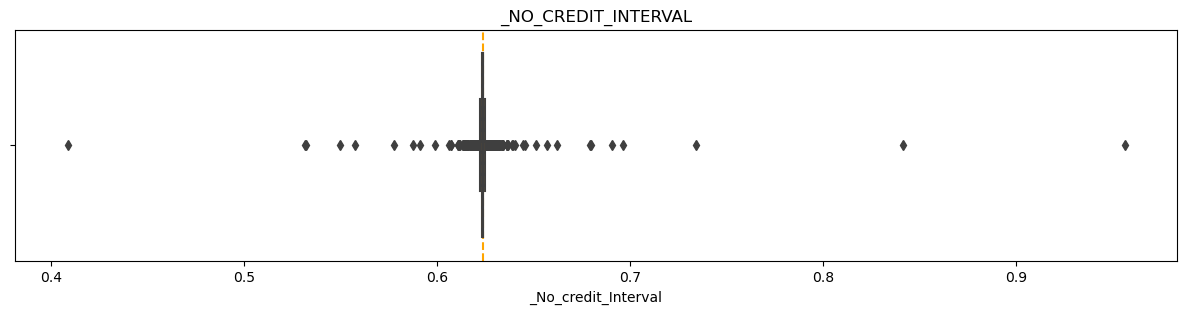

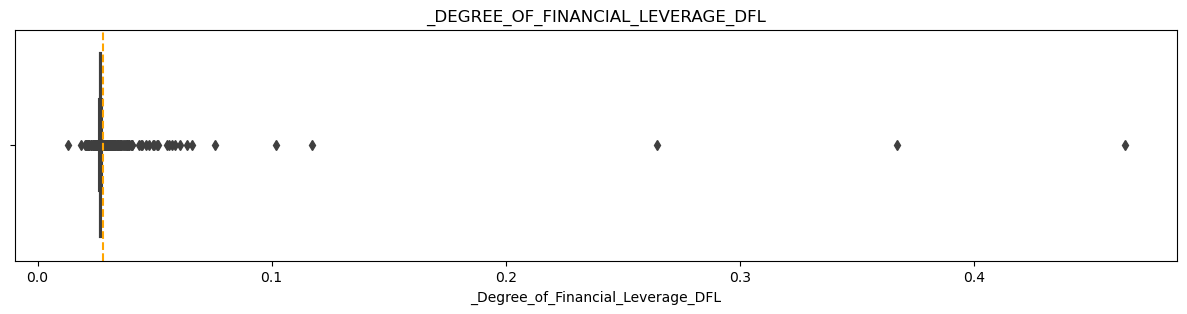

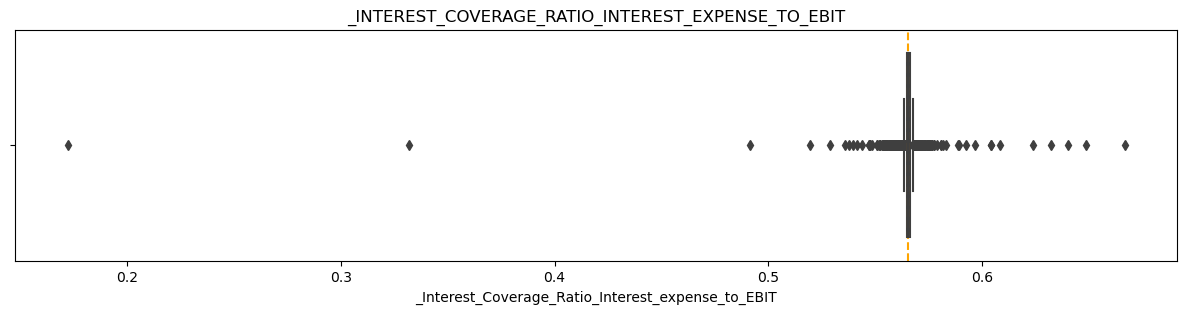

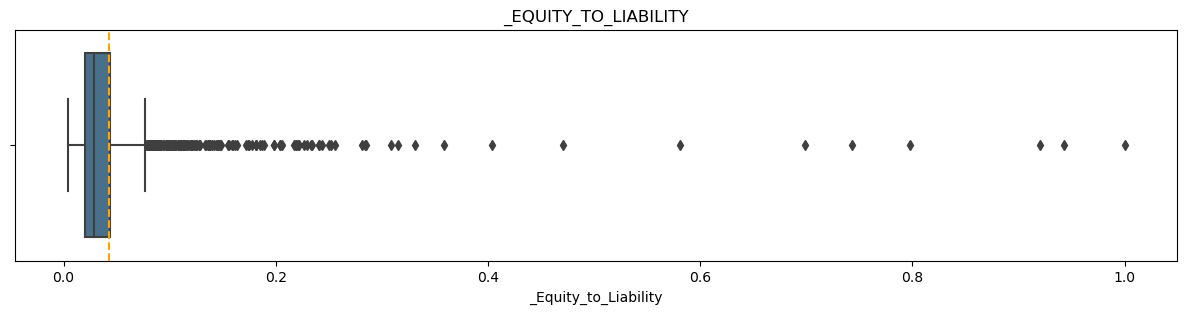

In [19]:
def plot_box(Default,num):
    for i in num:
        fig,axes = plt.subplots(figsize = (15,3))
        sns.boxplot(data = Default,x = i,saturation = 0.45)
        axes.set_title(i.upper())
        axes.axvline(x = Default[i].mean(),color = 'orange',linestyle = '--')
plot_box(Default,num)

In [20]:
imp_var = ['_Research_and_development_expense_rate',
       '_Interest_bearing_debt_interest_rate',
       '_Total_debt_to_Total_net_worth', '_Accounts_Receivable_Turnover',
       '_Allocation_rate_per_person', '_Inventory_to_Working_Capital',
       '_Total_income_to_Total_expense', '_Total_expense_to_Assets',
       '_Cash_Turnover_Rate', '_Cash_Flow_to_Liability', '_No_credit_Interval',
       '_Equity_to_Liability']

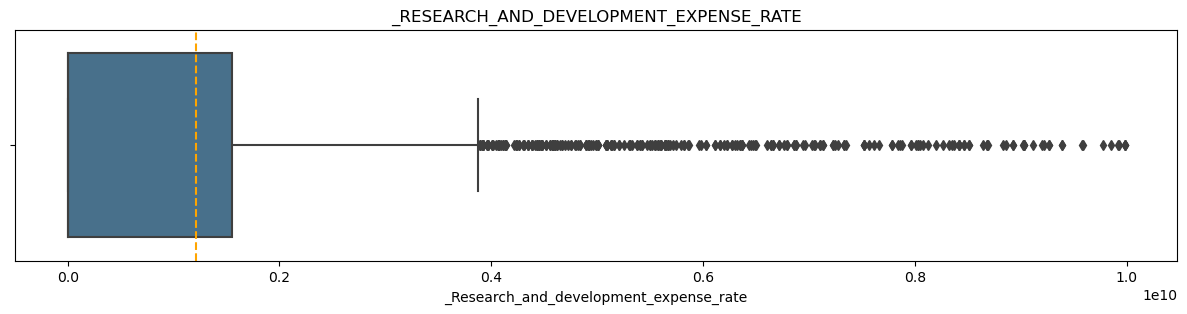

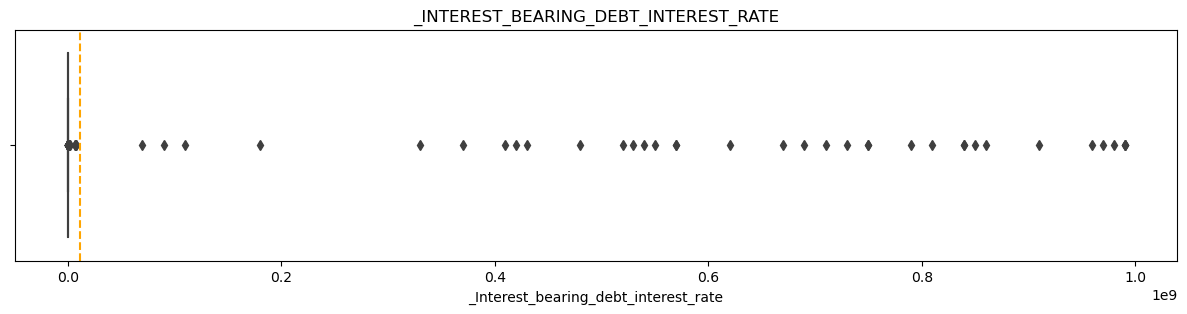

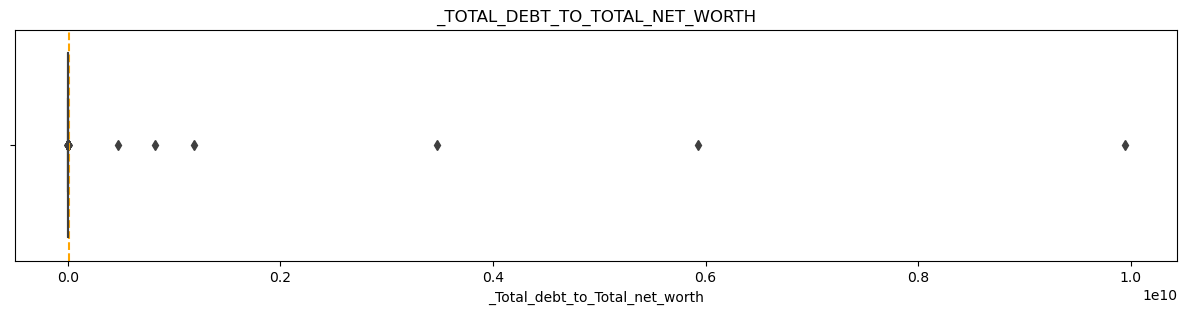

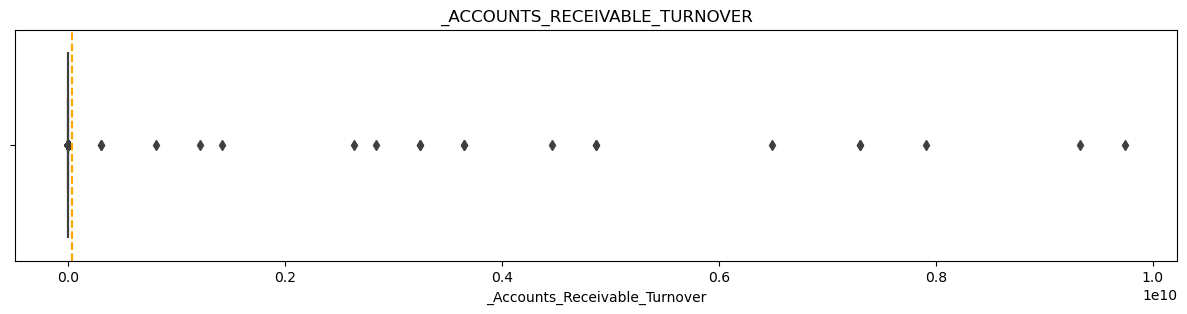

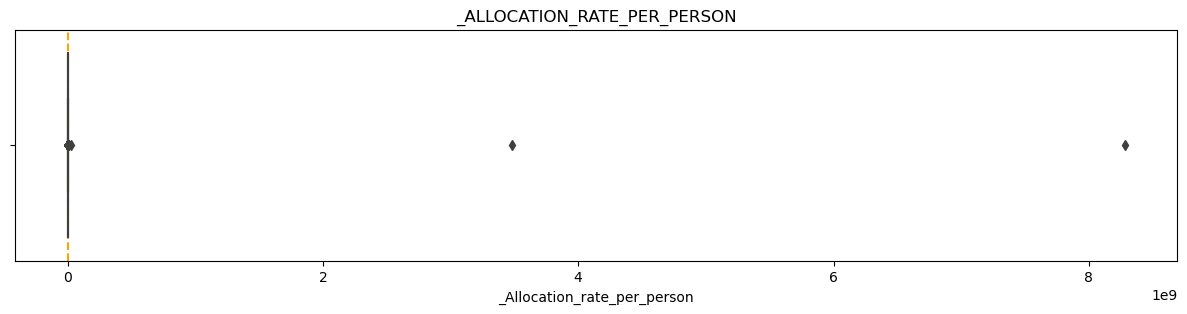

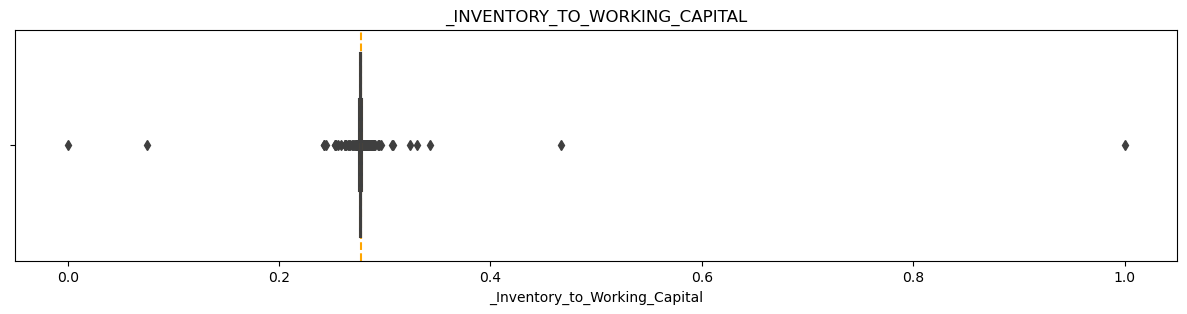

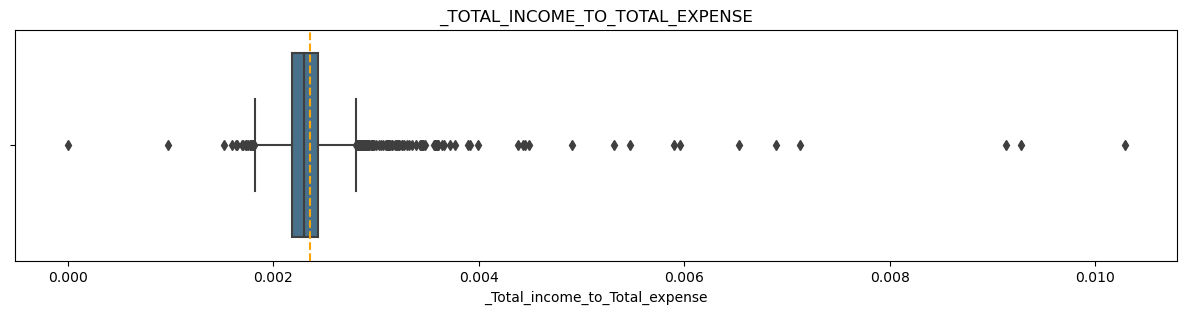

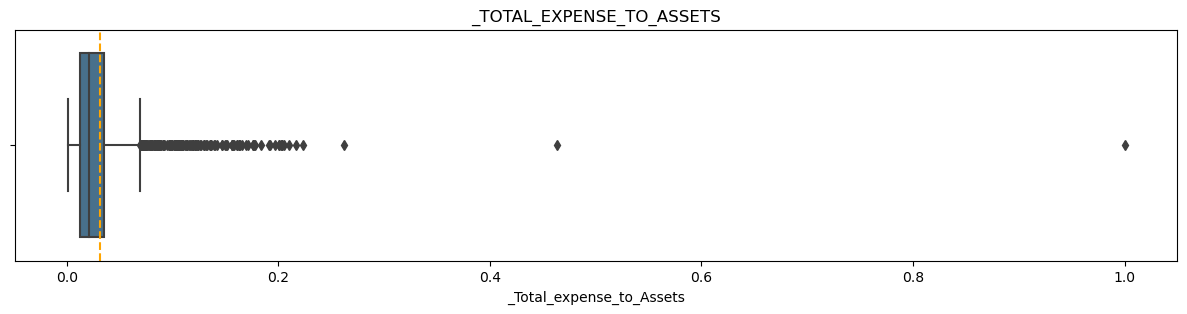

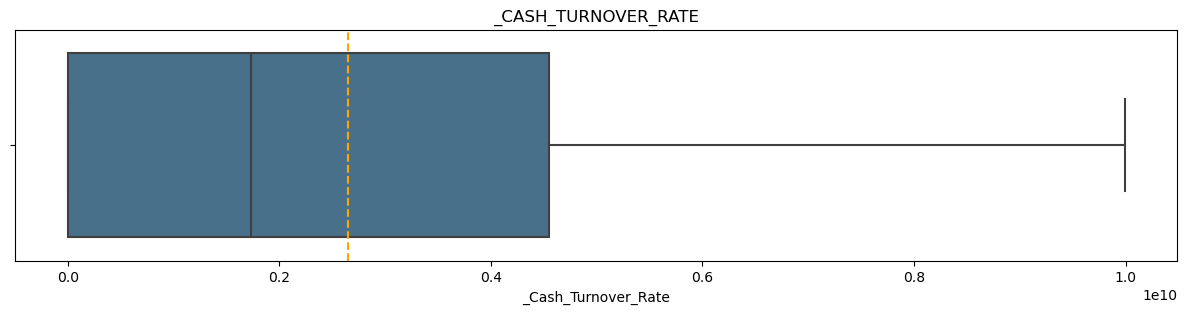

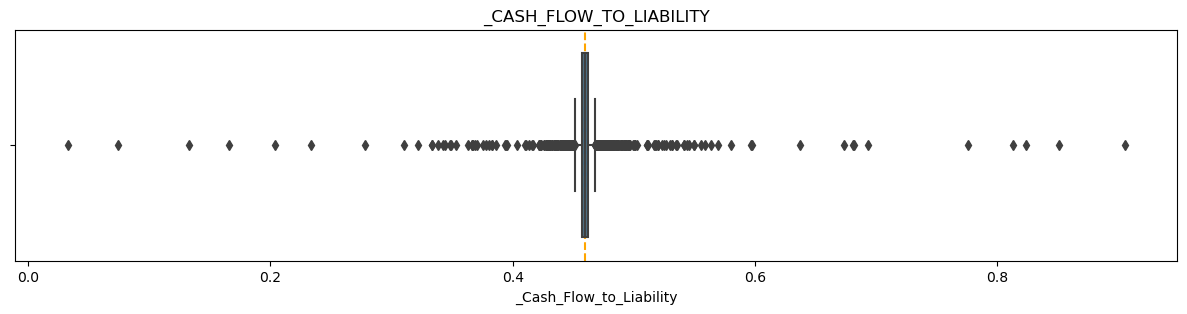

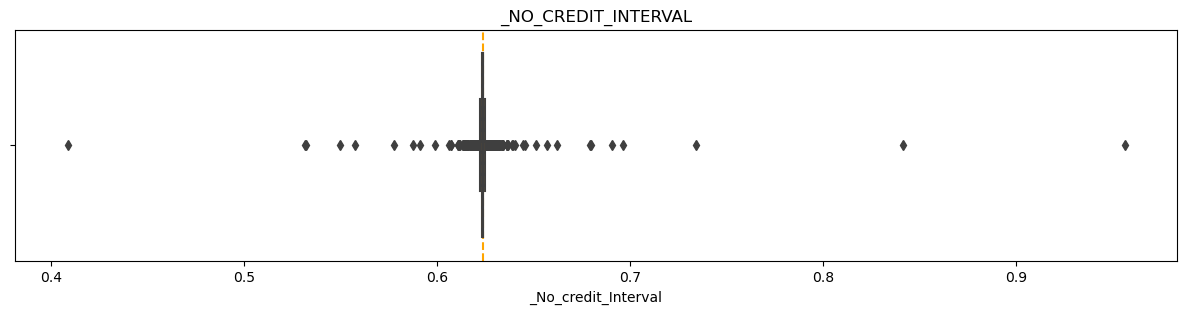

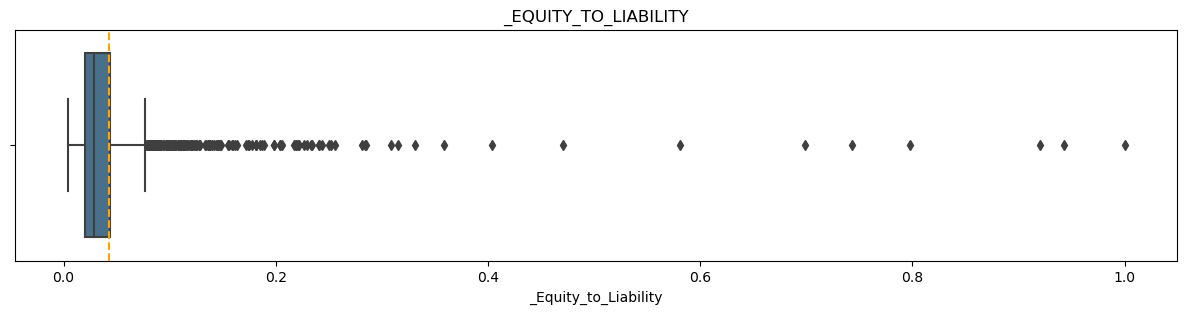

In [21]:
def plot_box_imp(Default,imp_var):
    for i in imp_var:
        fig,axes = plt.subplots(figsize = (15,3))
        sns.boxplot(data = Default,x = i,saturation = 0.45)
        axes.set_title(i.upper())
        axes.axvline(x = Default[i].mean(),color = 'orange',linestyle = '--')
plot_box_imp(Default,imp_var)

#### Box Plot by Default

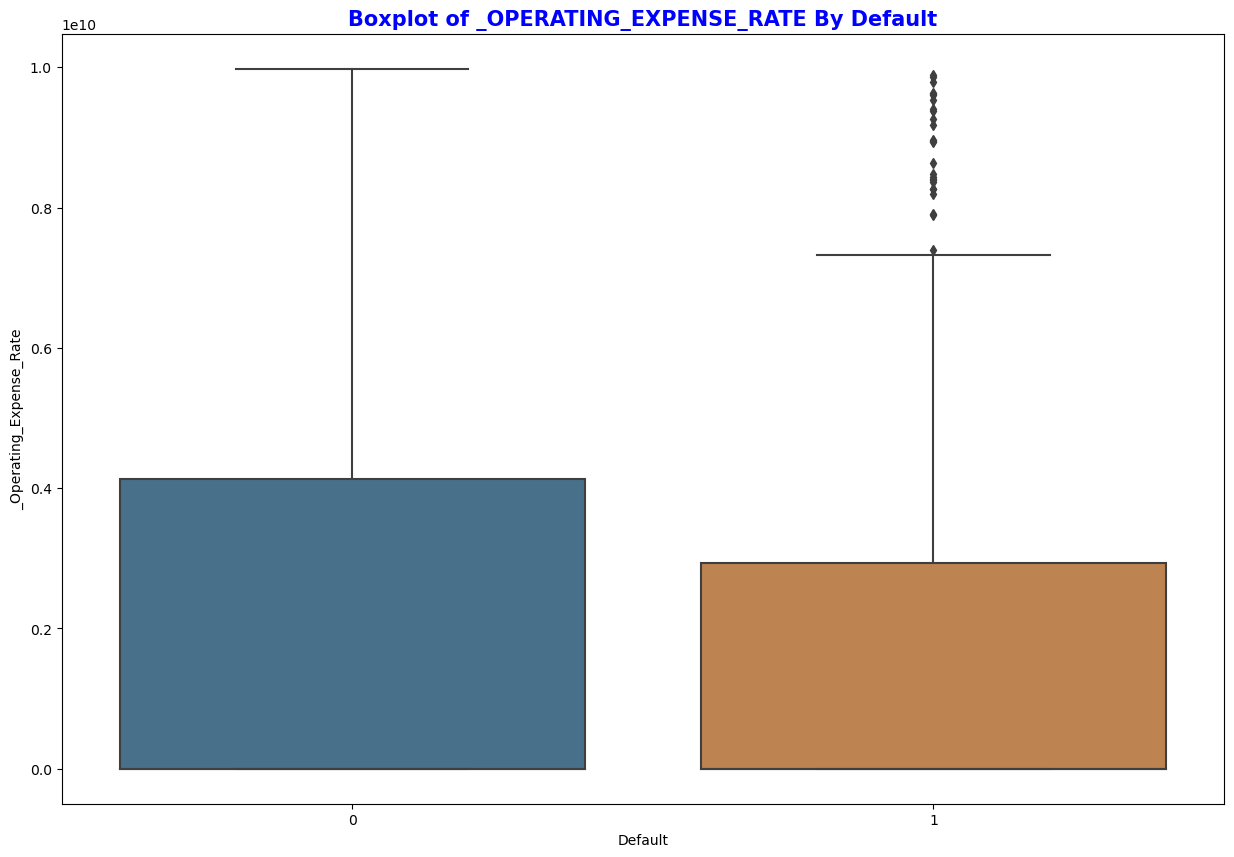

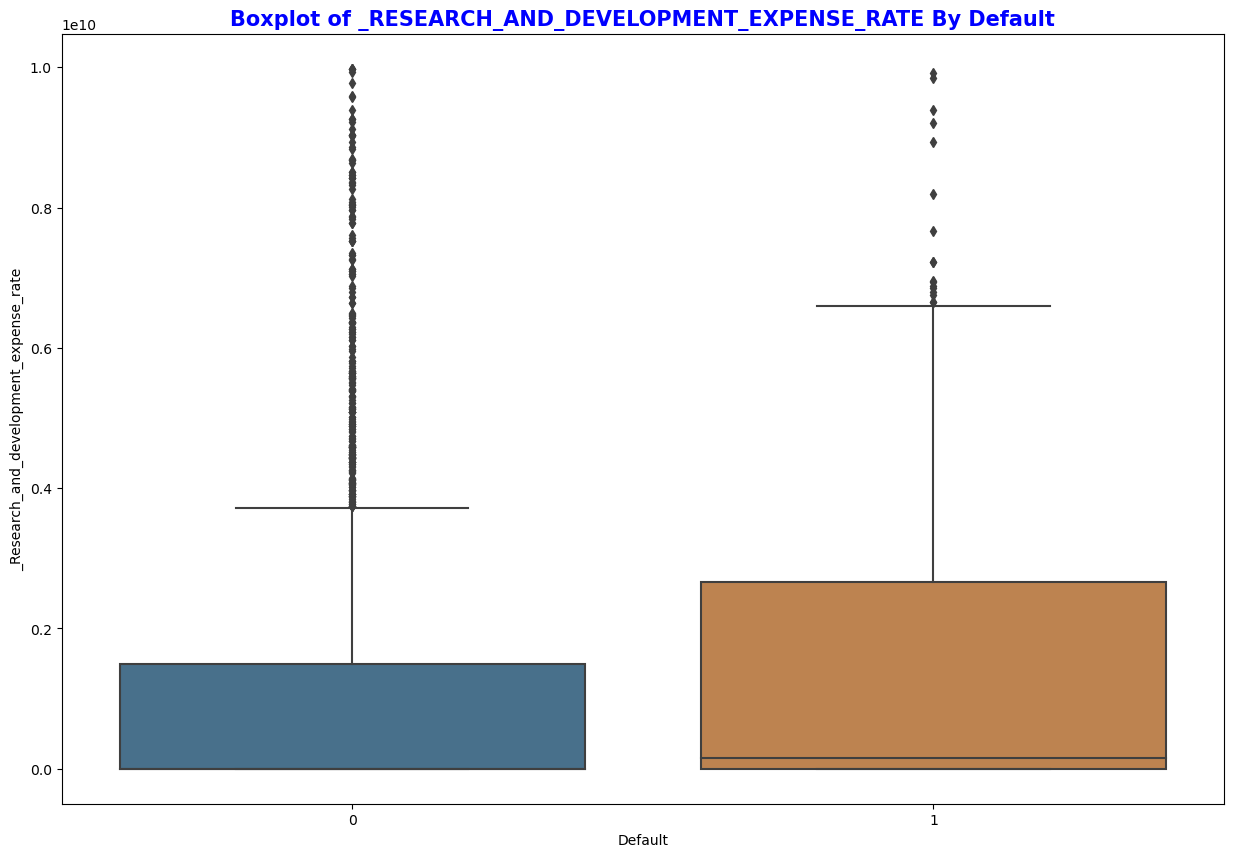

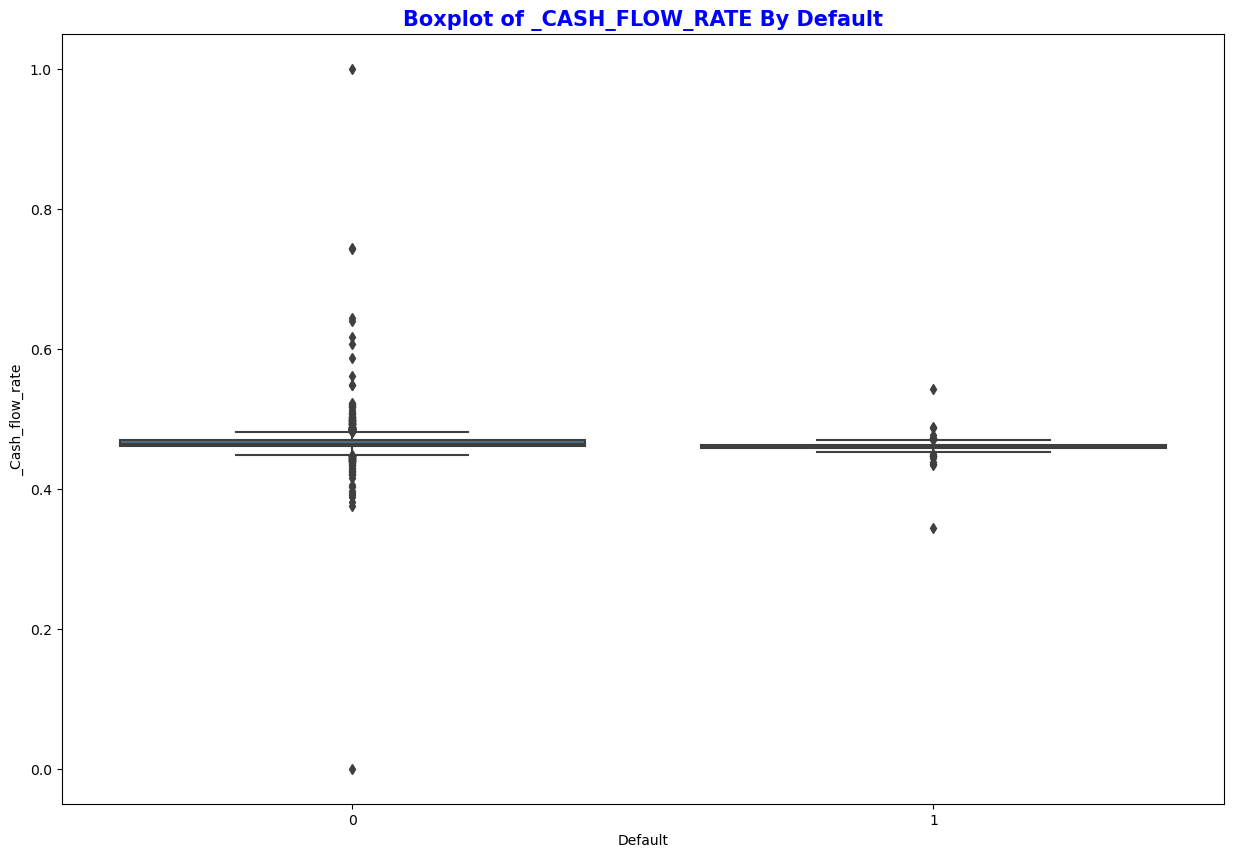

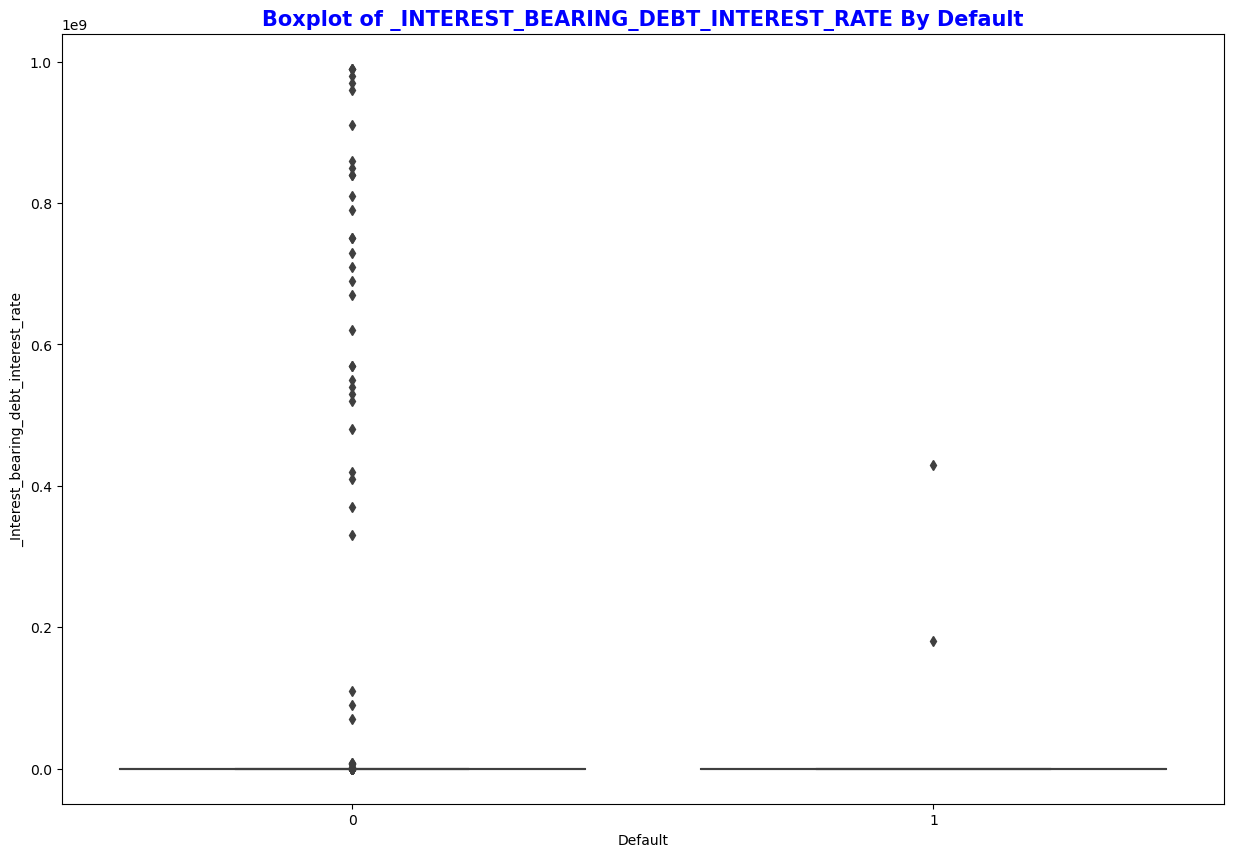

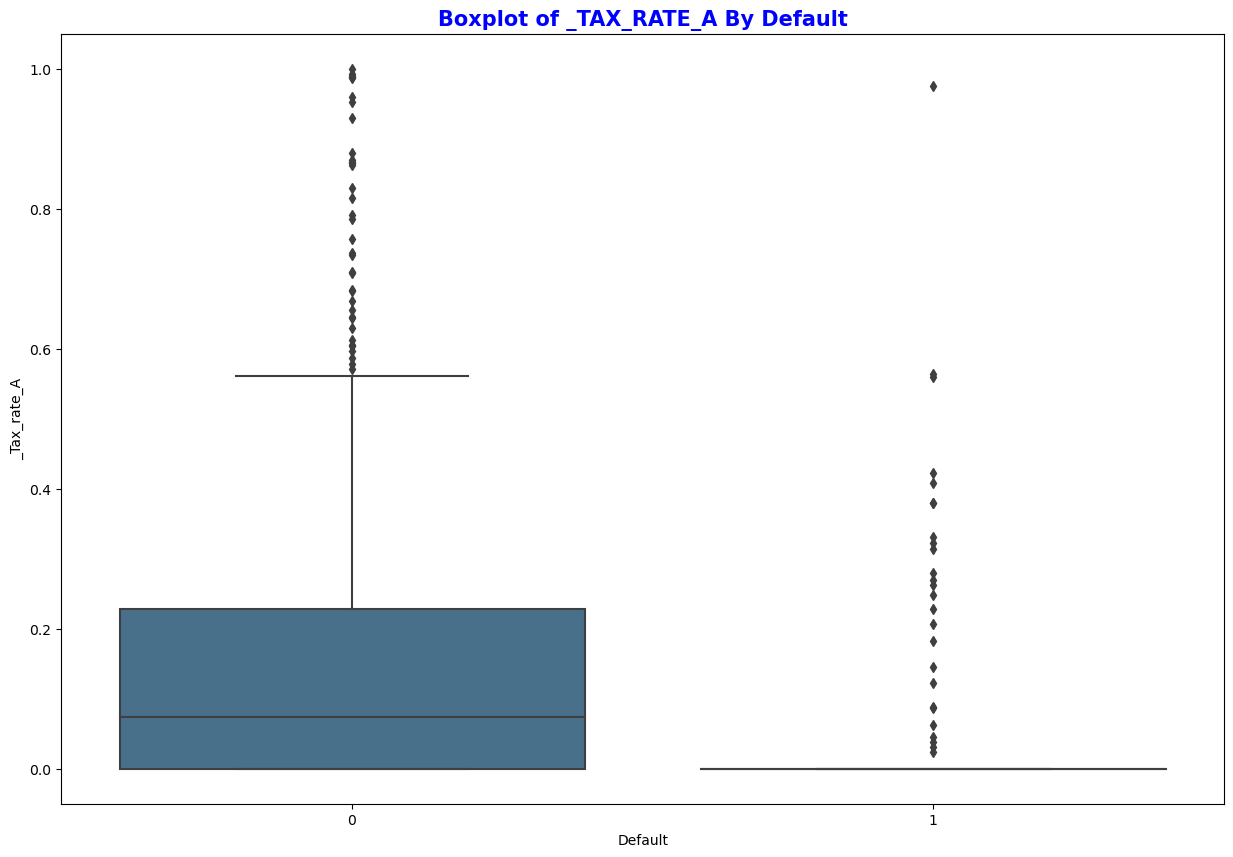

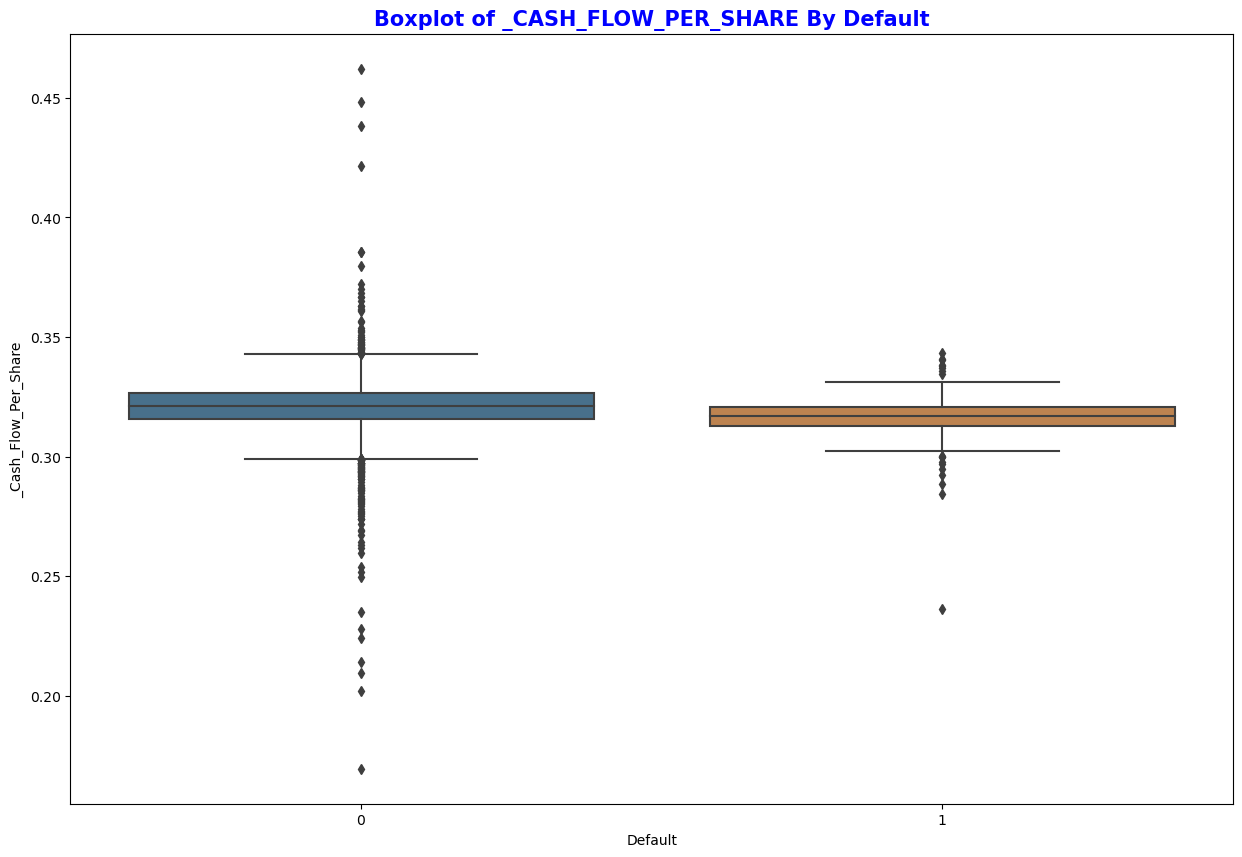

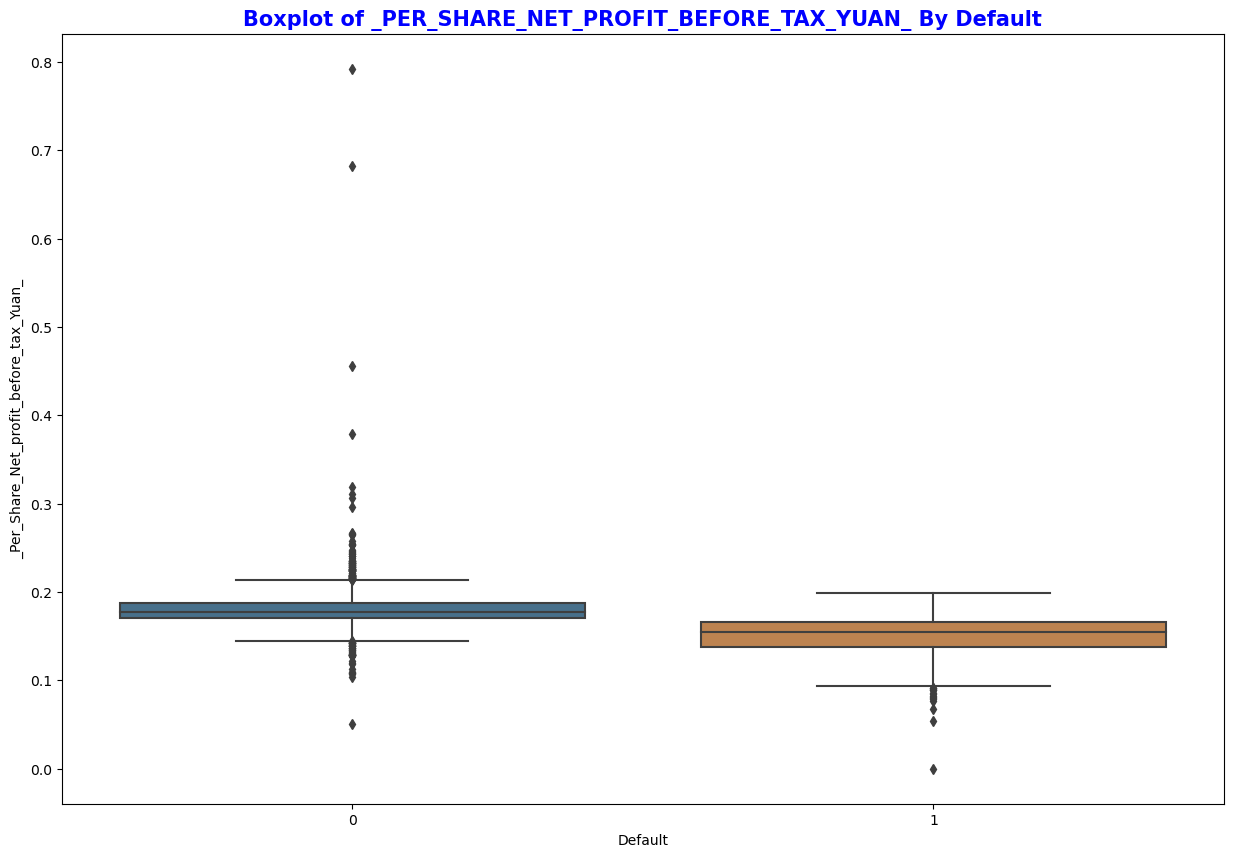

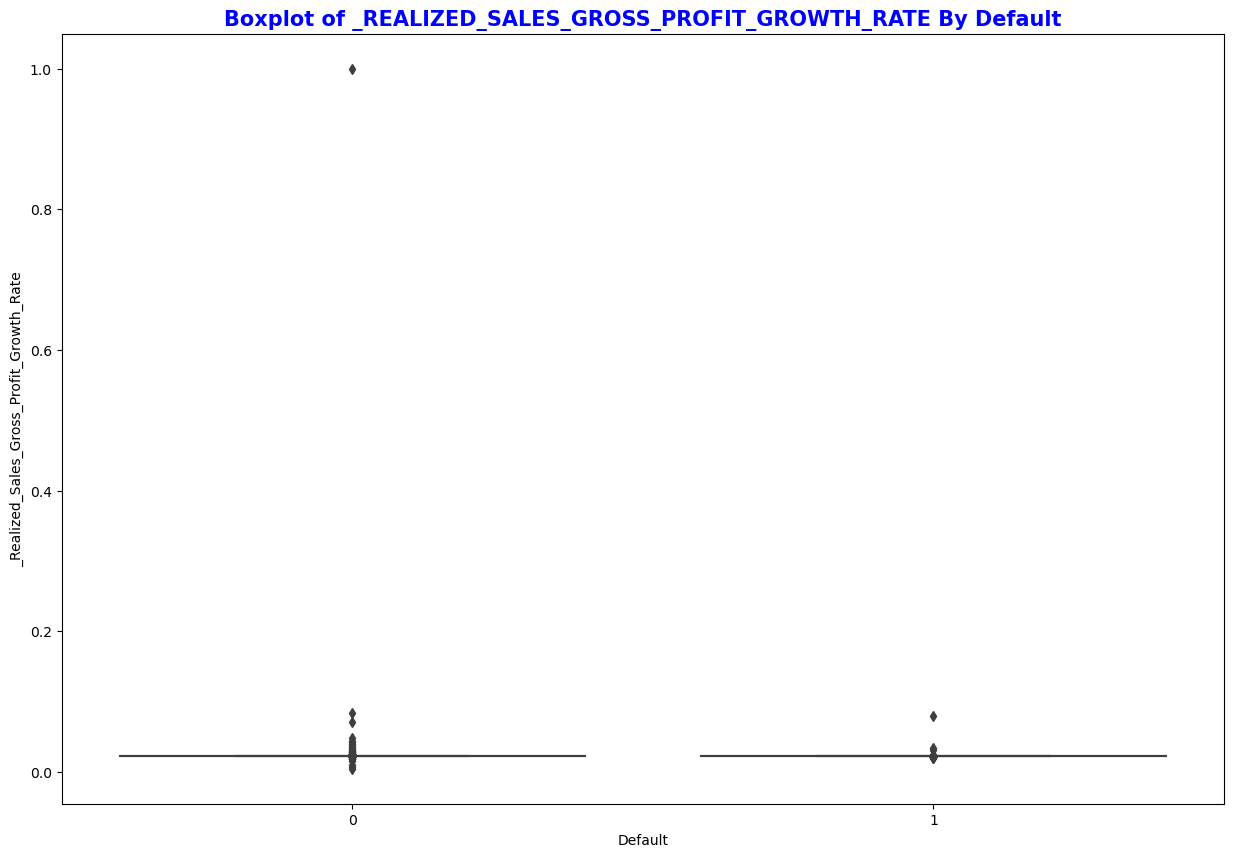

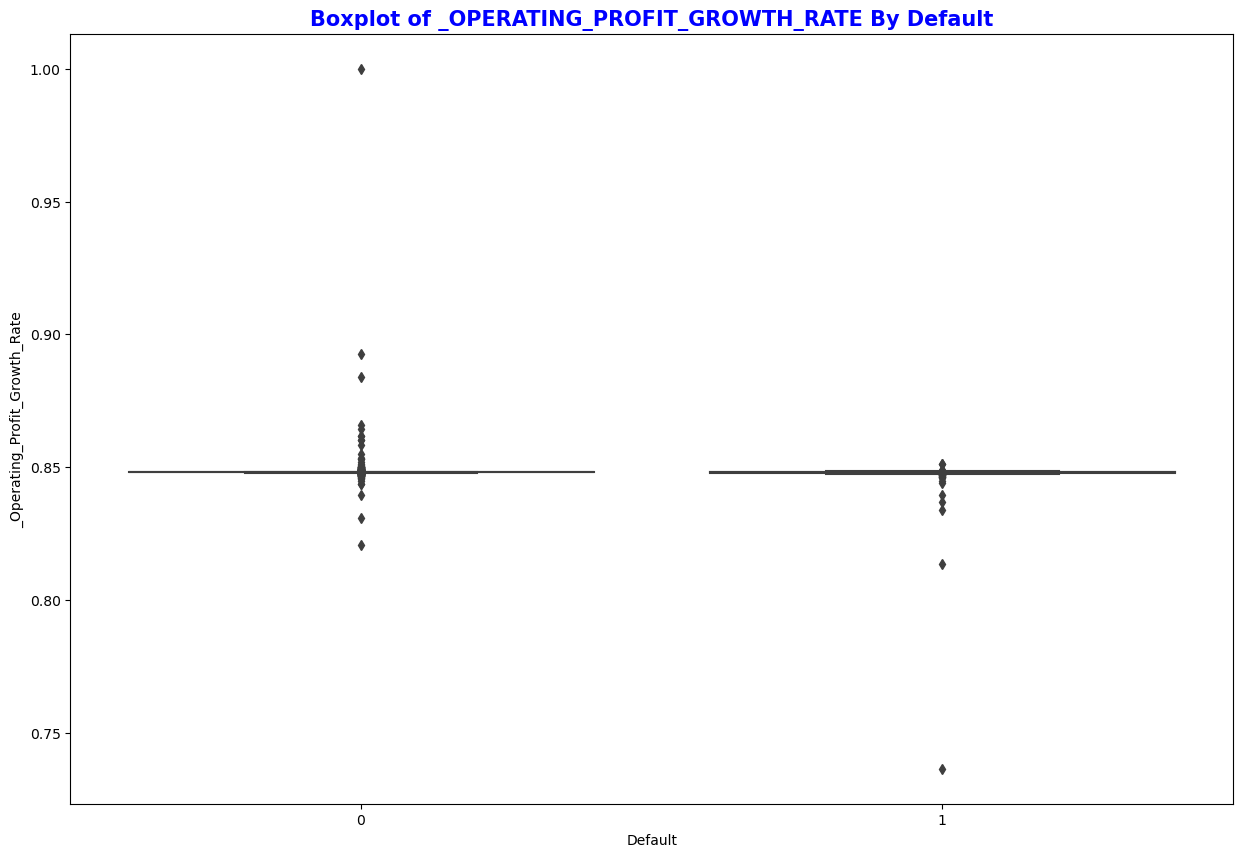

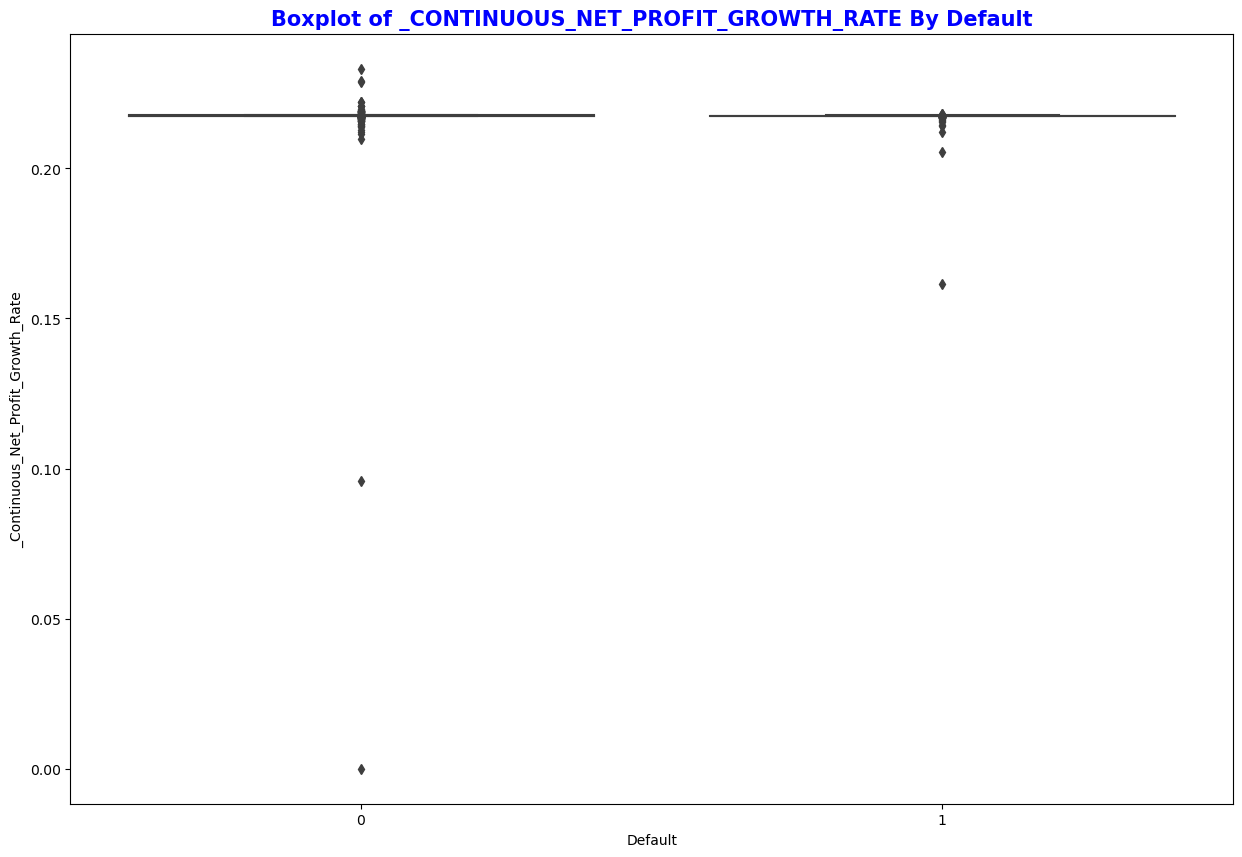

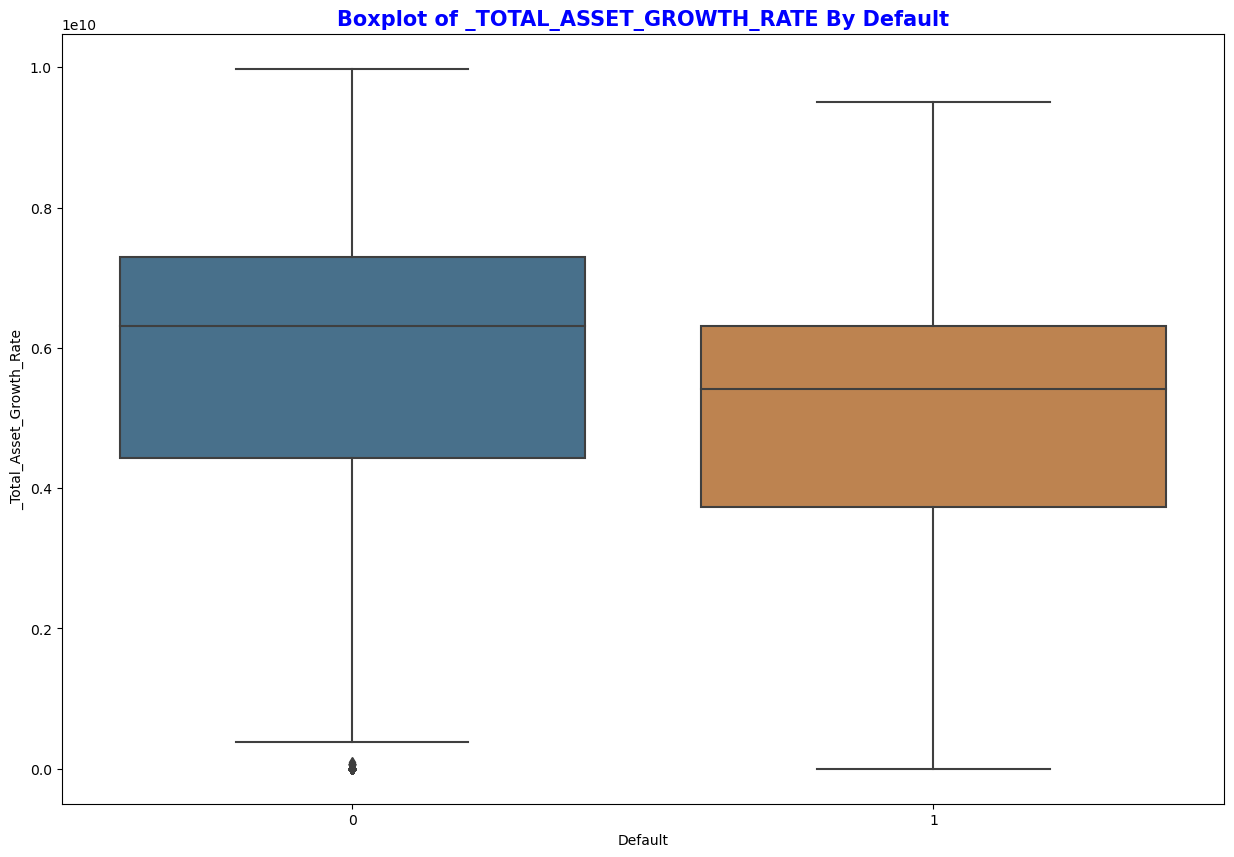

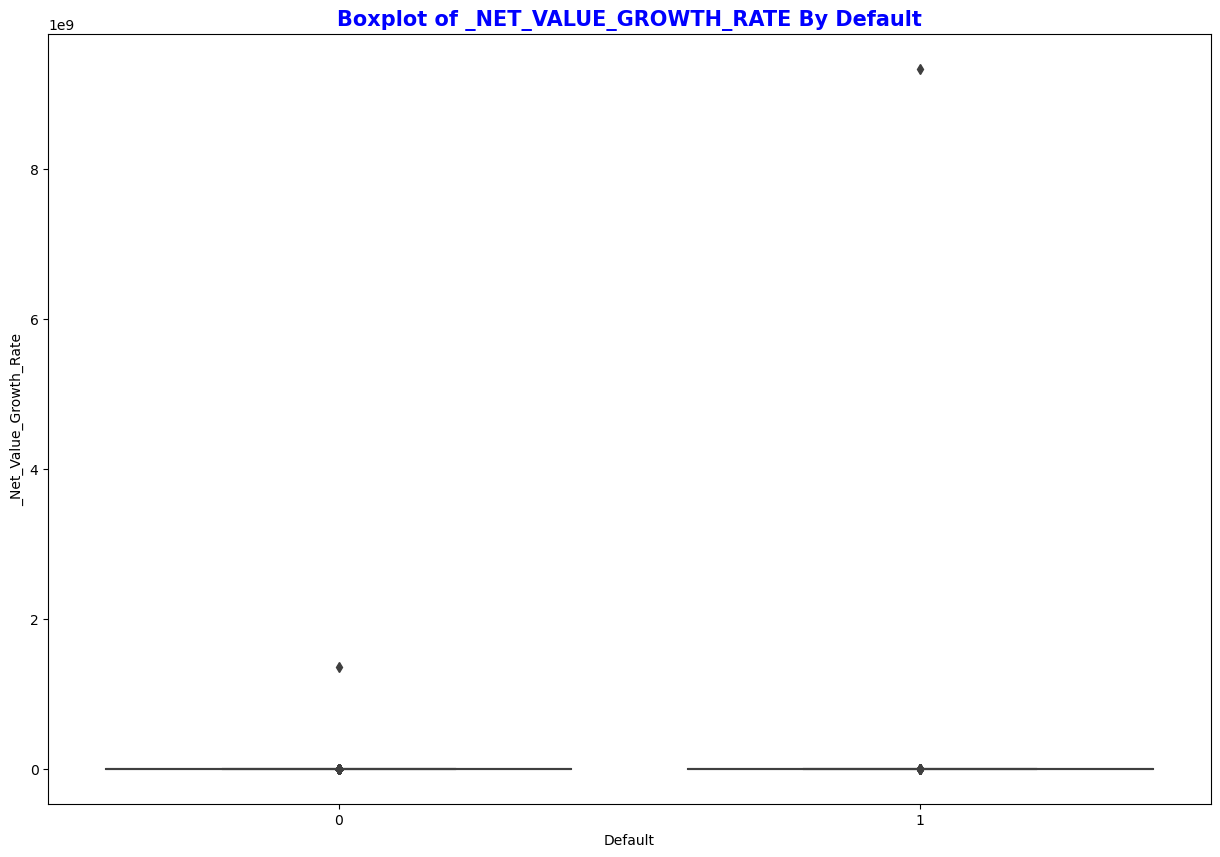

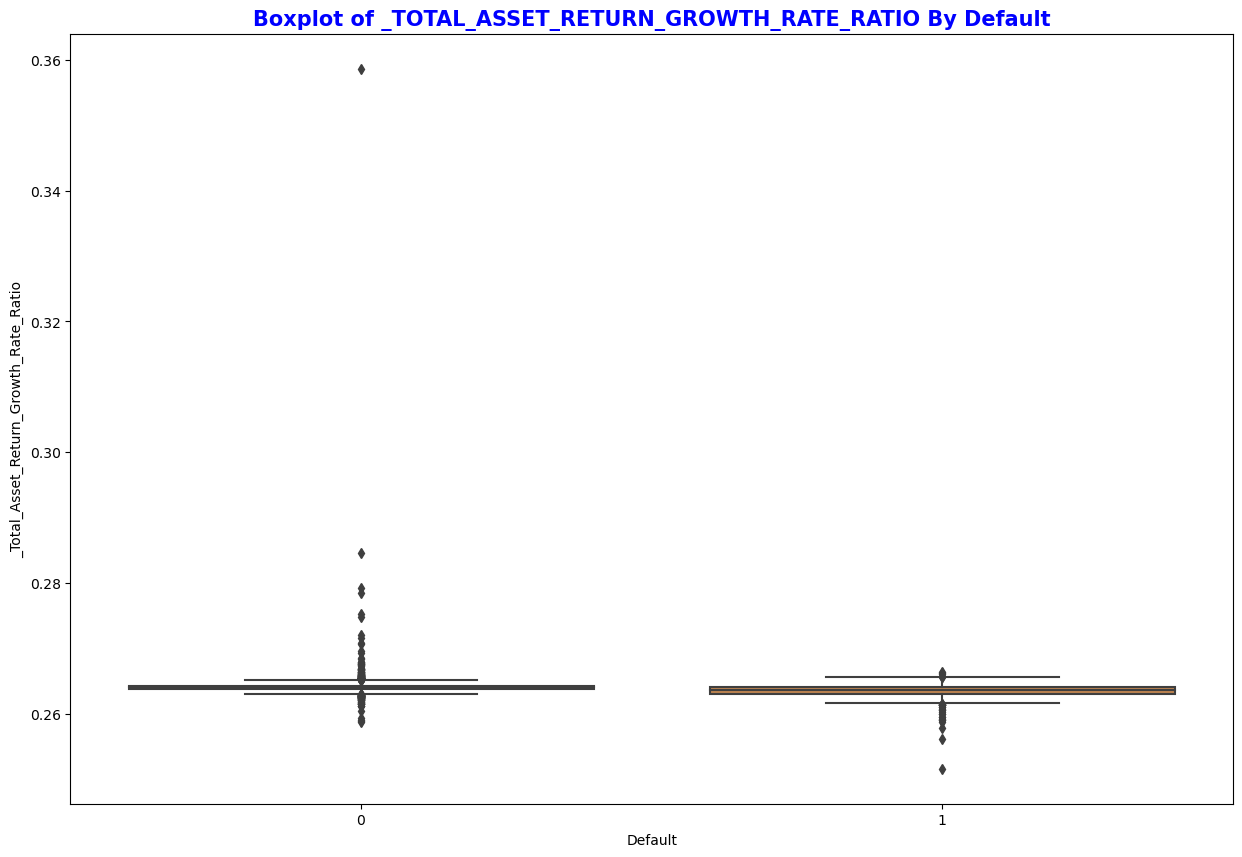

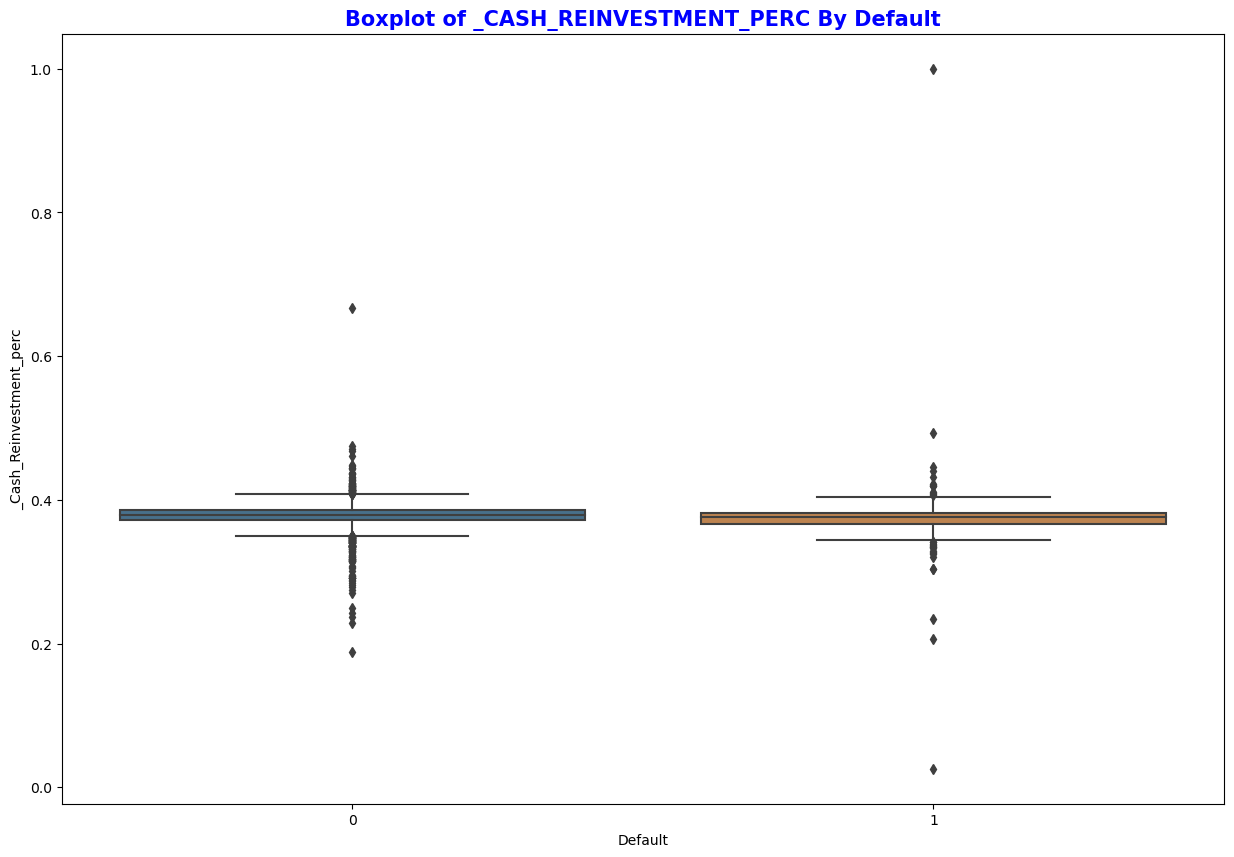

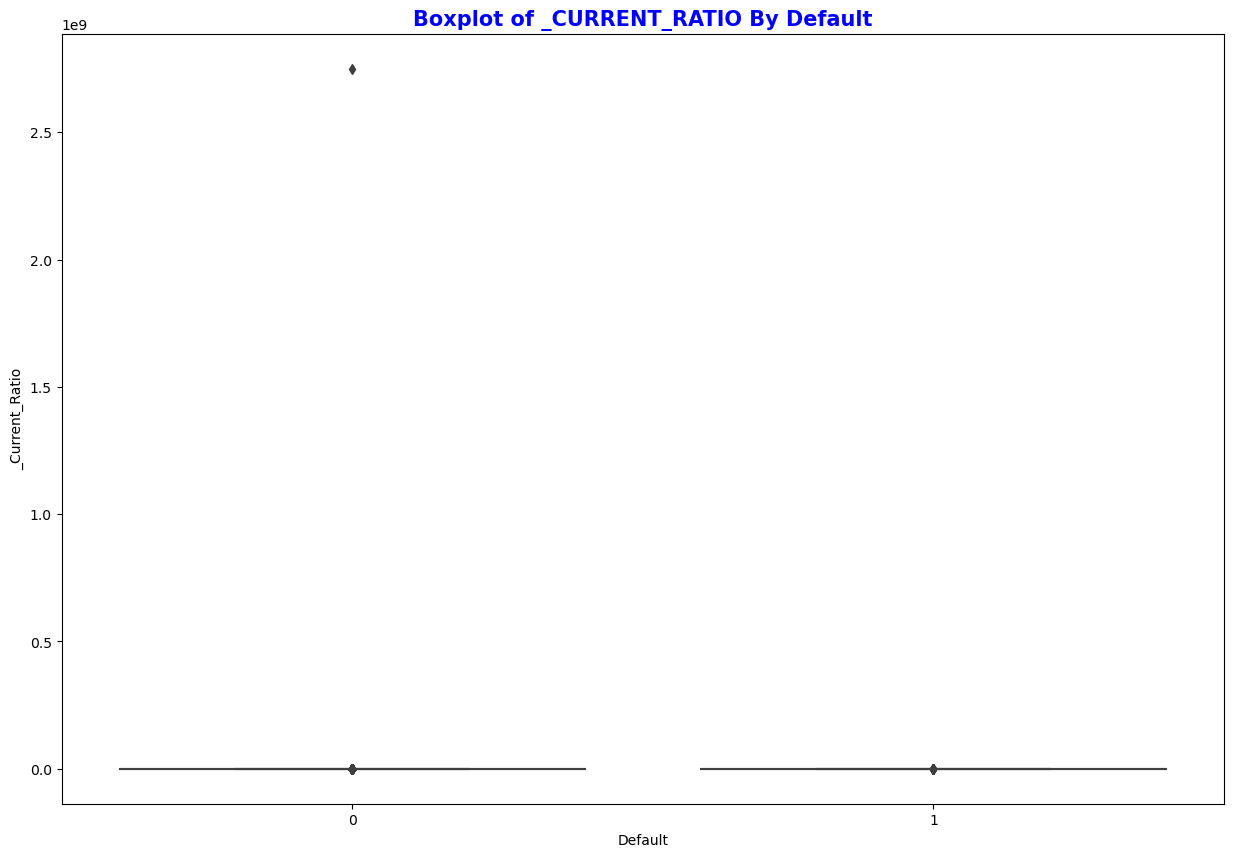

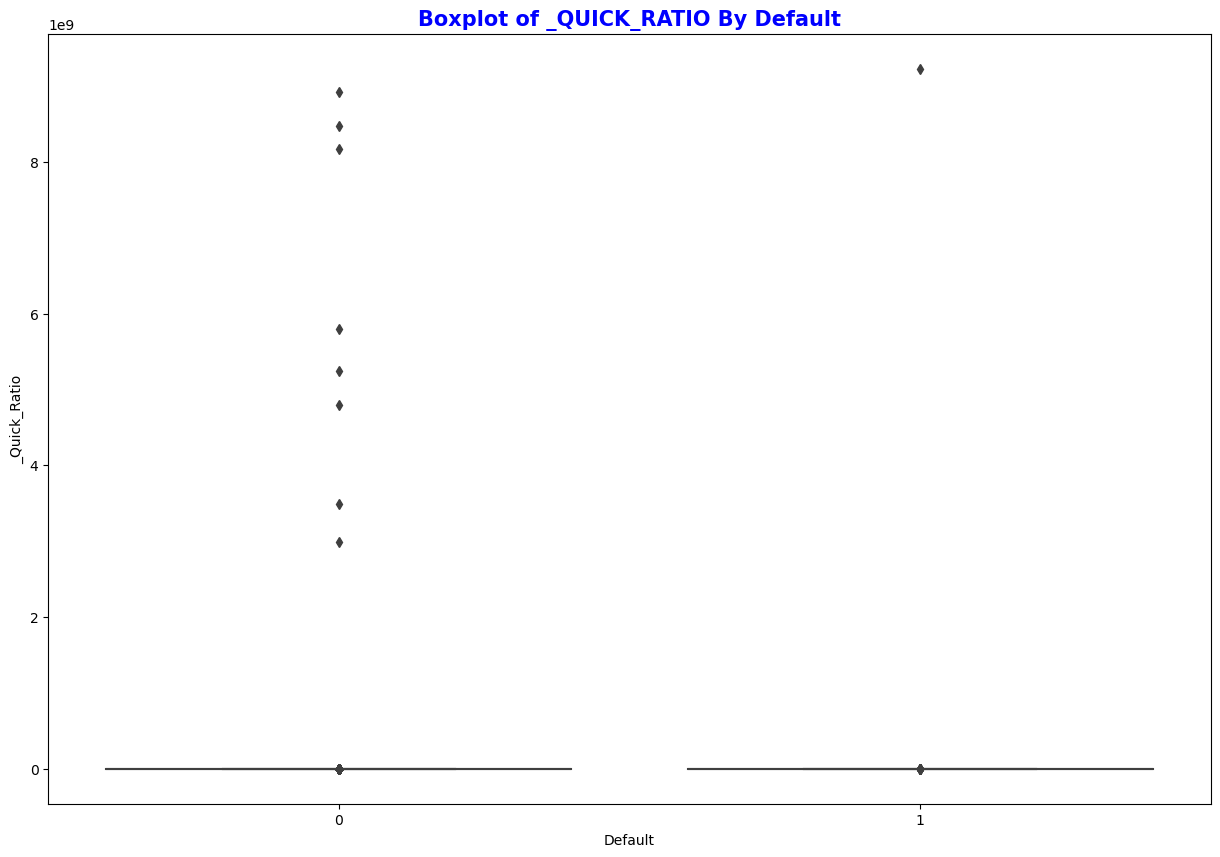

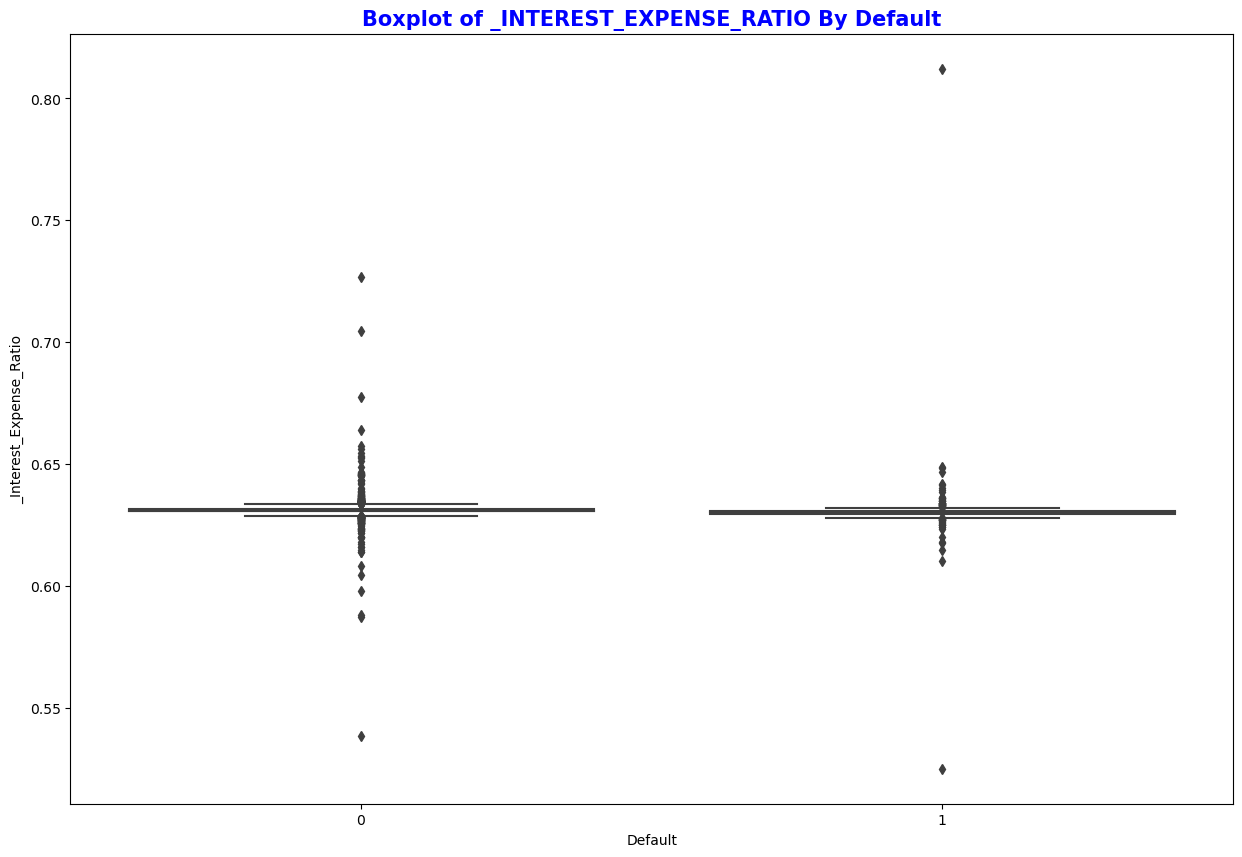

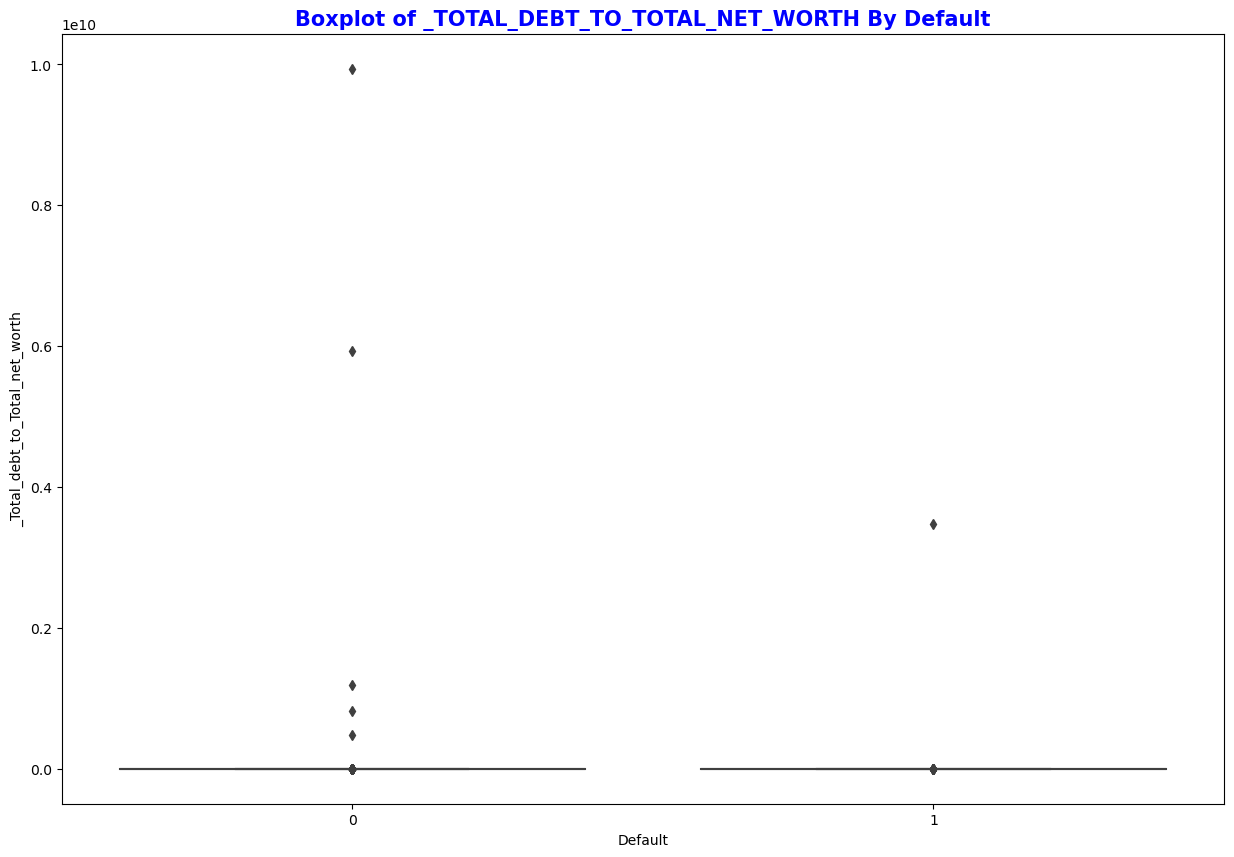

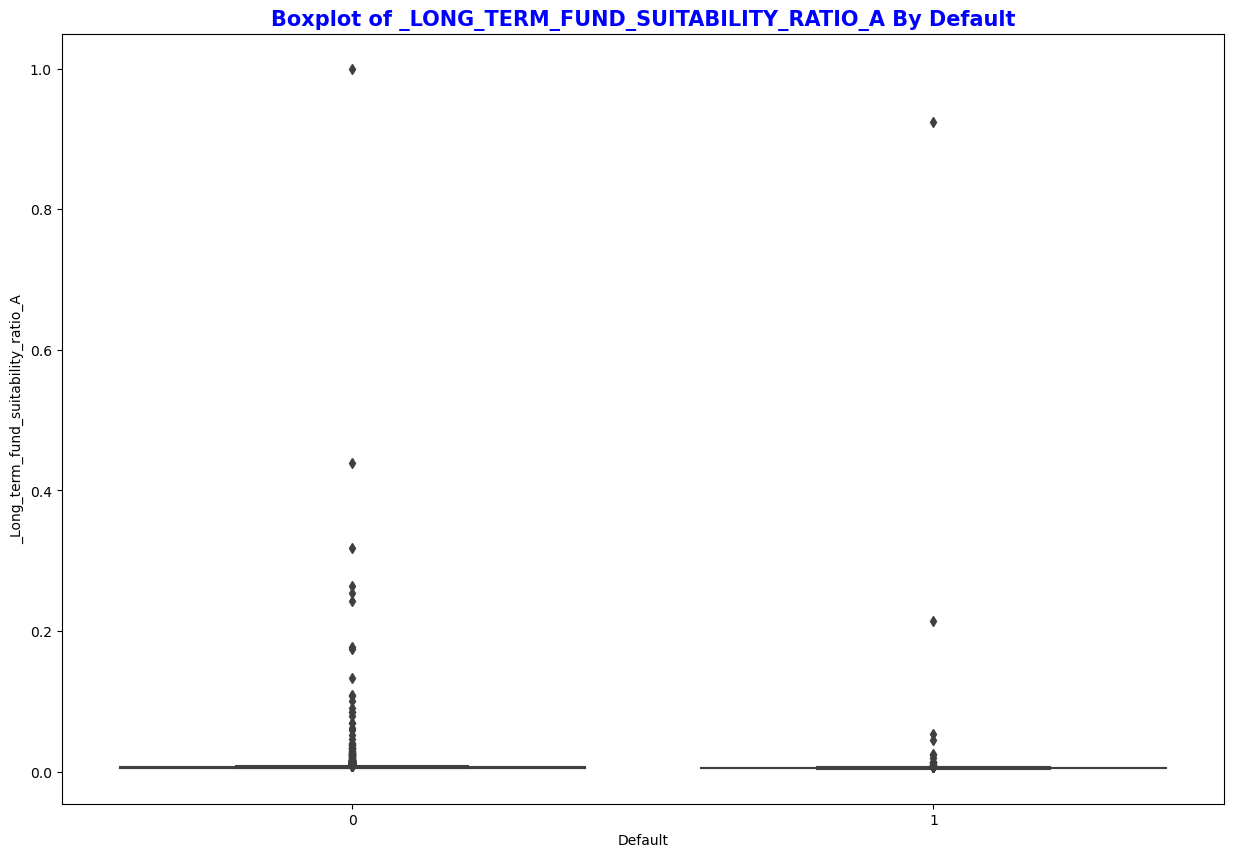

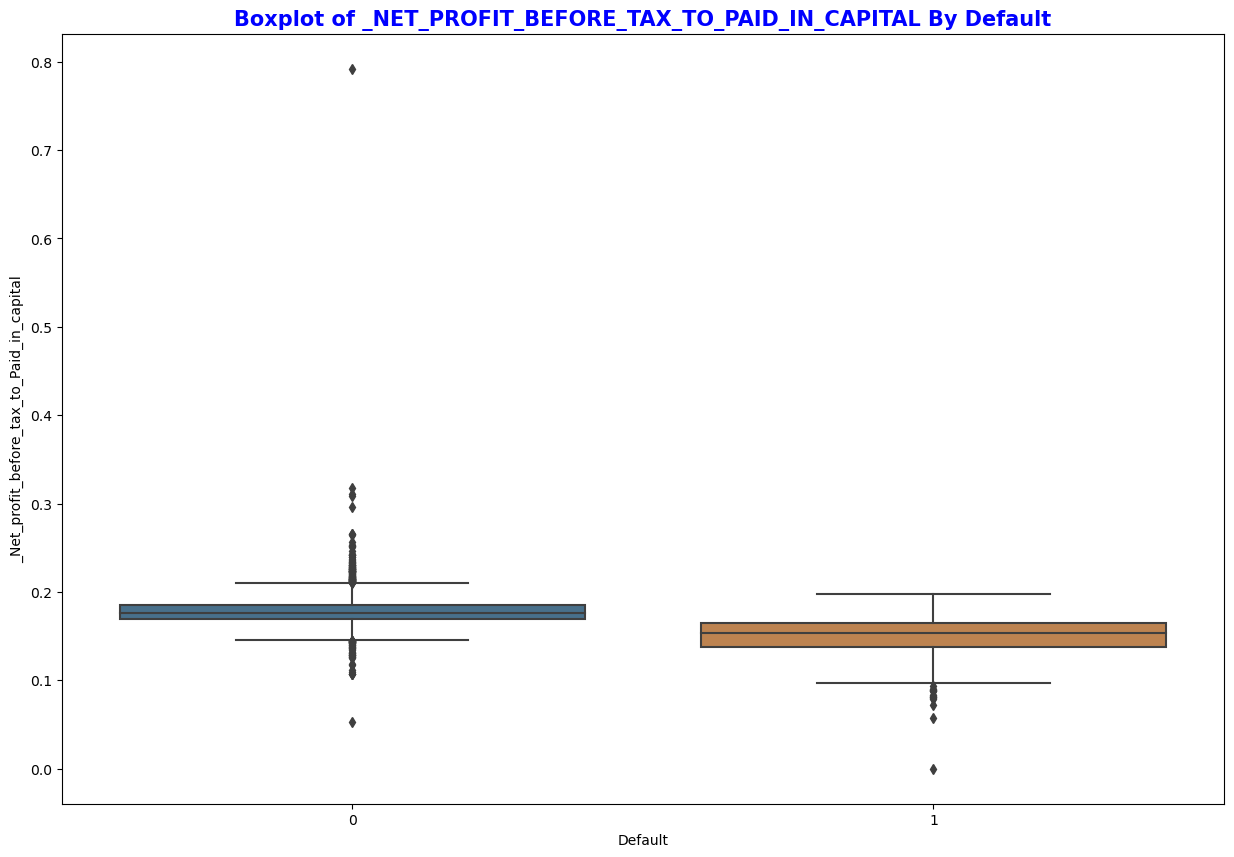

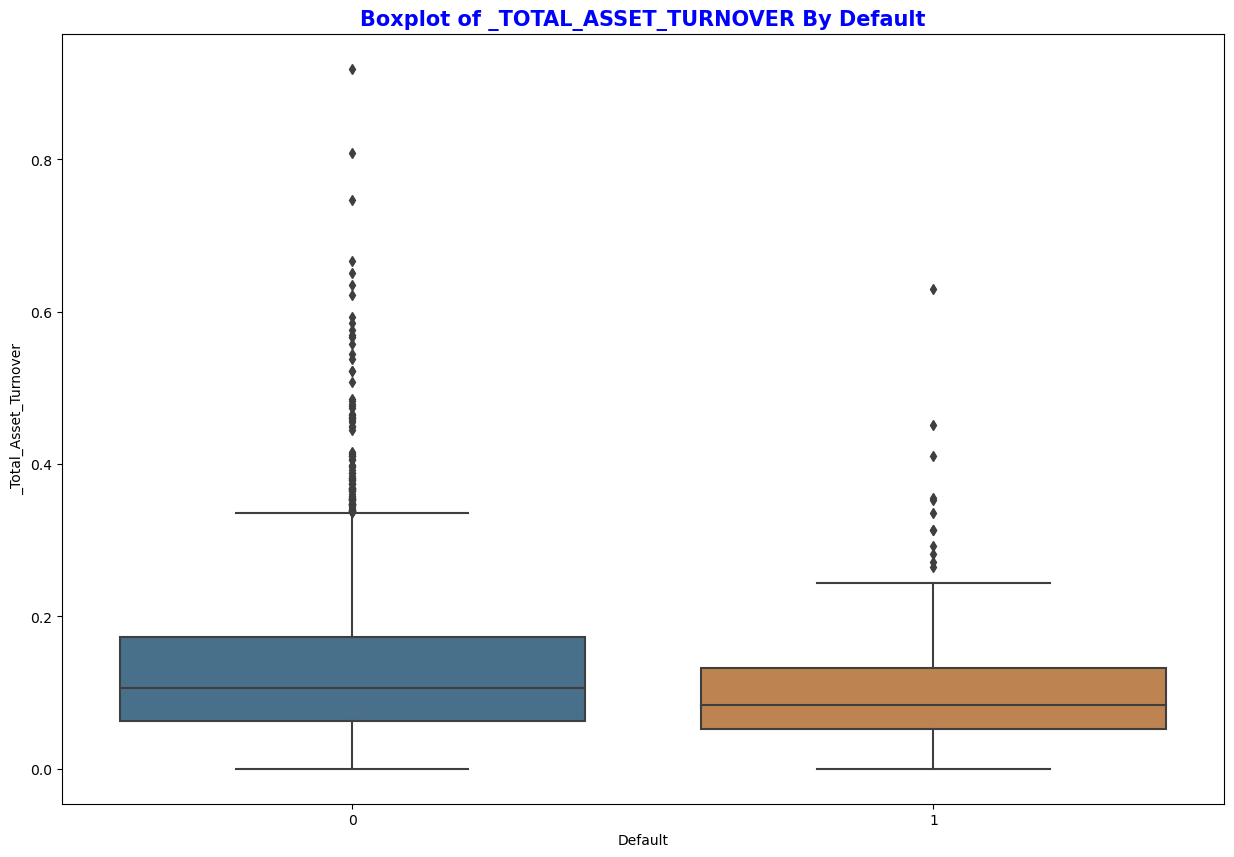

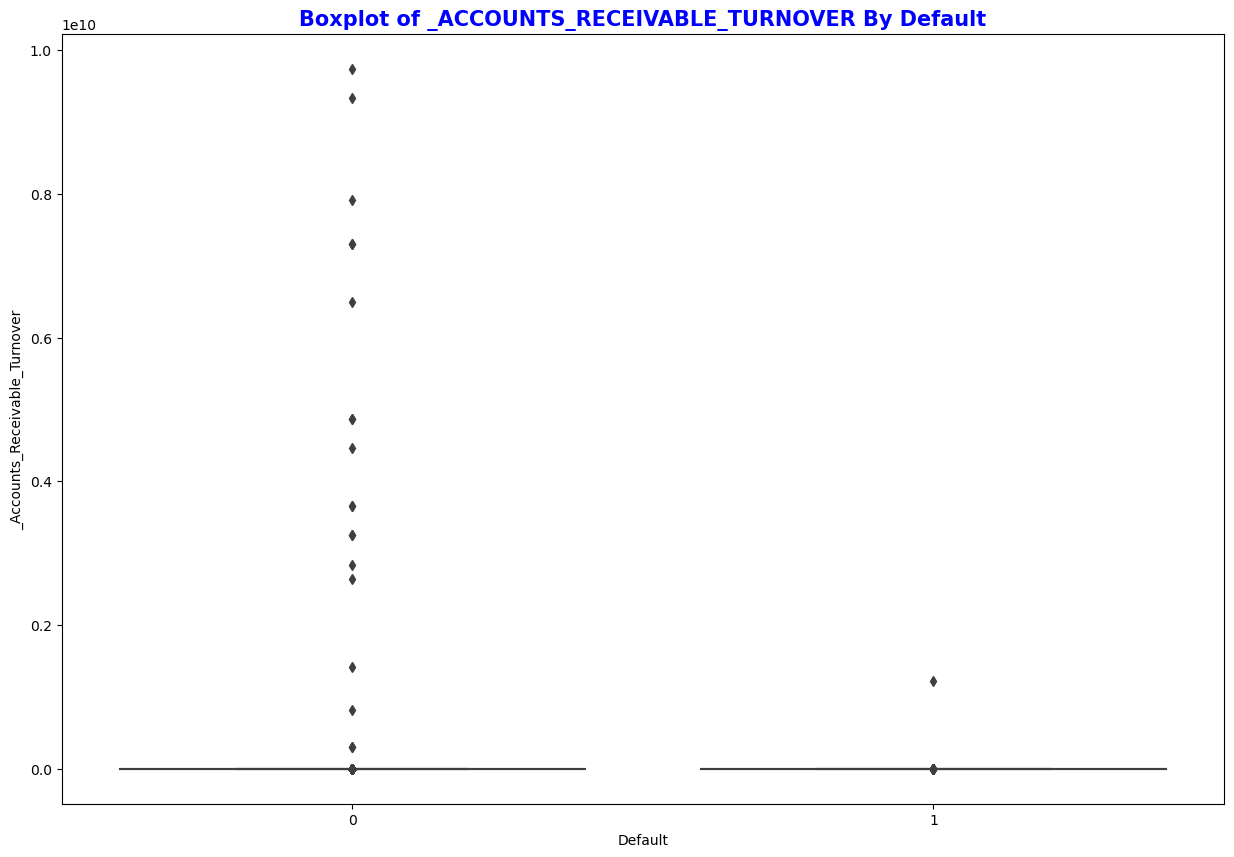

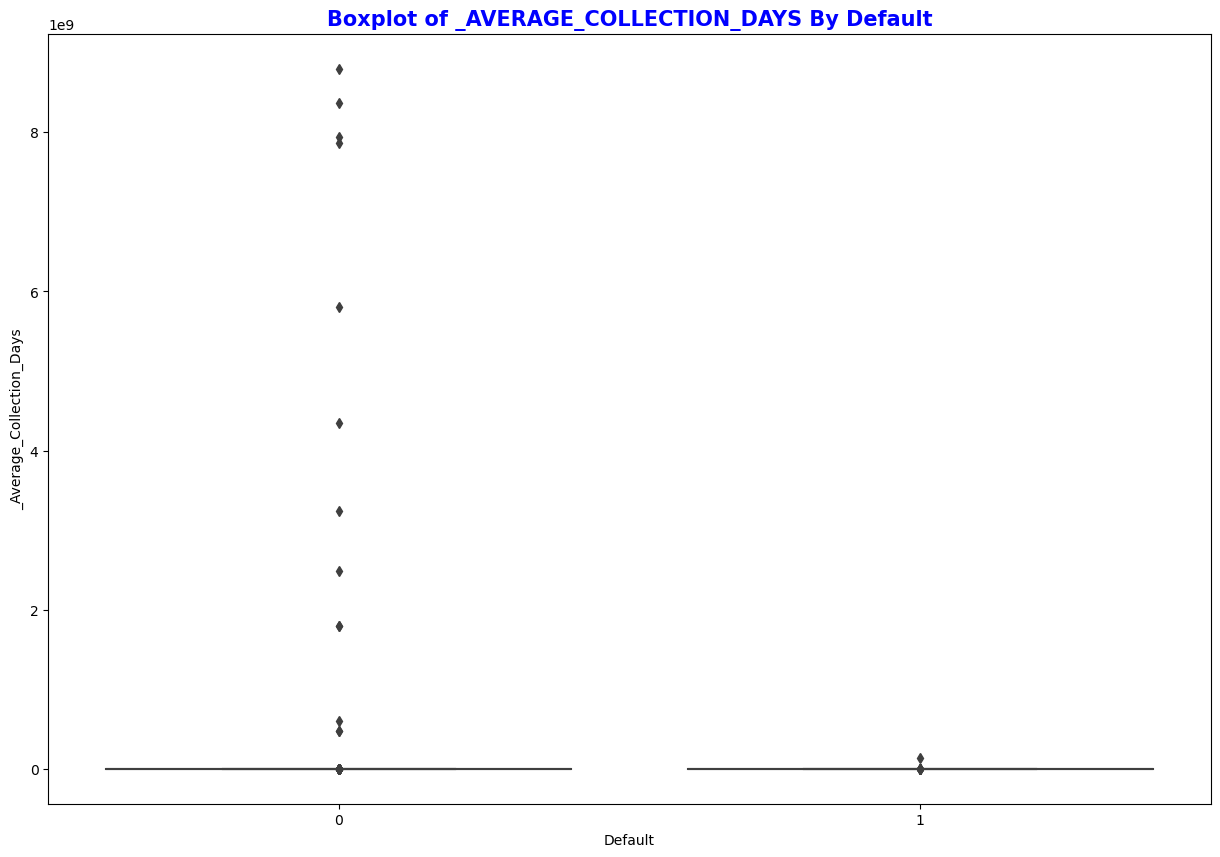

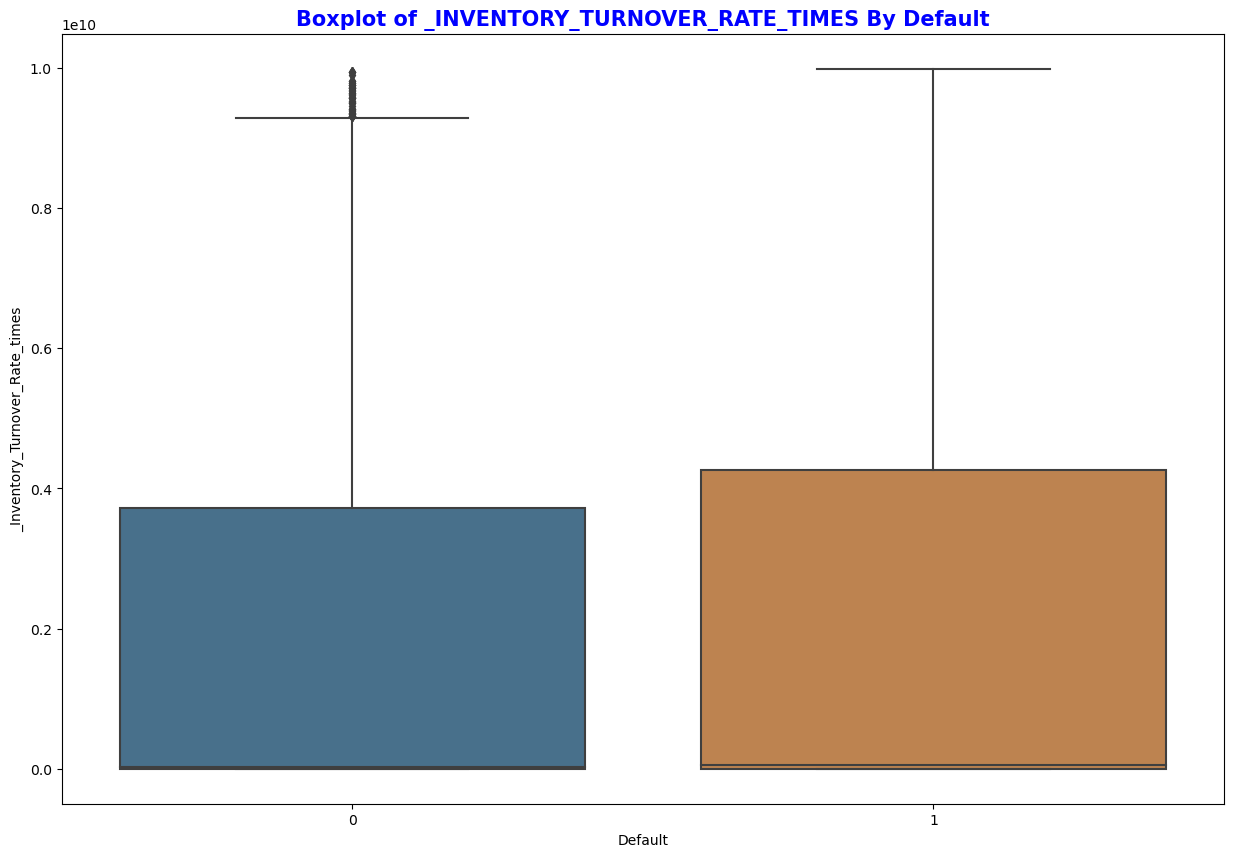

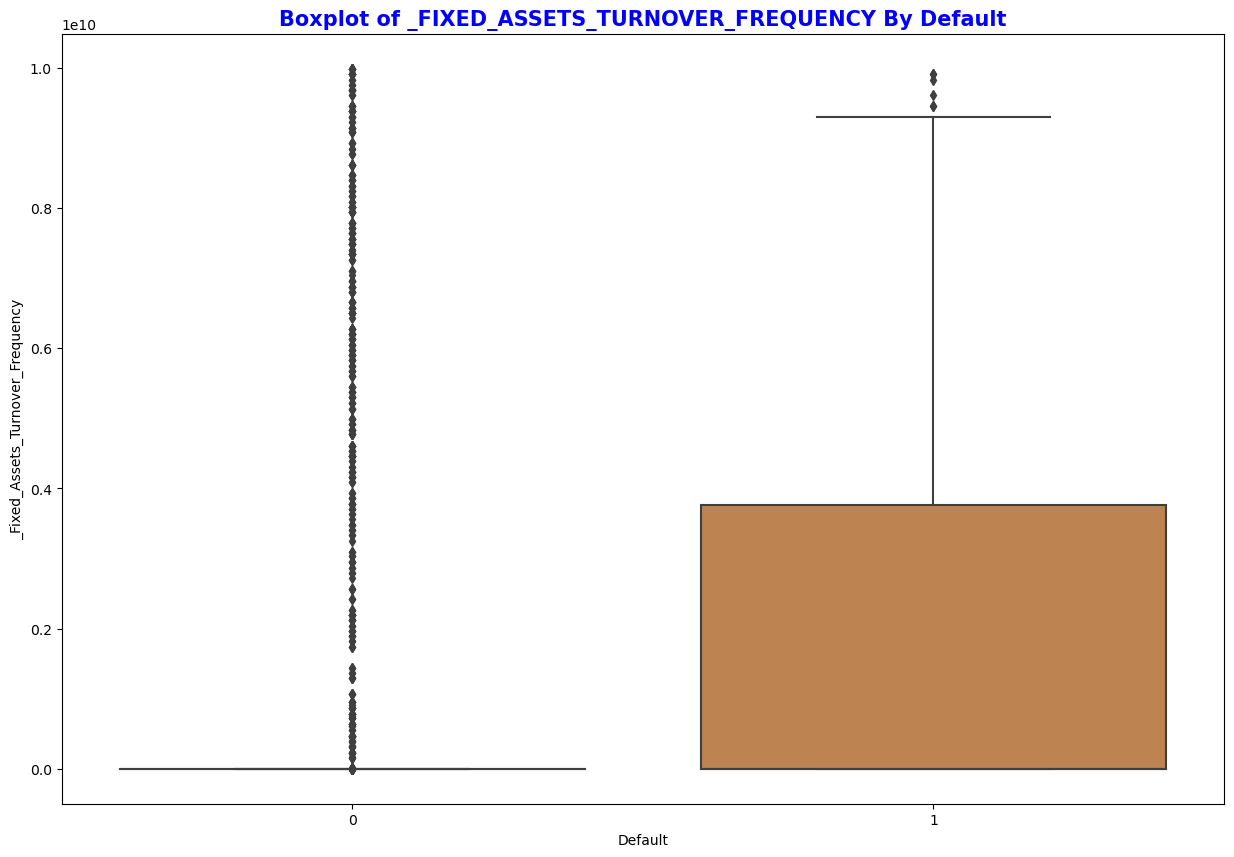

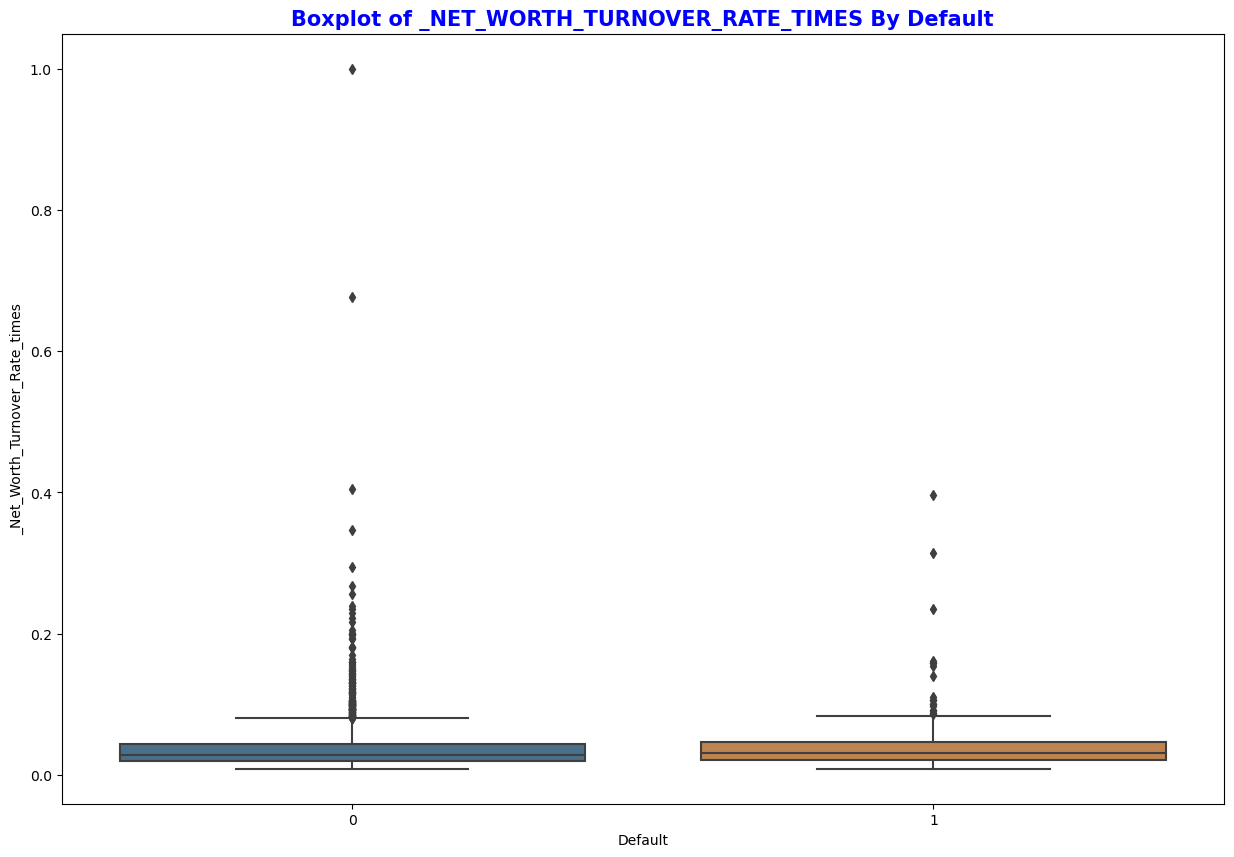

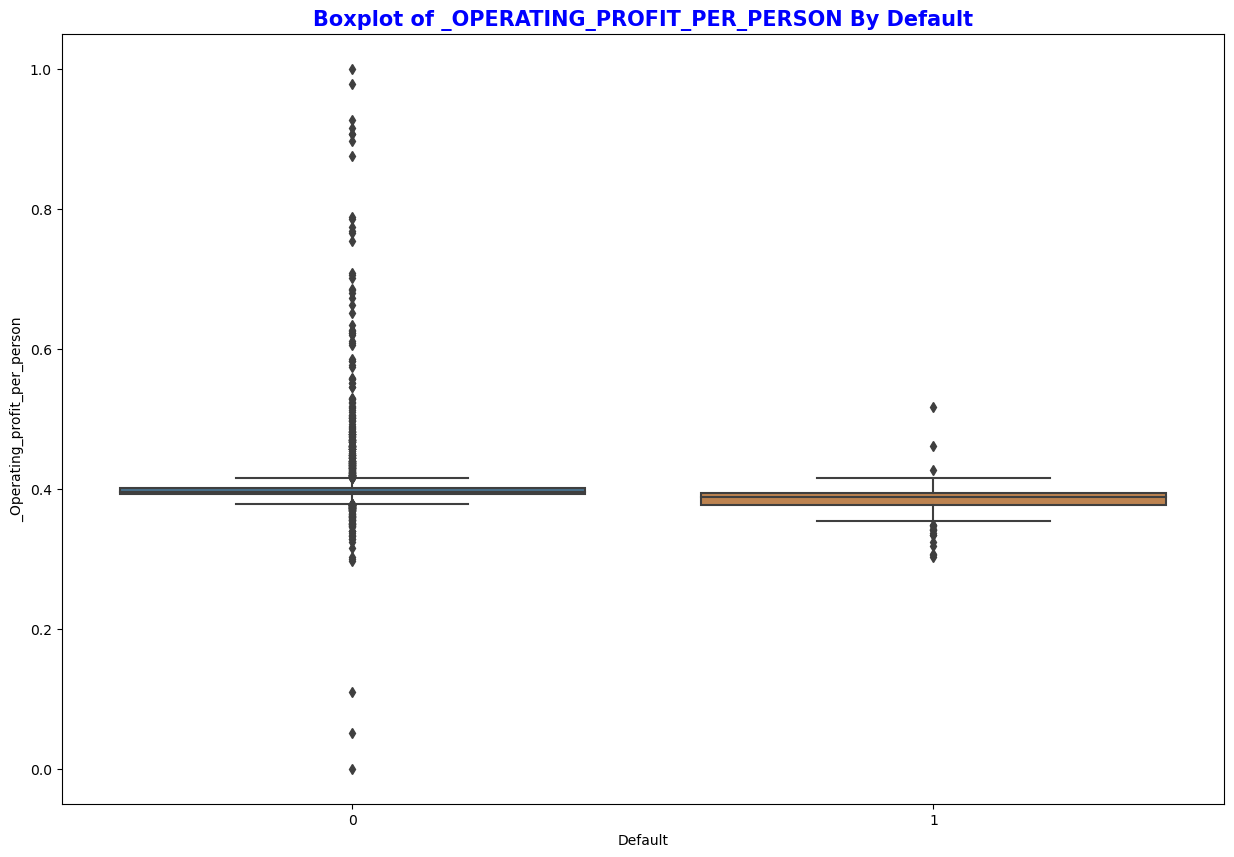

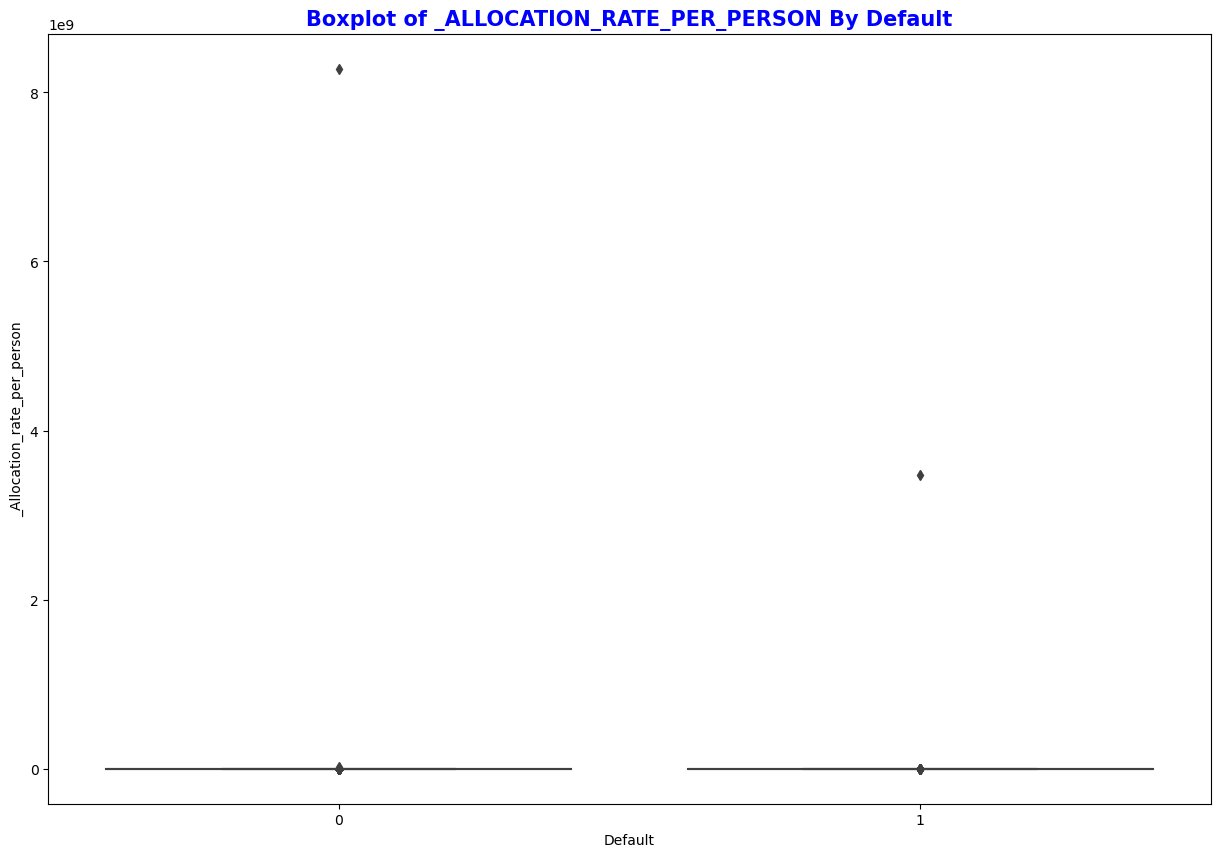

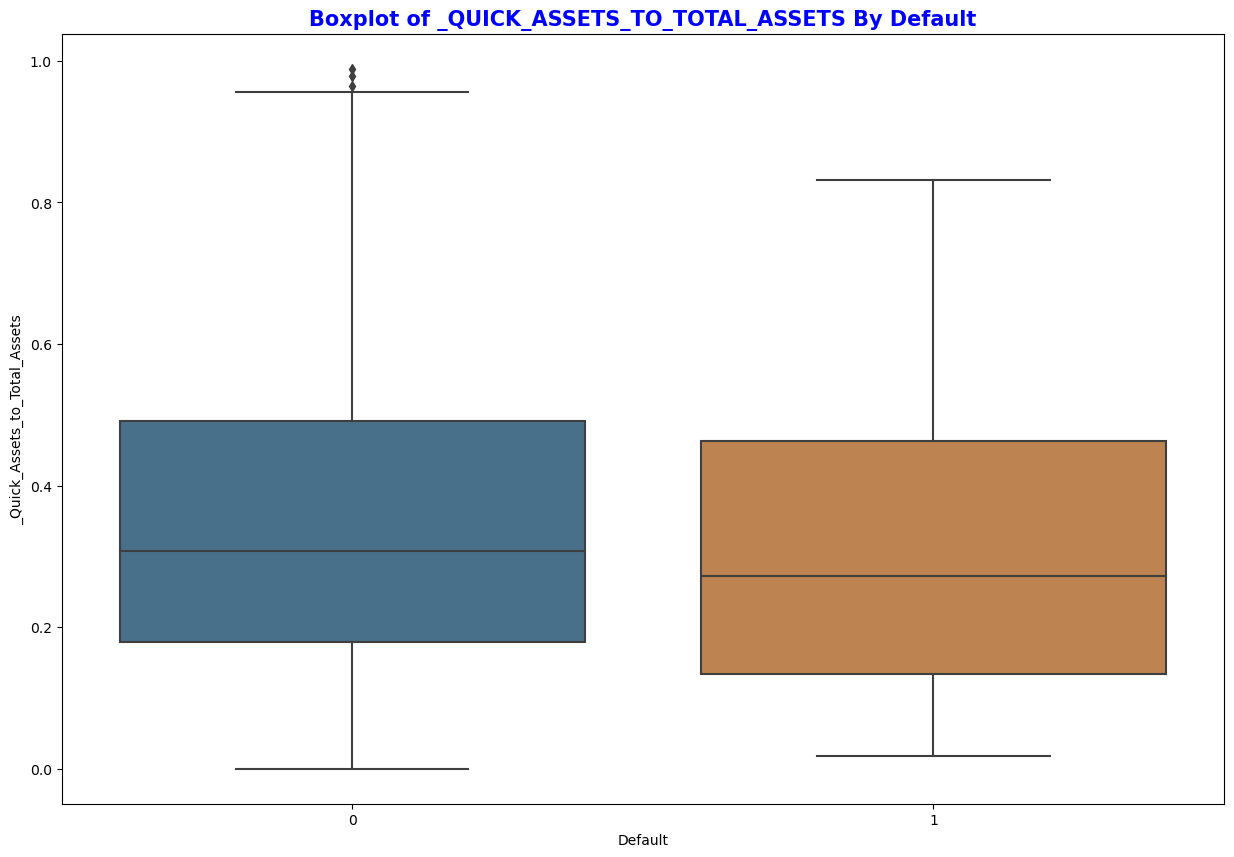

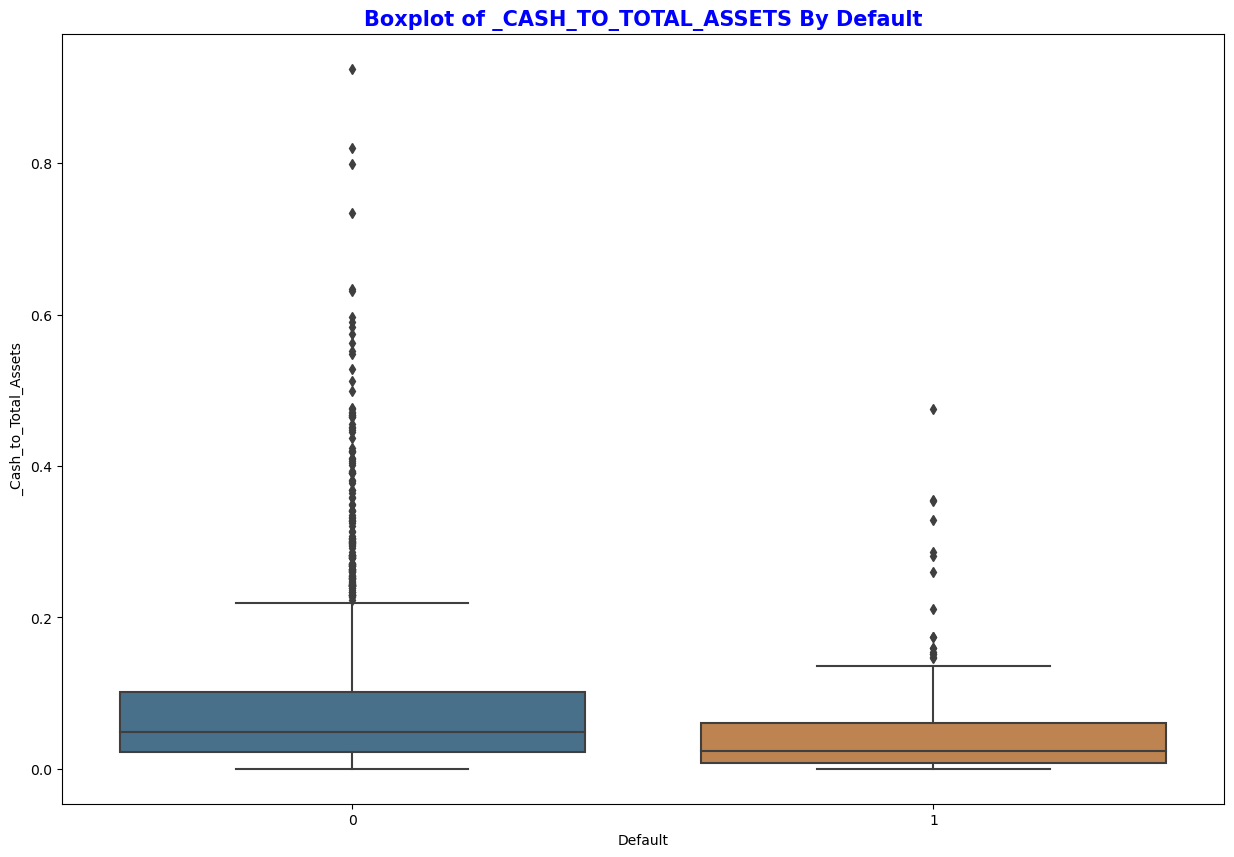

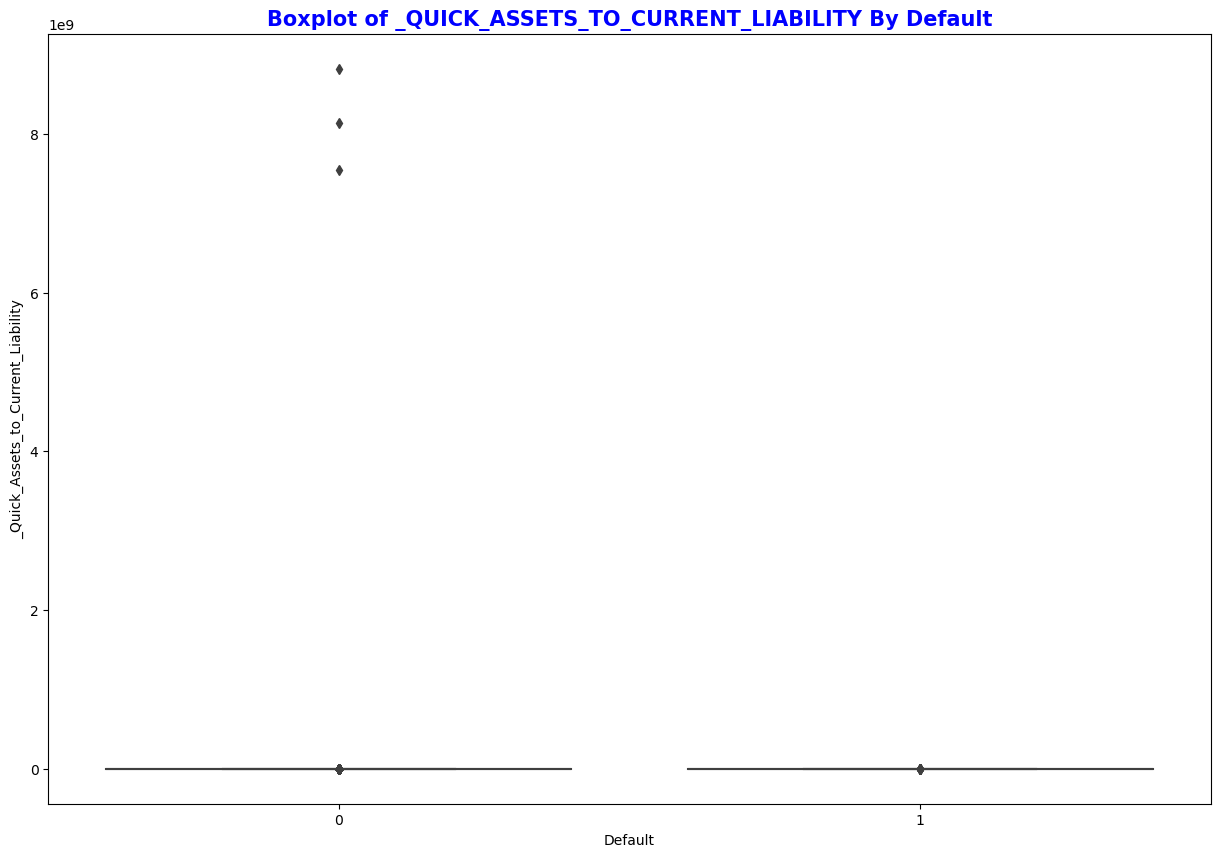

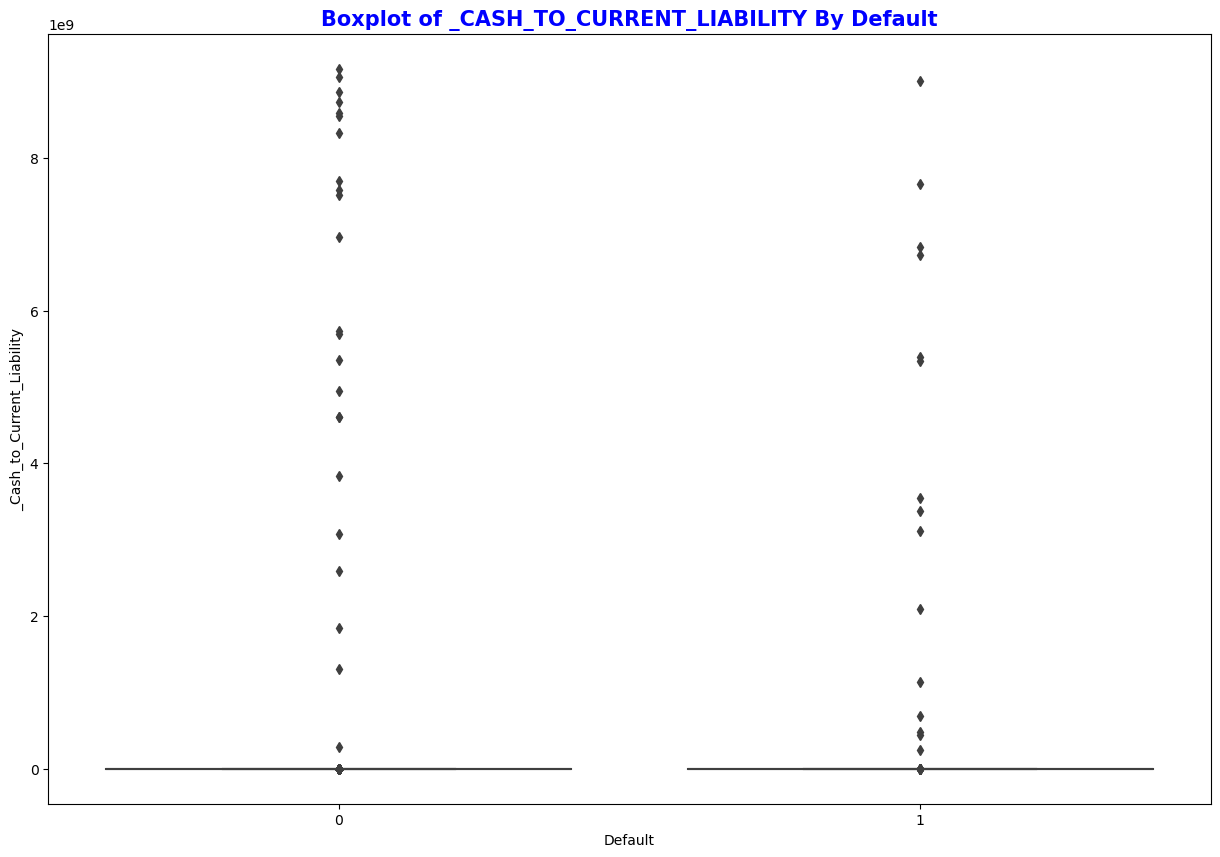

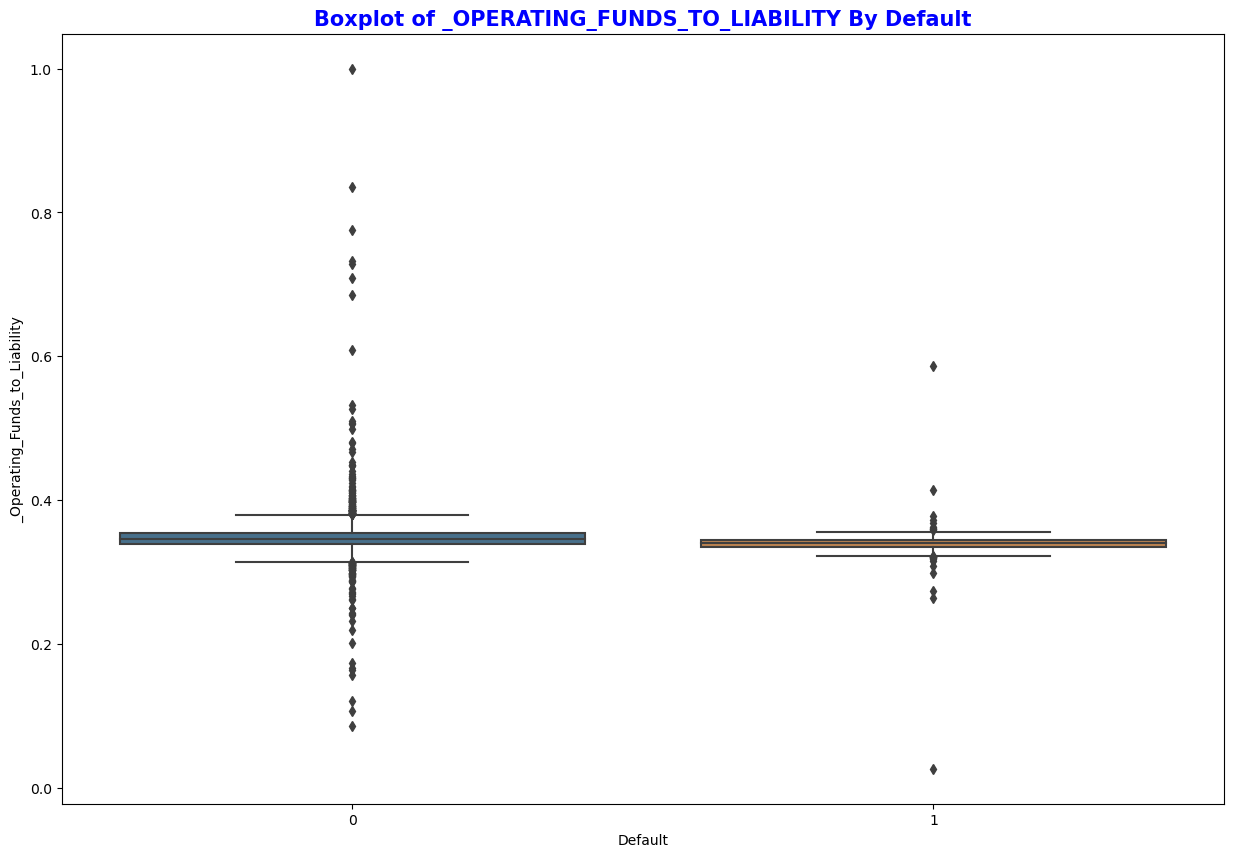

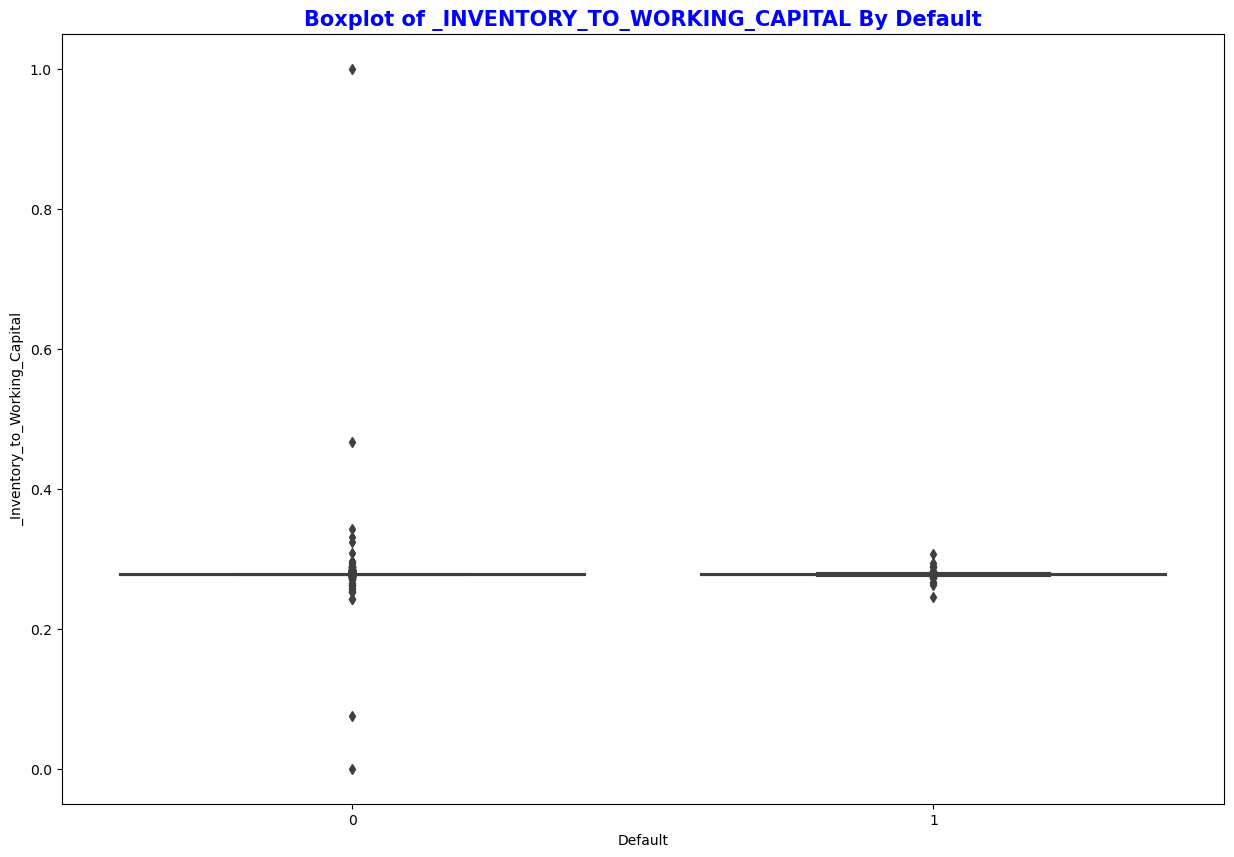

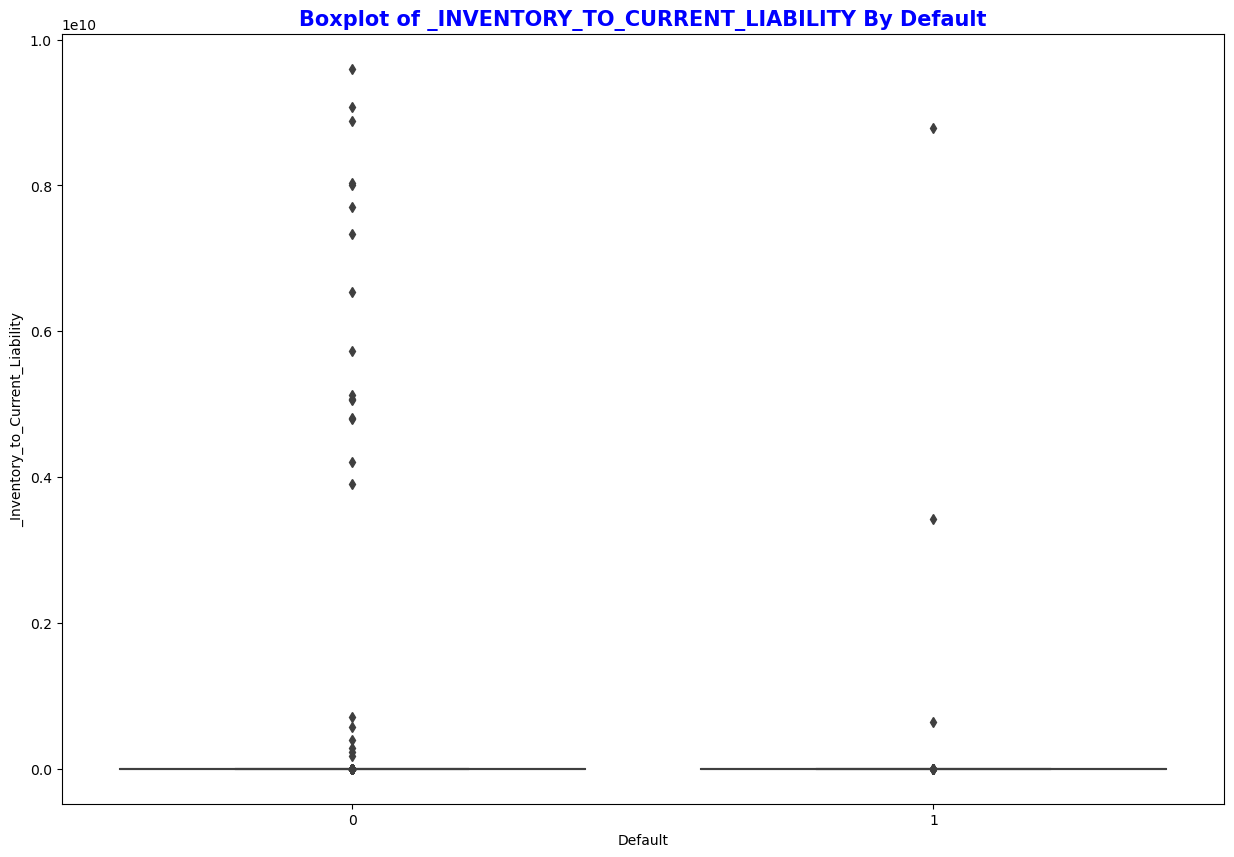

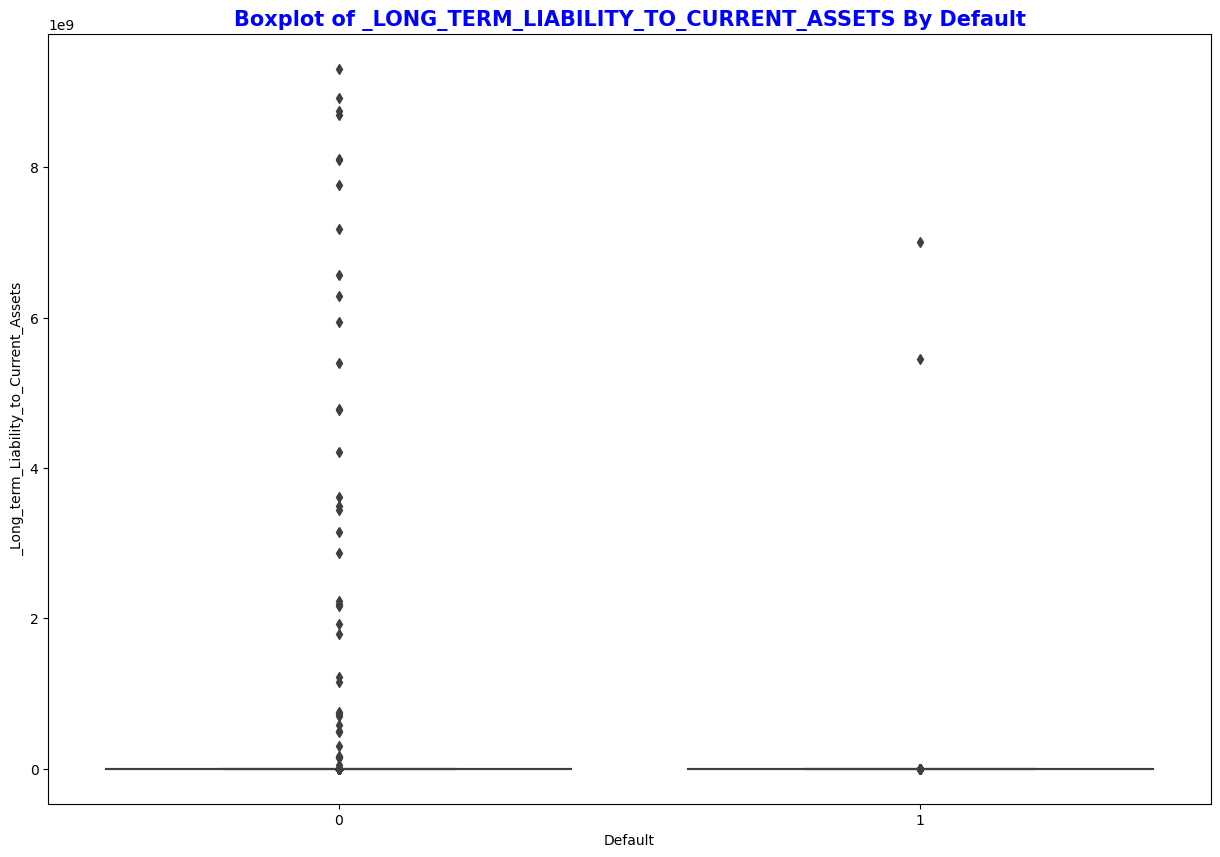

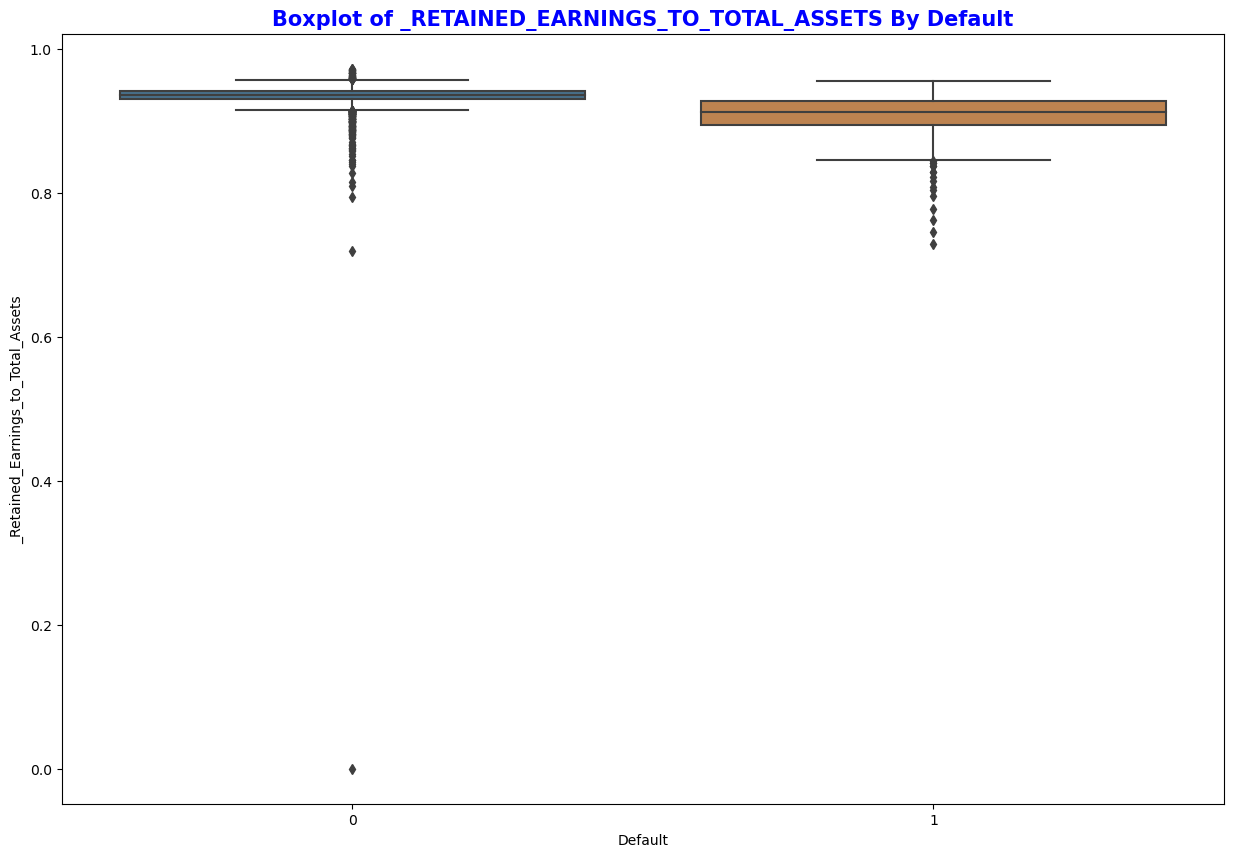

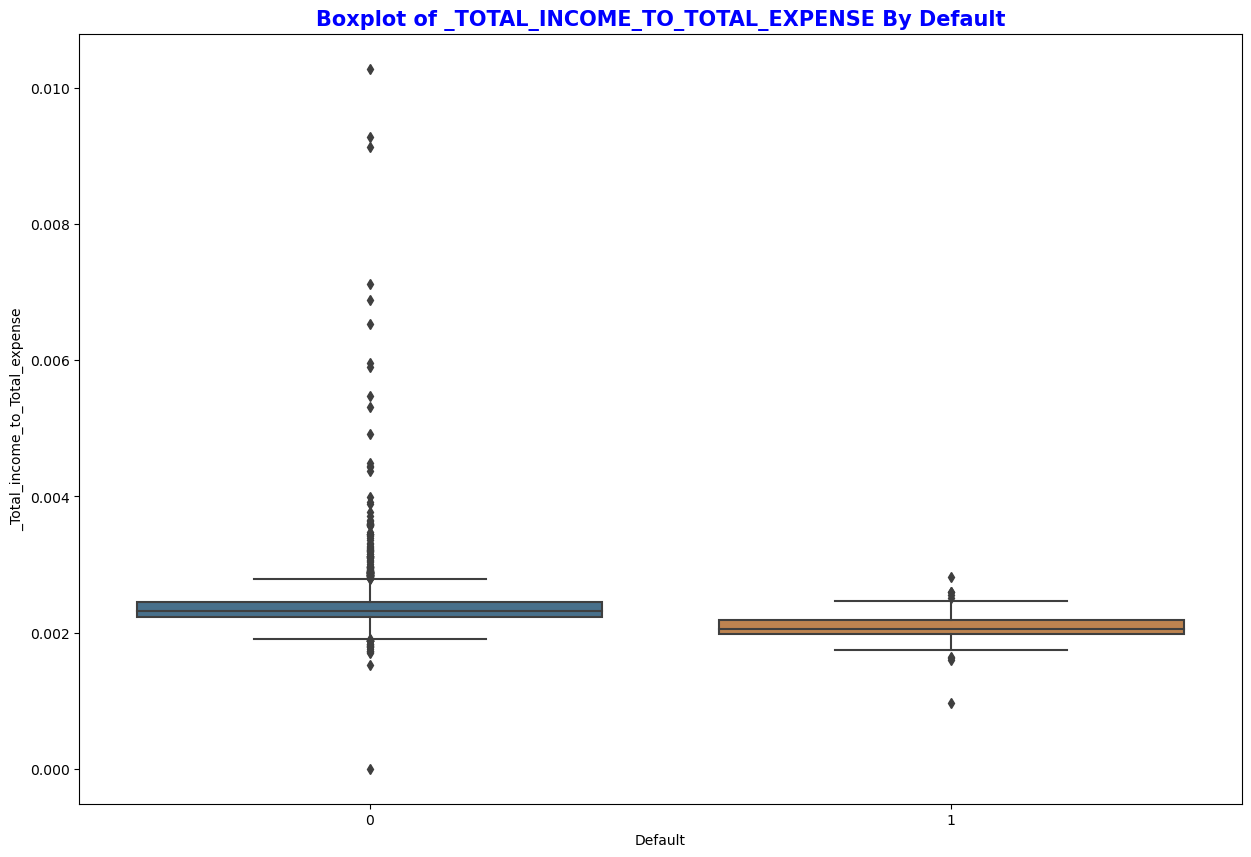

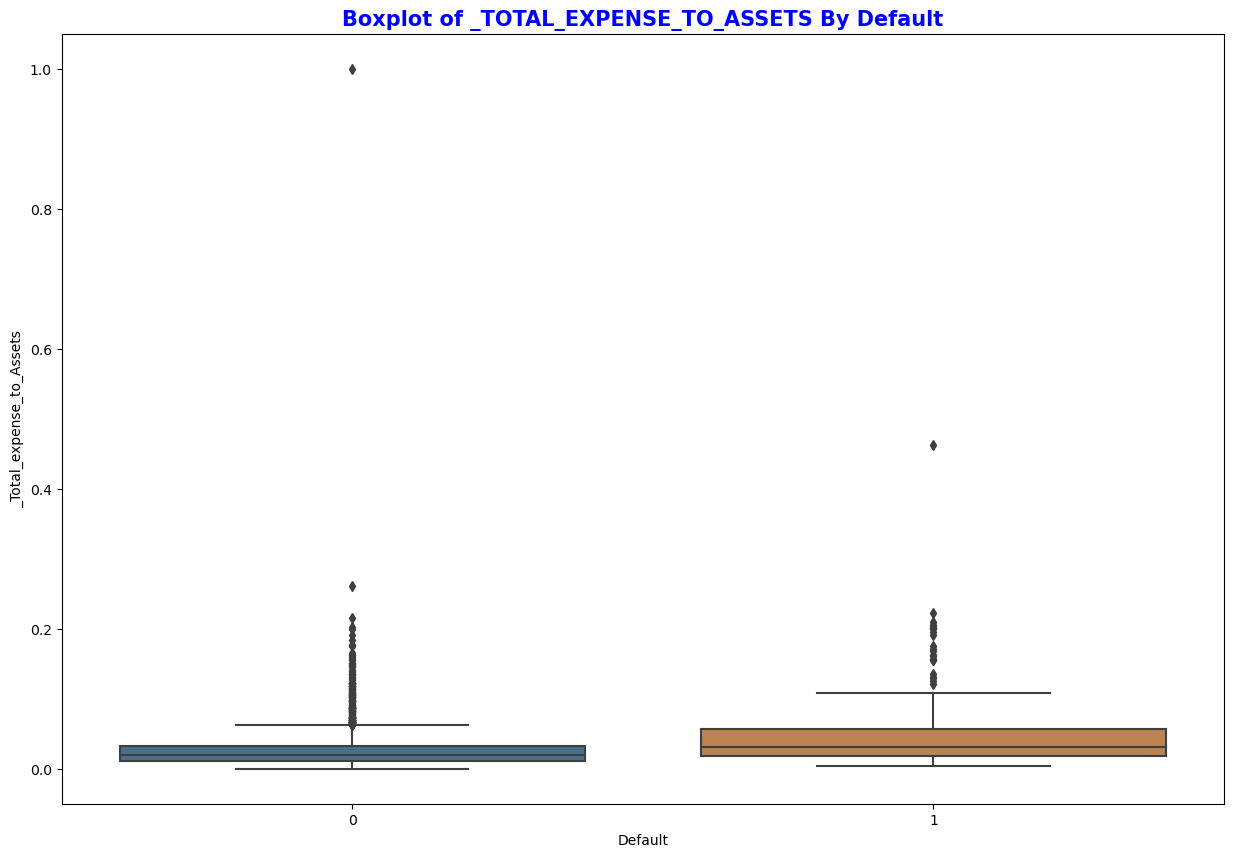

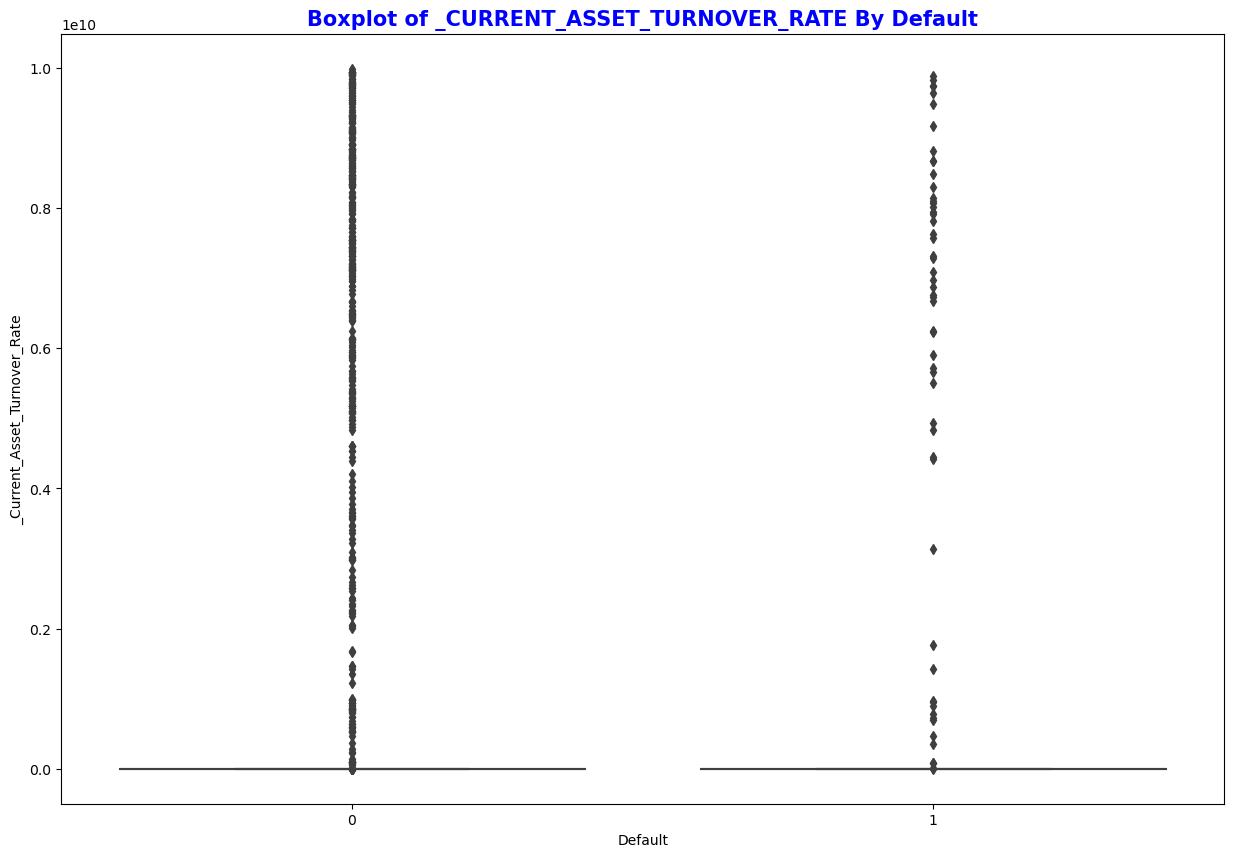

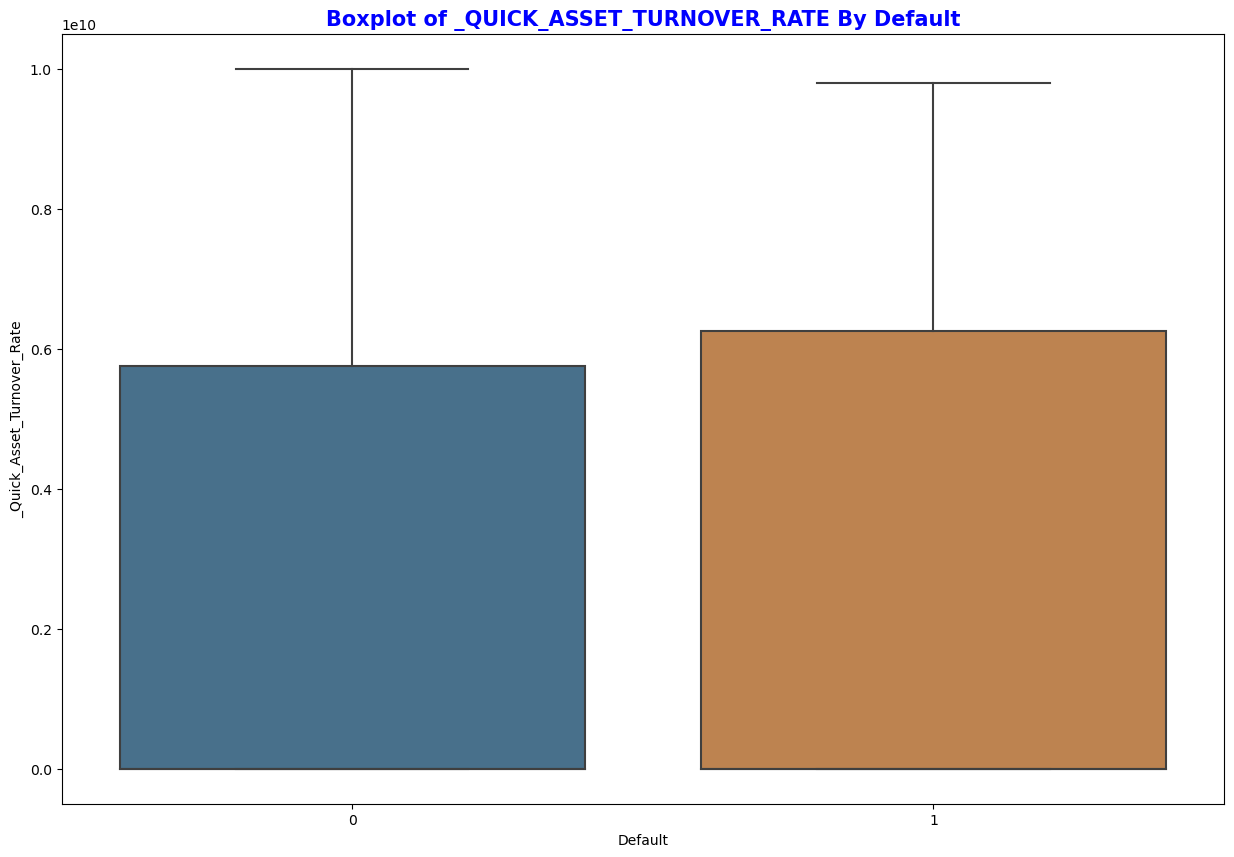

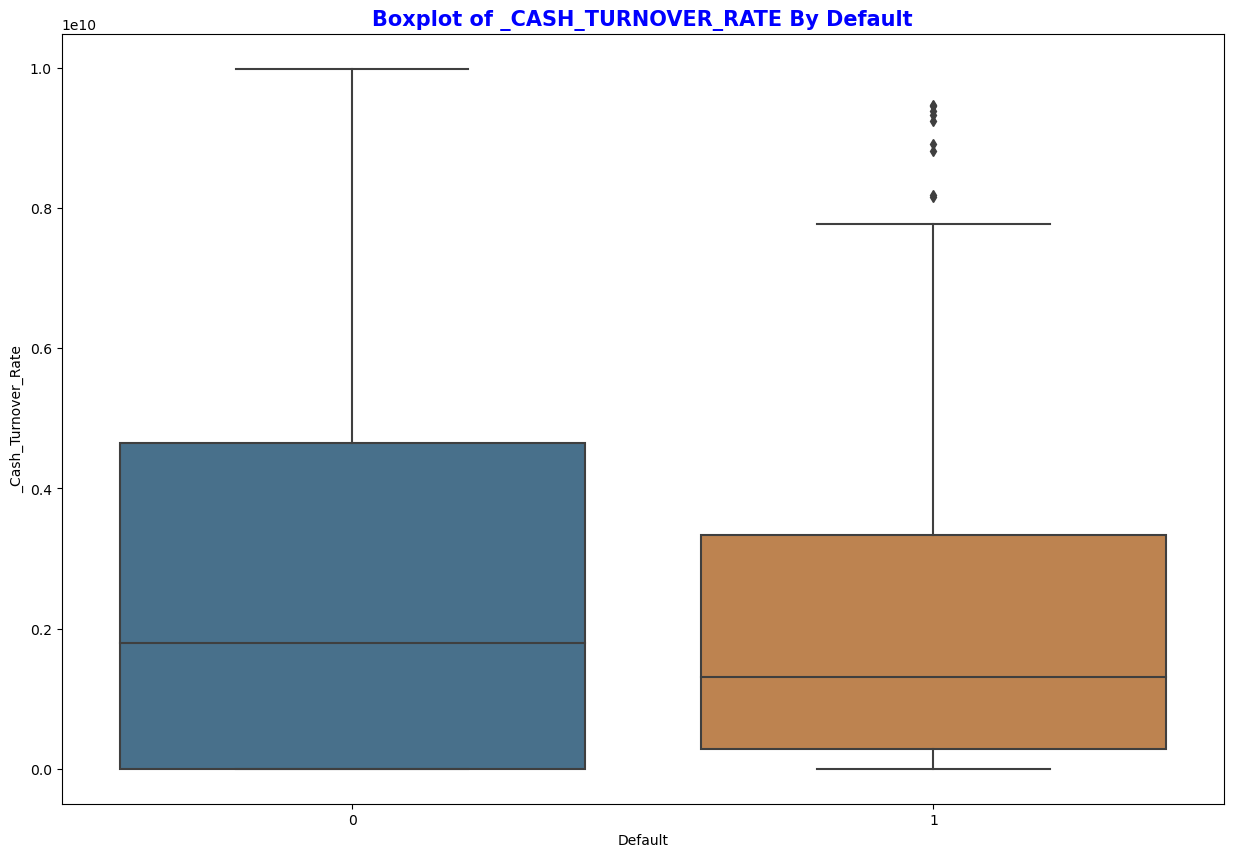

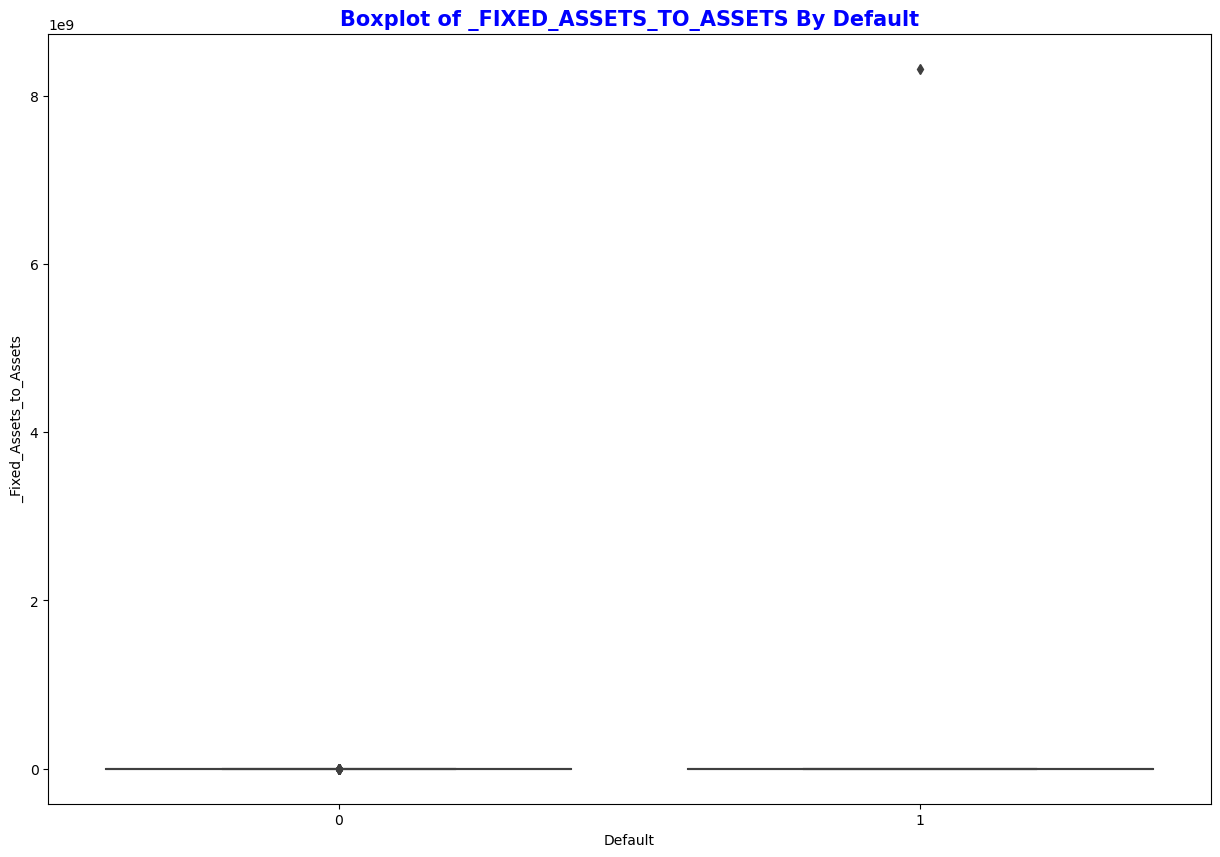

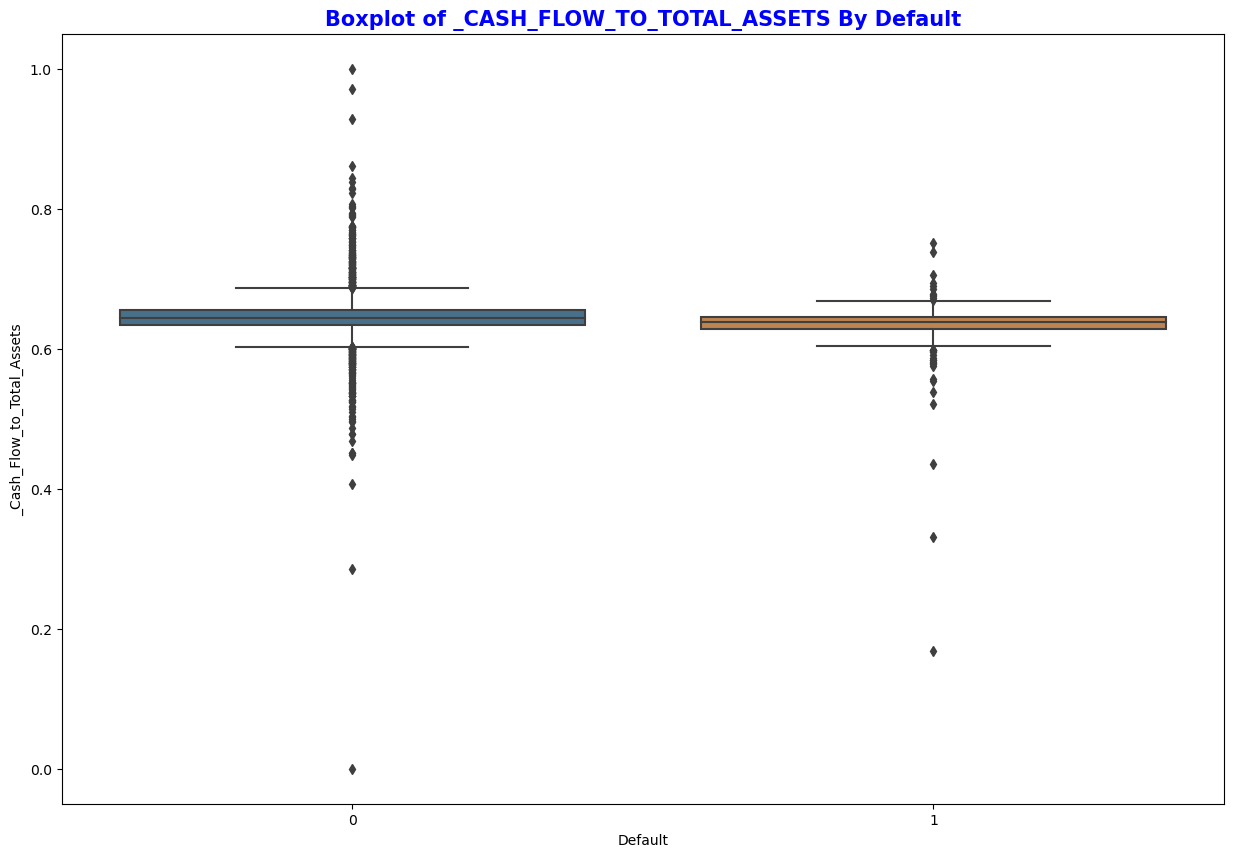

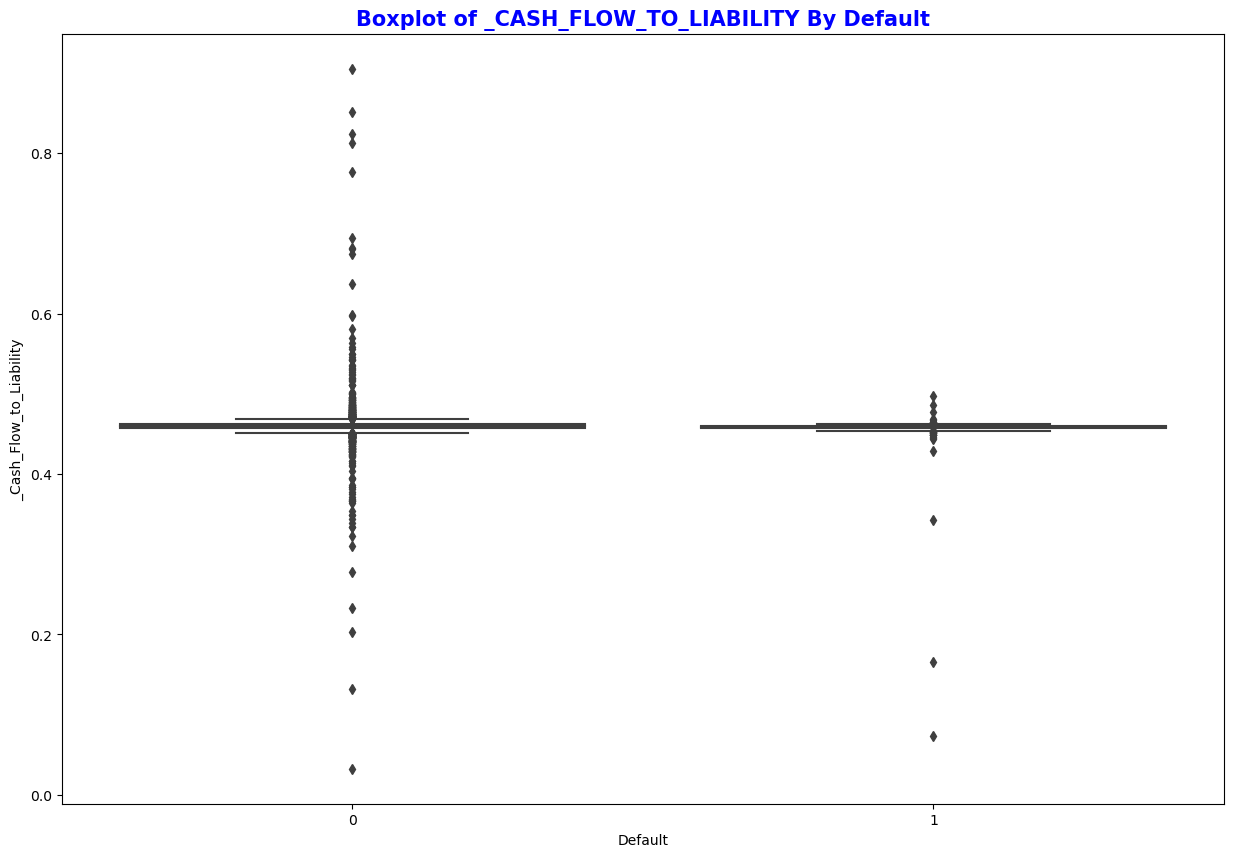

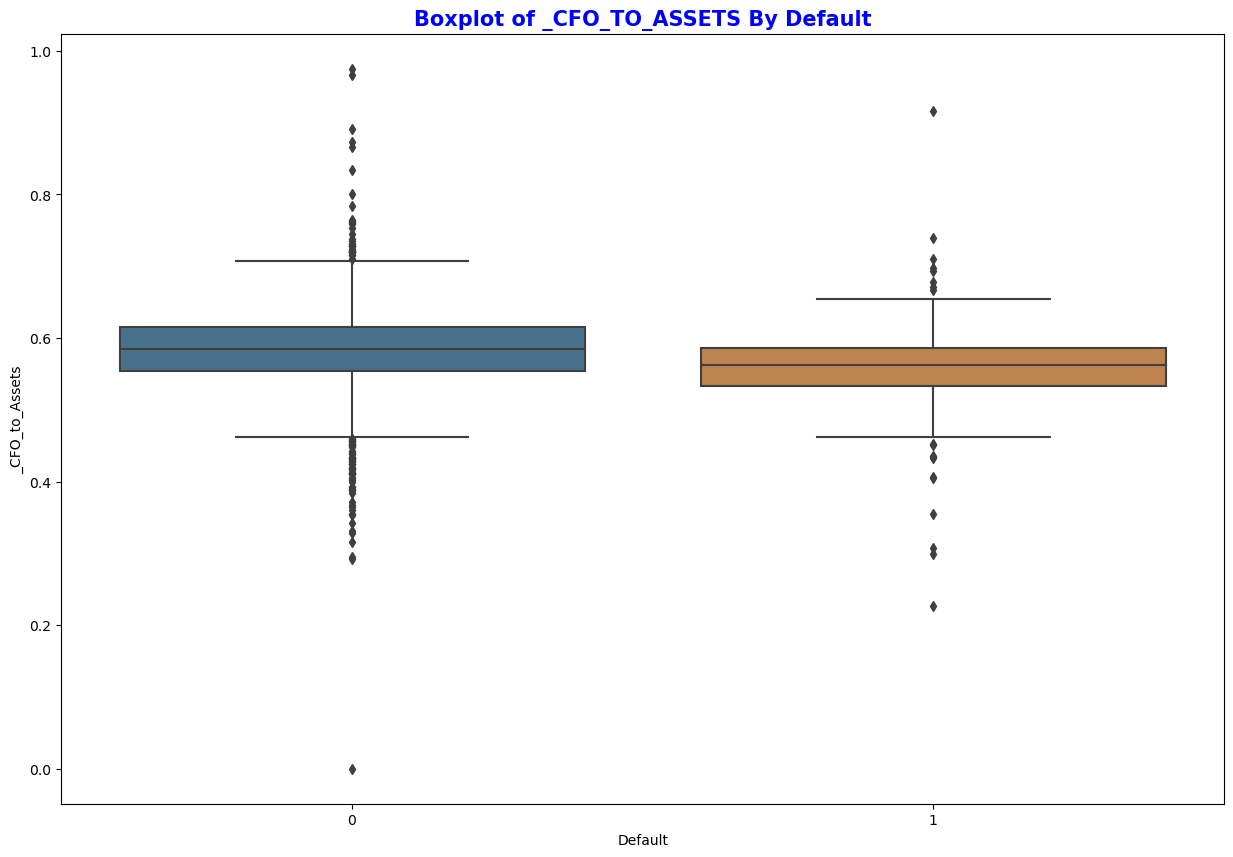

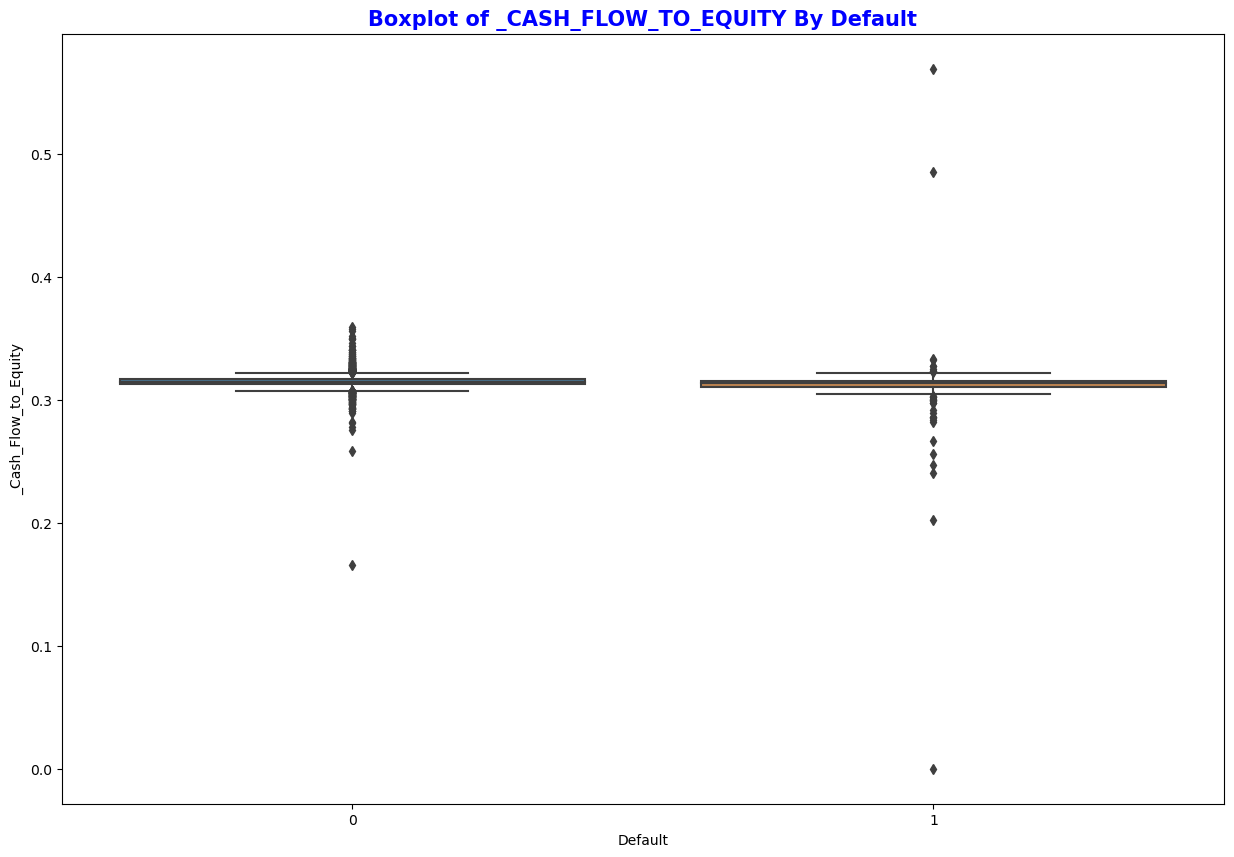

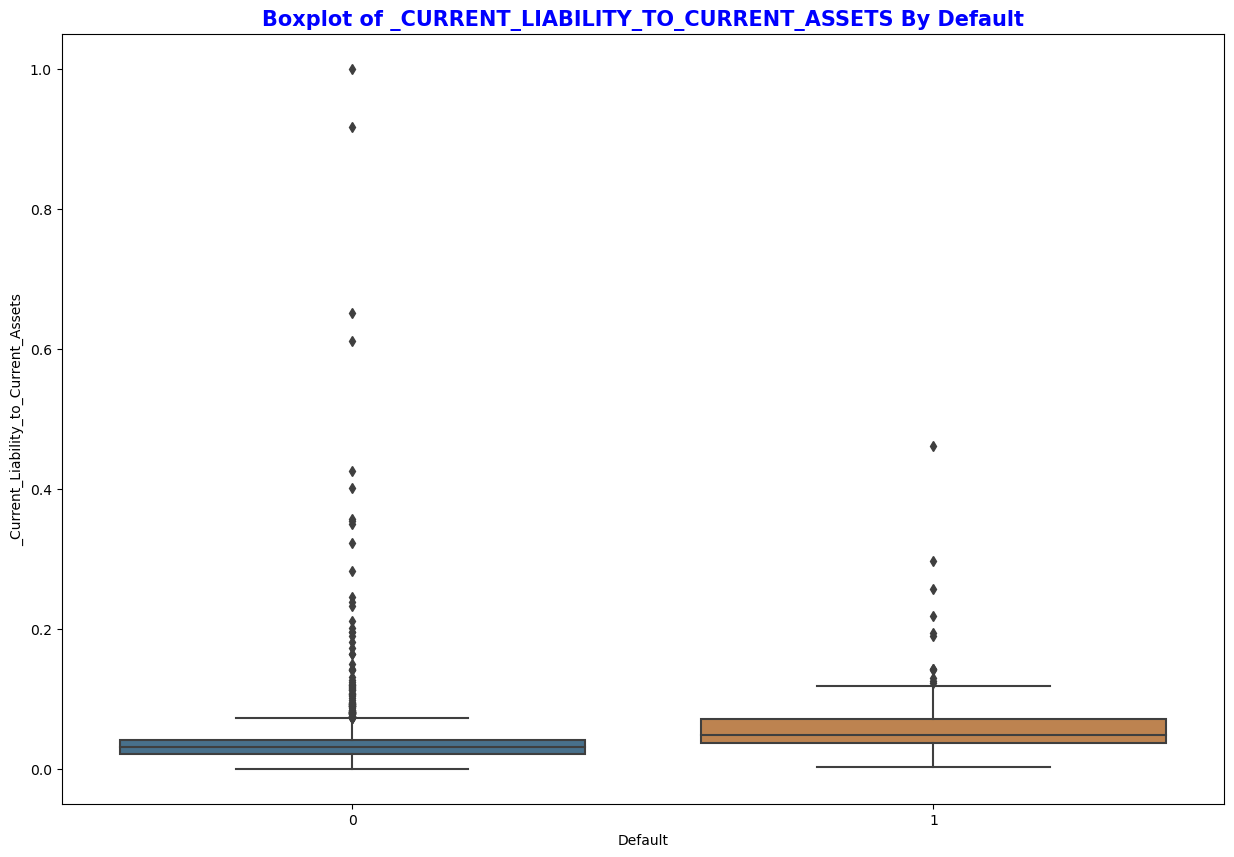

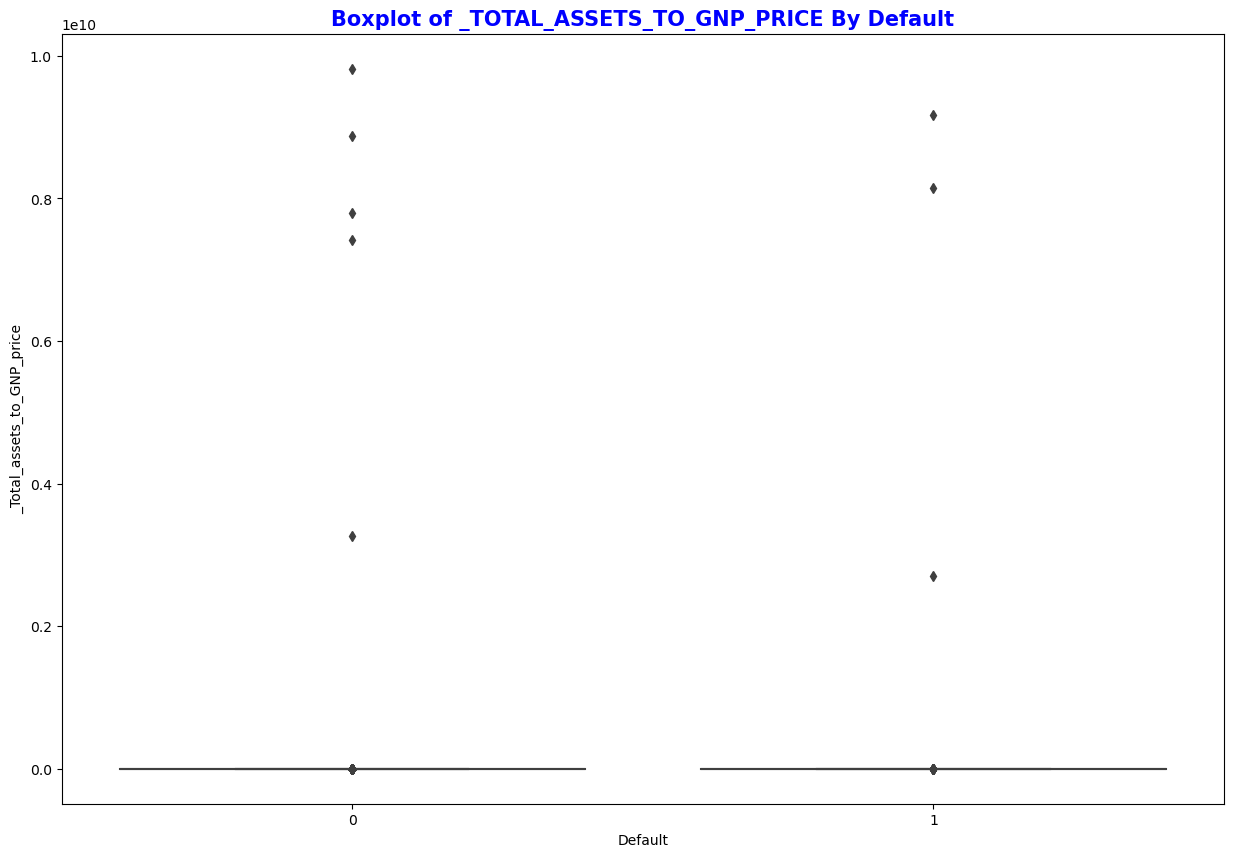

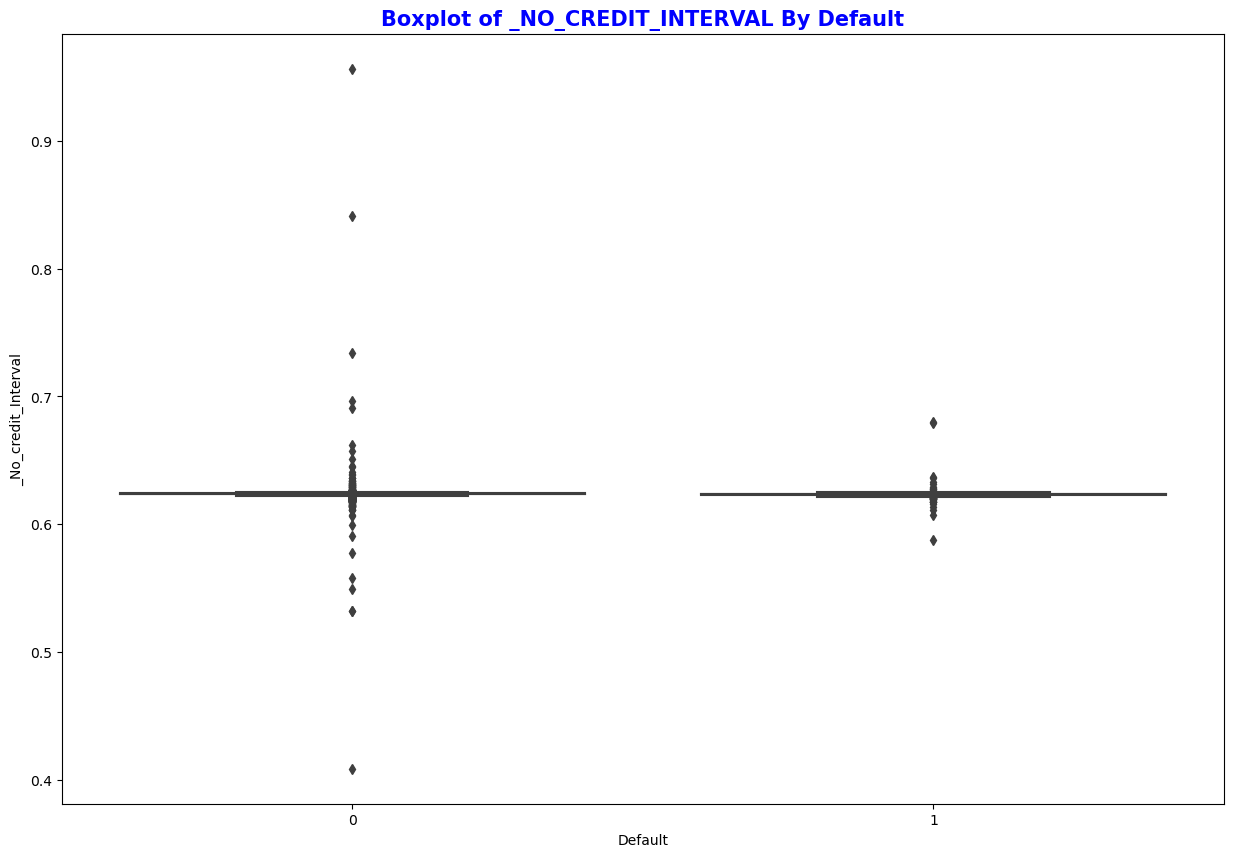

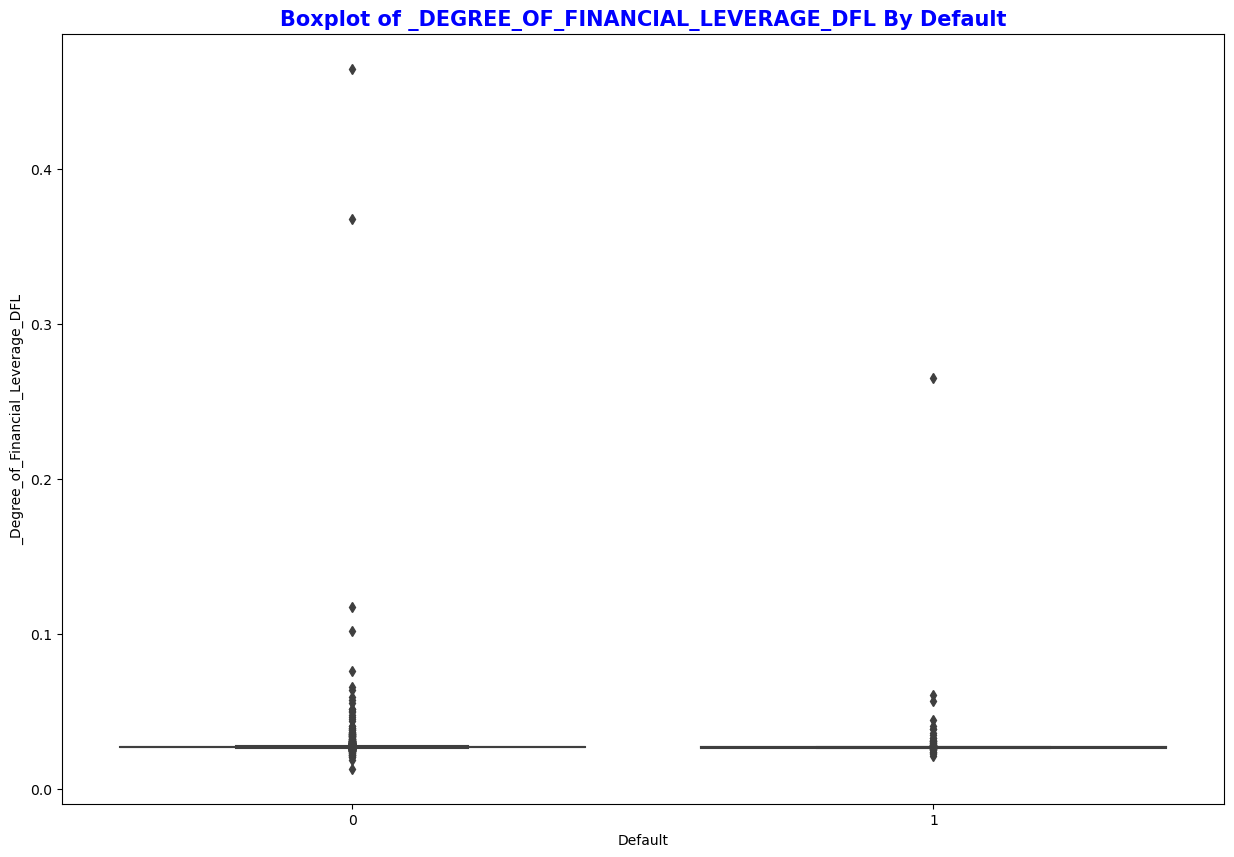

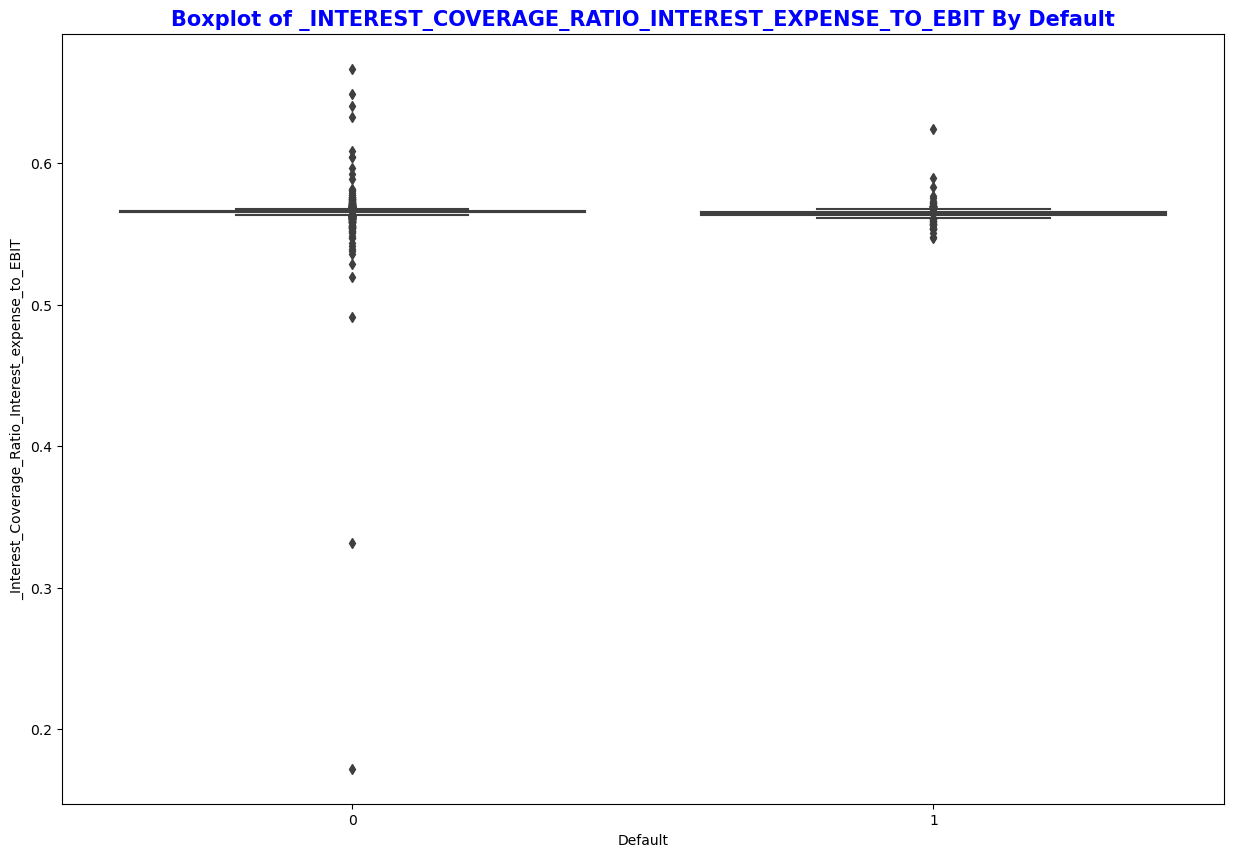

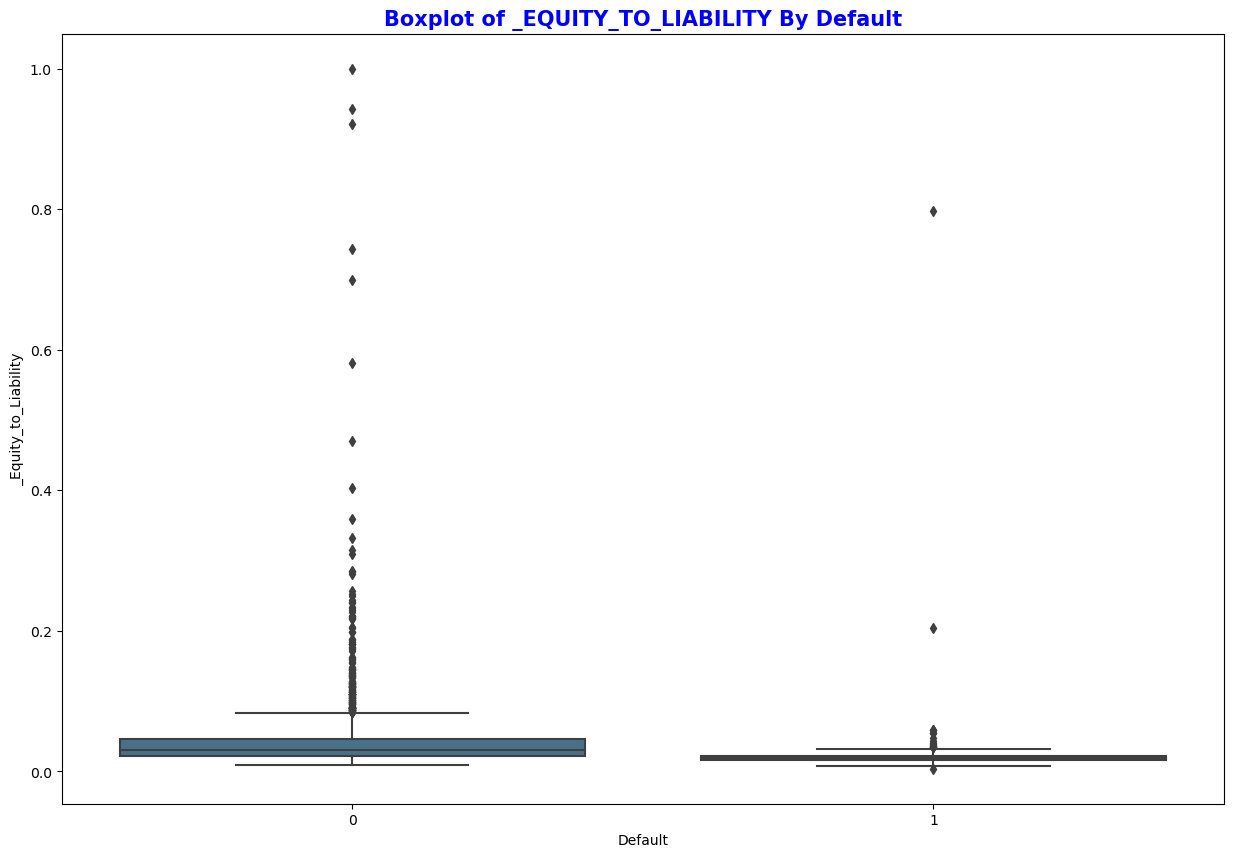

In [127]:
def plot_box_D(Default,num):
    for i in num:
        fig,axes = plt.subplots(figsize = (15,10))
        sns.boxplot(data = Default,x="Default",y=i,saturation = 0.45)
        axes.set_title(f"Boxplot of {i.upper()} By Default",fontsize=15,weight='bold',color="Blue")
plot_box_D(Default,num)

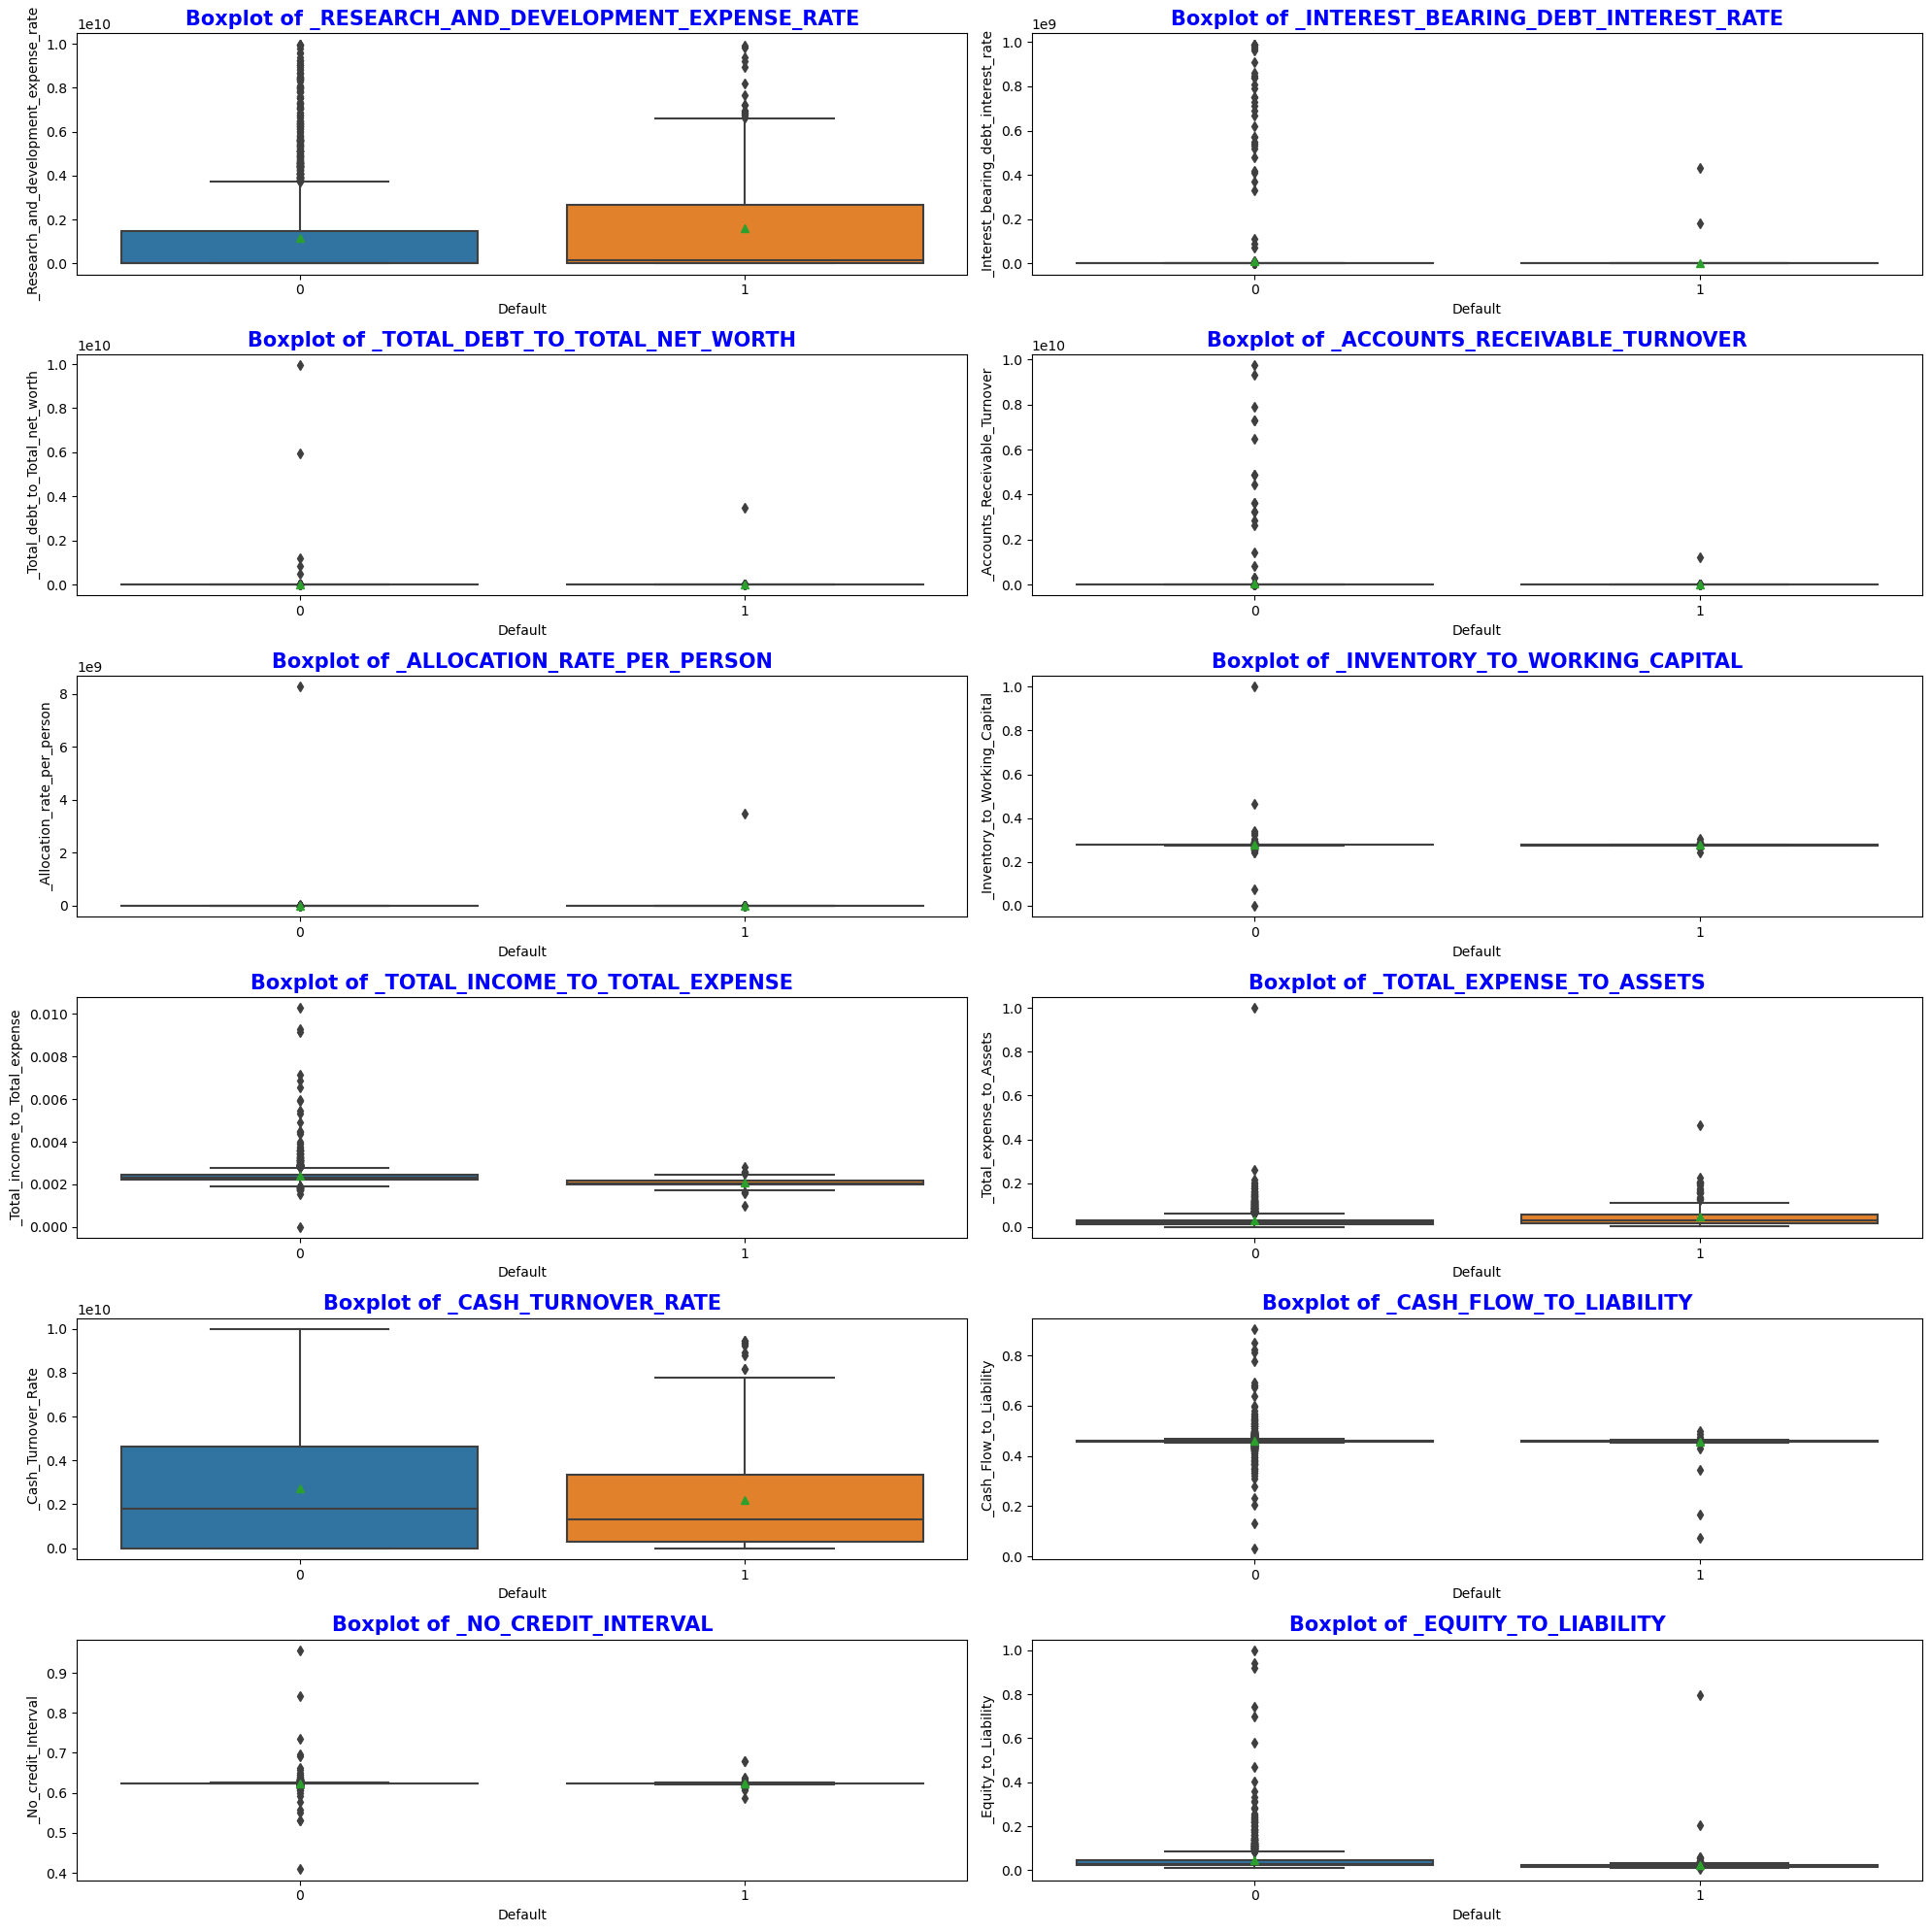

In [22]:
fig,axes = plt.subplots(6,2,figsize=(20,20))
for i,ax in zip(imp_var,axes.flatten()):
    sns.boxplot(data = Default,x="Default",y=i,ax=ax,showmeans=True)
    ax.set_title(f"Boxplot of {i.upper()}",fontsize=15,weight='bold',color="Blue")
    plt.tight_layout()

#### Histogram

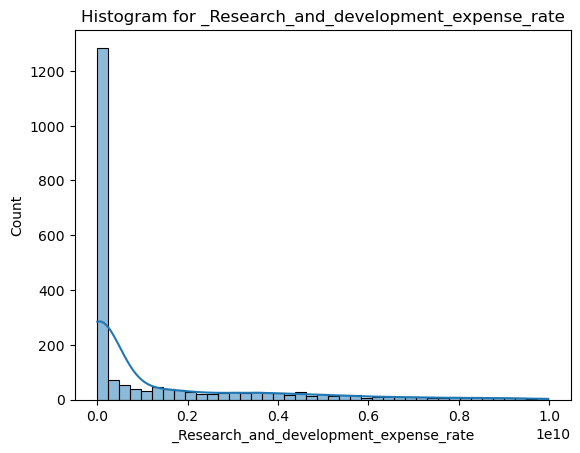

In [23]:
sns.histplot(Default,x='_Research_and_development_expense_rate',kde=True)
plt.title("Histogram for _Research_and_development_expense_rate")
plt.show()

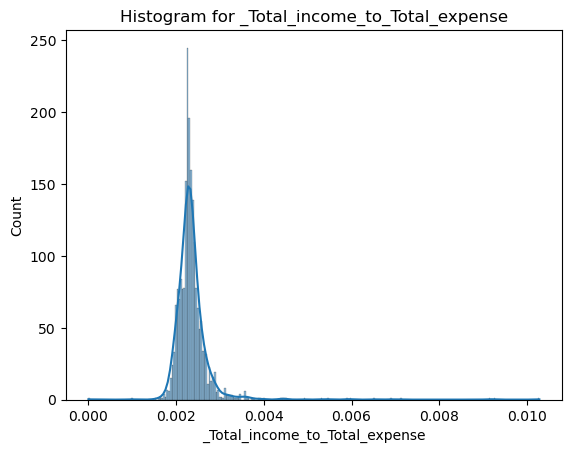

In [24]:
sns.histplot(Default,x='_Total_income_to_Total_expense',kde=True)
plt.title("Histogram for _Total_income_to_Total_expense")
plt.show()

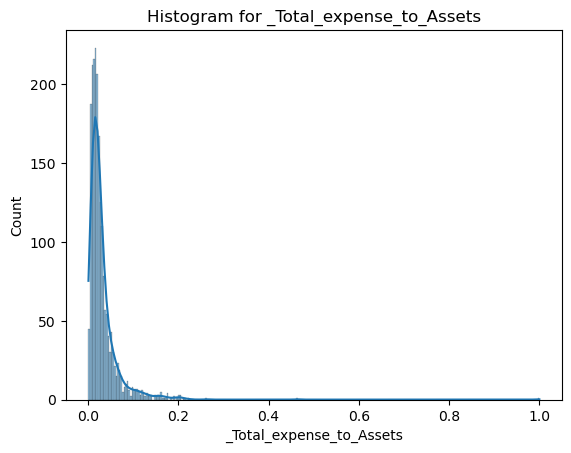

In [25]:
sns.histplot(Default,x='_Total_expense_to_Assets',kde=True)
plt.title("Histogram for _Total_expense_to_Assets")
plt.show()

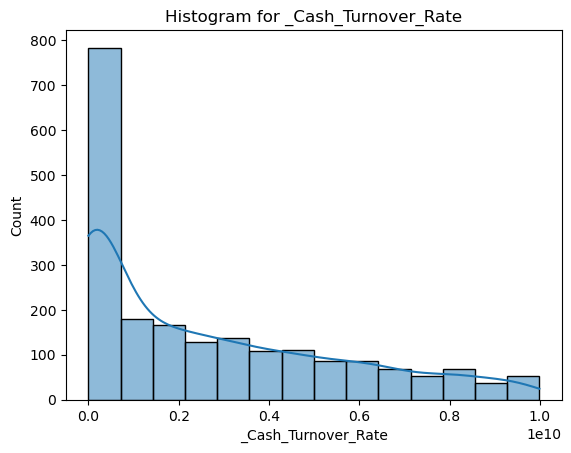

In [26]:
sns.histplot(Default,x='_Cash_Turnover_Rate',kde=True)
plt.title("Histogram for _Cash_Turnover_Rate")
plt.show()

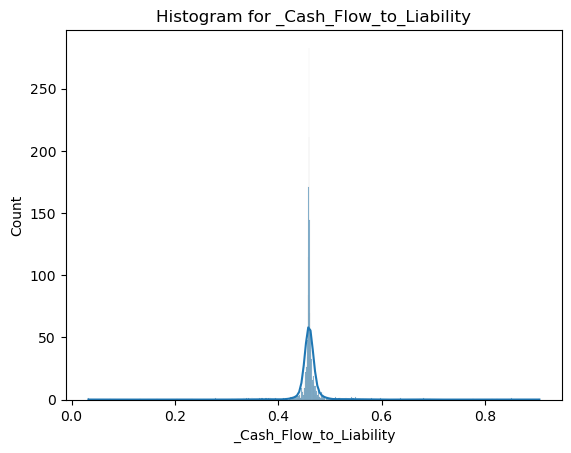

In [27]:
sns.histplot(Default,x='_Cash_Flow_to_Liability',kde=True)
plt.title("Histogram for _Cash_Flow_to_Liability")
plt.show()

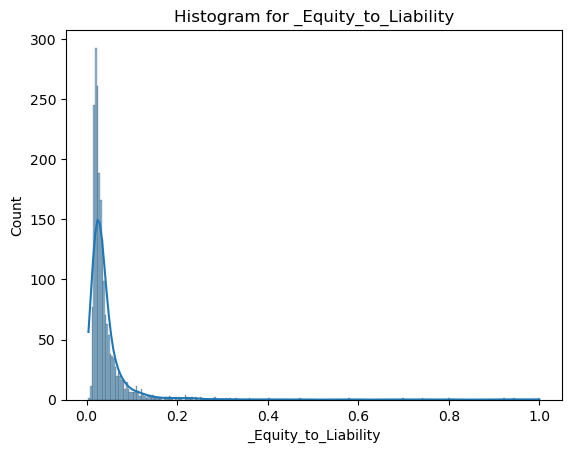

In [28]:
sns.histplot(Default,x='_Equity_to_Liability',kde=True)
plt.title("Histogram for _Equity_to_Liability")
plt.show()

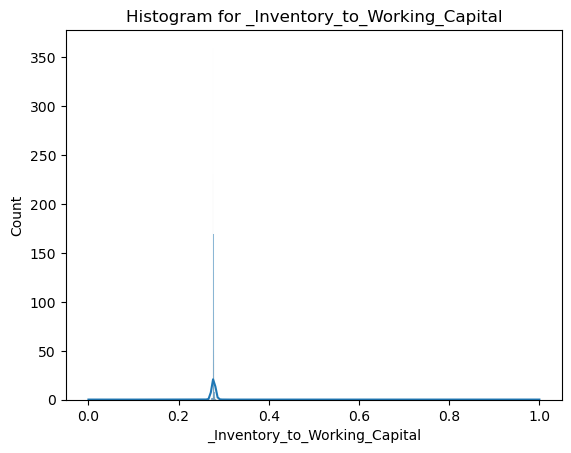

In [29]:
sns.histplot(Default,x='_Inventory_to_Working_Capital',kde=True)
plt.title("Histogram for _Inventory_to_Working_Capital")
plt.show()

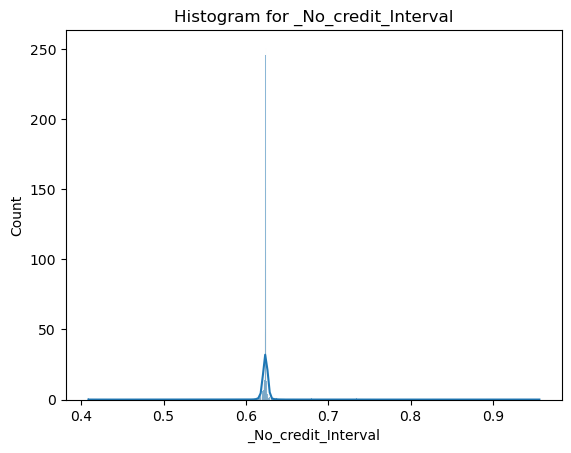

In [30]:
sns.histplot(Default,x='_No_credit_Interval',kde=True)
plt.title("Histogram for _No_credit_Interval")
plt.show()

### Missing Values and Outlier Treatment

In [31]:
Default.isnull().sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                                           0
_Interest_Expense_Ratio                                0
_Total_debt_to_Total_net_worth 

In [32]:
(Default.loc[:, Default.isna().any()].isnull().sum()/len(Default))*100

_Cash_Flow_Per_Share                   8.11
_Total_debt_to_Total_net_worth         1.02
_Cash_to_Total_Assets                  4.66
_Current_Liability_to_Current_Assets   0.68
dtype: float64

more than 30% of the missing values can be removed. here we have only a few.

In [33]:
(Default.isnull().sum().sum()/Default.size)*100

0.268149587877479

* only 0.26% of the data is missing.

In [34]:
Default_num = Default.drop(['Default'], axis = 1)
Default_cat = Default[['Default']]

In [35]:
Q1 = Default_num.quantile(0.25)
Q3 = Default_num.quantile(0.75)
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [36]:
((Default_num > UL)| (Default_num < LL)).sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate               264
_Cash_flow_rate                                      206
_Interest_bearing_debt_interest_rate                  94
_Tax_rate_A                                           42
_Cash_Flow_Per_Share                                 146
_Per_Share_Net_profit_before_tax_Yuan_               186
_Realized_Sales_Gross_Profit_Growth_Rate             283
_Operating_Profit_Growth_Rate                        317
_Continuous_Net_Profit_Growth_Rate                   340
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                               304
_Total_Asset_Return_Growth_Rate_Ratio                226
_Cash_Reinvestment_perc                              220
_Current_Ratio                                       193
_Quick_Ratio                                         190
_Interest_Expense_Ratio                              328
_Total_debt_to_Total_net_worth 

In [37]:
((Default_num > UL)| (Default_num < LL)).sum().sum()

10857

In [38]:
(((Default_num > UL)| (Default_num < LL)).sum().sum()/Default_num.size)*100

9.953792837889873

* 10% of the numerical data are outlier.

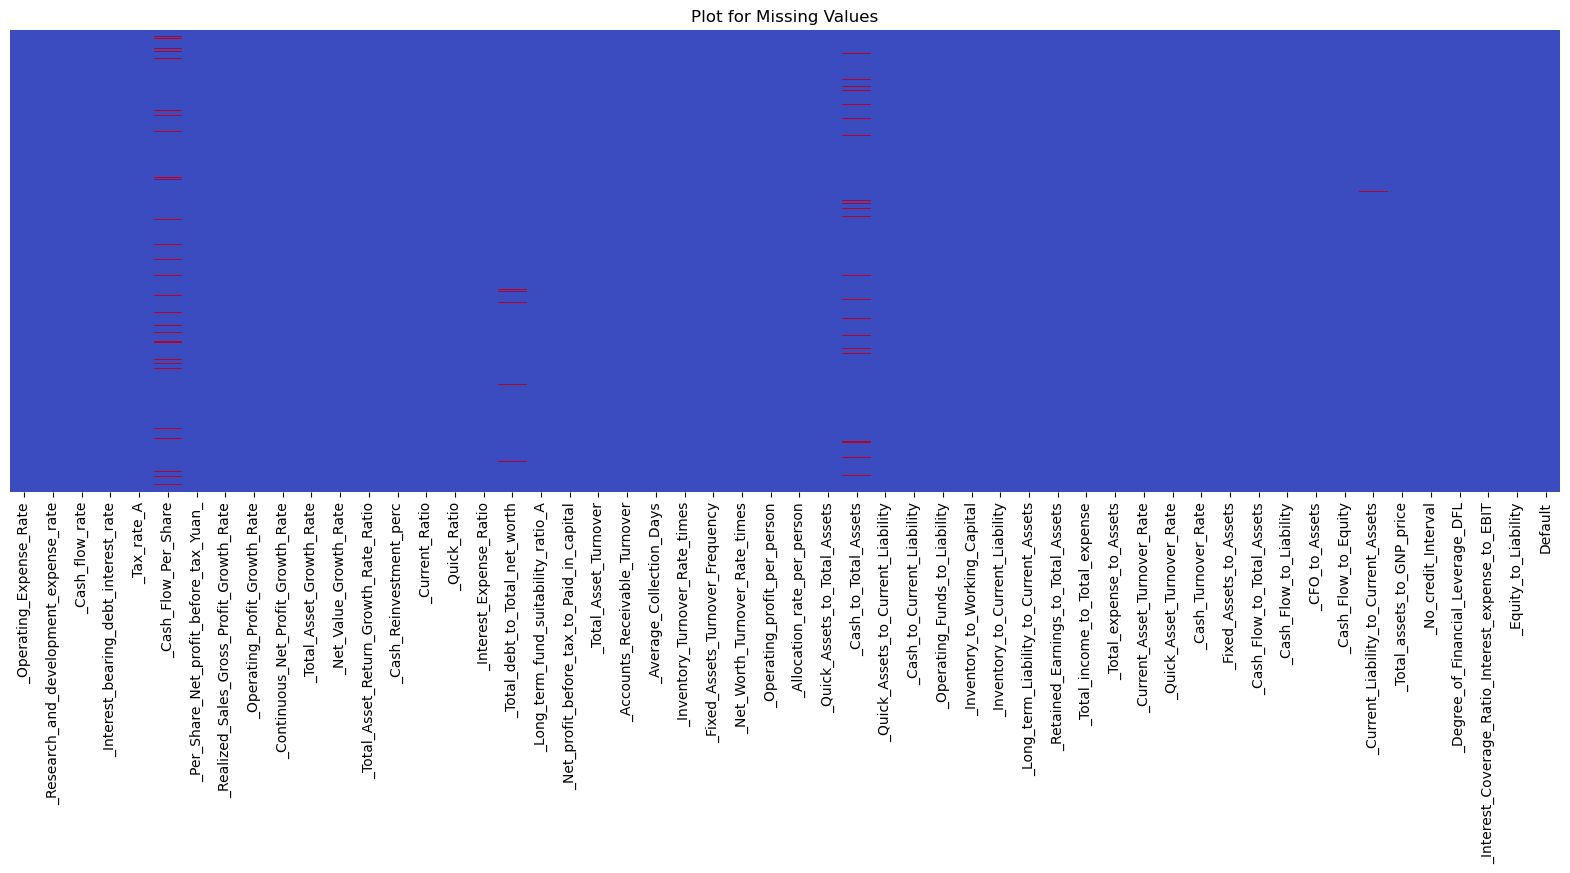

In [39]:
plt.figure(figsize = (20,6))
sns.heatmap(Default.isnull(),cbar=False,cmap='coolwarm',yticklabels=False)
plt.title("Plot for Missing Values")
plt.show()

In [40]:
Default_num[((Default_num > UL)|(Default_num < LL))] = np.nan

* The outliers are imputed with missing values.

In [41]:
Default_sub1 = pd.concat([Default_num,Default_cat],axis=1)

In [42]:
Default_sub1.isnull().sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate               264
_Cash_flow_rate                                      206
_Interest_bearing_debt_interest_rate                  94
_Tax_rate_A                                           42
_Cash_Flow_Per_Share                                 313
_Per_Share_Net_profit_before_tax_Yuan_               186
_Realized_Sales_Gross_Profit_Growth_Rate             283
_Operating_Profit_Growth_Rate                        317
_Continuous_Net_Profit_Growth_Rate                   340
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                               304
_Total_Asset_Return_Growth_Rate_Ratio                226
_Cash_Reinvestment_perc                              220
_Current_Ratio                                       193
_Quick_Ratio                                         190
_Interest_Expense_Ratio                              328
_Total_debt_to_Total_net_worth 

In [43]:
(Default_sub1.isnull().sum().sort_values(ascending = False)/Default_sub1.index.size)*100

_Fixed_Assets_Turnover_Frequency                    24.34
_Current_Asset_Turnover_Rate                        22.55
_Degree_of_Financial_Leverage_DFL                   21.28
_Cash_Flow_to_Liability                             19.78
_No_credit_Interval                                 19.24
_Interest_Coverage_Ratio_Interest_expense_to_EBIT   18.27
_Operating_profit_per_person                        17.35
_Continuous_Net_Profit_Growth_Rate                  16.52
_Interest_Expense_Ratio                             15.94
_Cash_Flow_to_Total_Assets                          15.40
_Operating_Profit_Growth_Rate                       15.40
_Cash_Flow_Per_Share                                15.21
_Cash_Flow_to_Equity                                14.87
_Net_Value_Growth_Rate                              14.77
_Realized_Sales_Gross_Profit_Growth_Rate            13.75
_Accounts_Receivable_Turnover                       13.65
_Research_and_development_expense_rate              12.83
_Cash_to_Total

In [44]:
(Default_sub1.isnull().sum().sum()/Default_sub1.size)*100

10.037612928769391

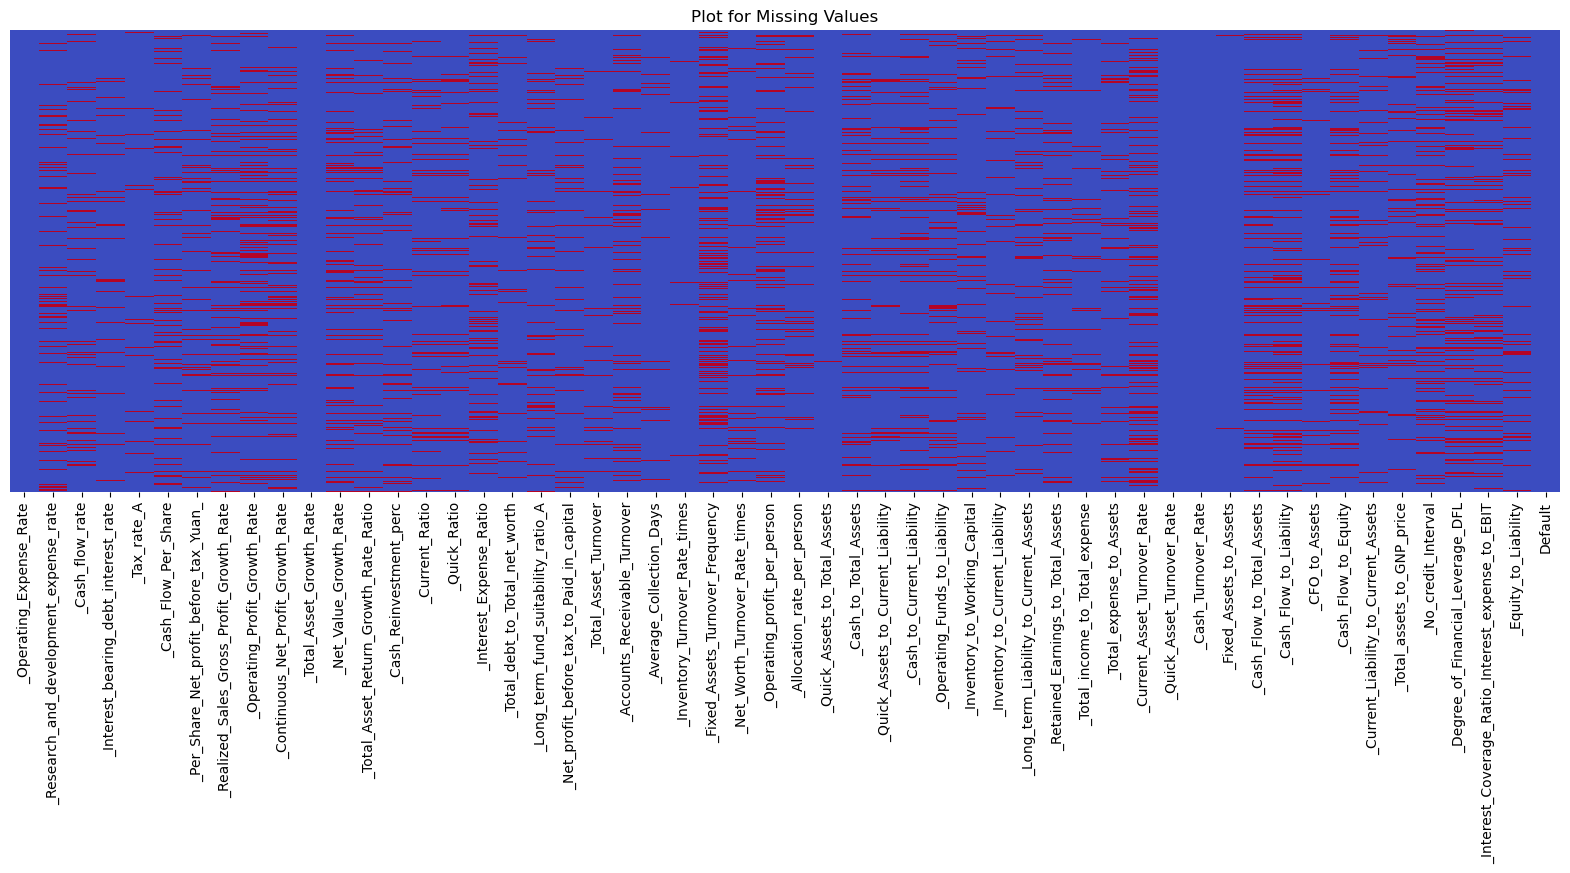

In [45]:
plt.figure(figsize = (20,6))
sns.heatmap(Default_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.title("Plot for Missing Values")
plt.show()

In [46]:
Default_sub1.isnull().sum(axis = 1)

0        5
1        9
2        1
3        6
4        1
        ..
2053    10
2054     4
2055     7
2056     0
2057     5
Length: 2058, dtype: int64

In [47]:
Default_sub2 = Default_sub1[Default_sub1.isnull().sum(axis = 1) <= 5]

In [48]:
Default_sub2.shape

(1175, 54)

In [49]:
Default_sub2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 0 to 2057
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   _Operating_Expense_Rate                            1175 non-null   float64 
 1   _Research_and_development_expense_rate             1034 non-null   float64 
 2   _Cash_flow_rate                                    1149 non-null   float64 
 3   _Interest_bearing_debt_interest_rate               1145 non-null   float64 
 4   _Tax_rate_A                                        1151 non-null   float64 
 5   _Cash_Flow_Per_Share                               1077 non-null   float64 
 6   _Per_Share_Net_profit_before_tax_Yuan_             1146 non-null   float64 
 7   _Realized_Sales_Gross_Profit_Growth_Rate           1103 non-null   float64 
 8   _Operating_Profit_Growth_Rate                      1067 non-null   float64 
 9

In [50]:
((2058-1175)/2058)*100

42.905733722060255

In [51]:
Default_sub2['Default'].value_counts()

0    1088
1      87
Name: Default, dtype: int64

In [52]:
Default_sub2['Default'].value_counts(normalize=True)

0   0.93
1   0.07
Name: Default, dtype: float64

Around half of the rows has been removed in this method and the defaulters data is reduced from 11% to 7%.

After imputing outliers as NaN, the variables are not exceeding the 30% of missing data. so none of the columns will be dropped. They will be imputed through KNN Imputer.

The data has been scaled as each of the financial variables are in its own set of units.

In [53]:
predictors = Default_sub1.drop('Default', axis = 1)
response = Default_sub1['Default']

#### Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [55]:
Default_sub1_sca = pd.concat([scaled_predictors, response], axis = 1)

### Train,Test Split

In [56]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(Default_sub1_sca, test_size = 0.33,random_state=42, stratify = Default_sub1_sca.Default)

In [57]:
Train.shape[0]/Default_sub1_sca.shape[0]

0.6695821185617103

In [58]:
Test.shape[0]/Default_sub1_sca.shape[0]

0.3304178814382896

#### KNN Imputer - Missing values Treatment

In [59]:
from sklearn.impute import KNNImputer

In [60]:
imputer = KNNImputer(n_neighbors=5)

In [61]:
Default_imputed_train = pd.DataFrame(imputer.fit_transform(Train), columns = Train.columns)
Default_imputed_test = pd.DataFrame(imputer.transform(Test), columns = Test.columns)

In [62]:
print(Default_imputed_train.isnull().sum().sum())
print(Default_imputed_test.isnull().sum().sum())

0
0


In [63]:
Default_imputed = pd.concat([Default_imputed_train,Default_imputed_test],axis=0)

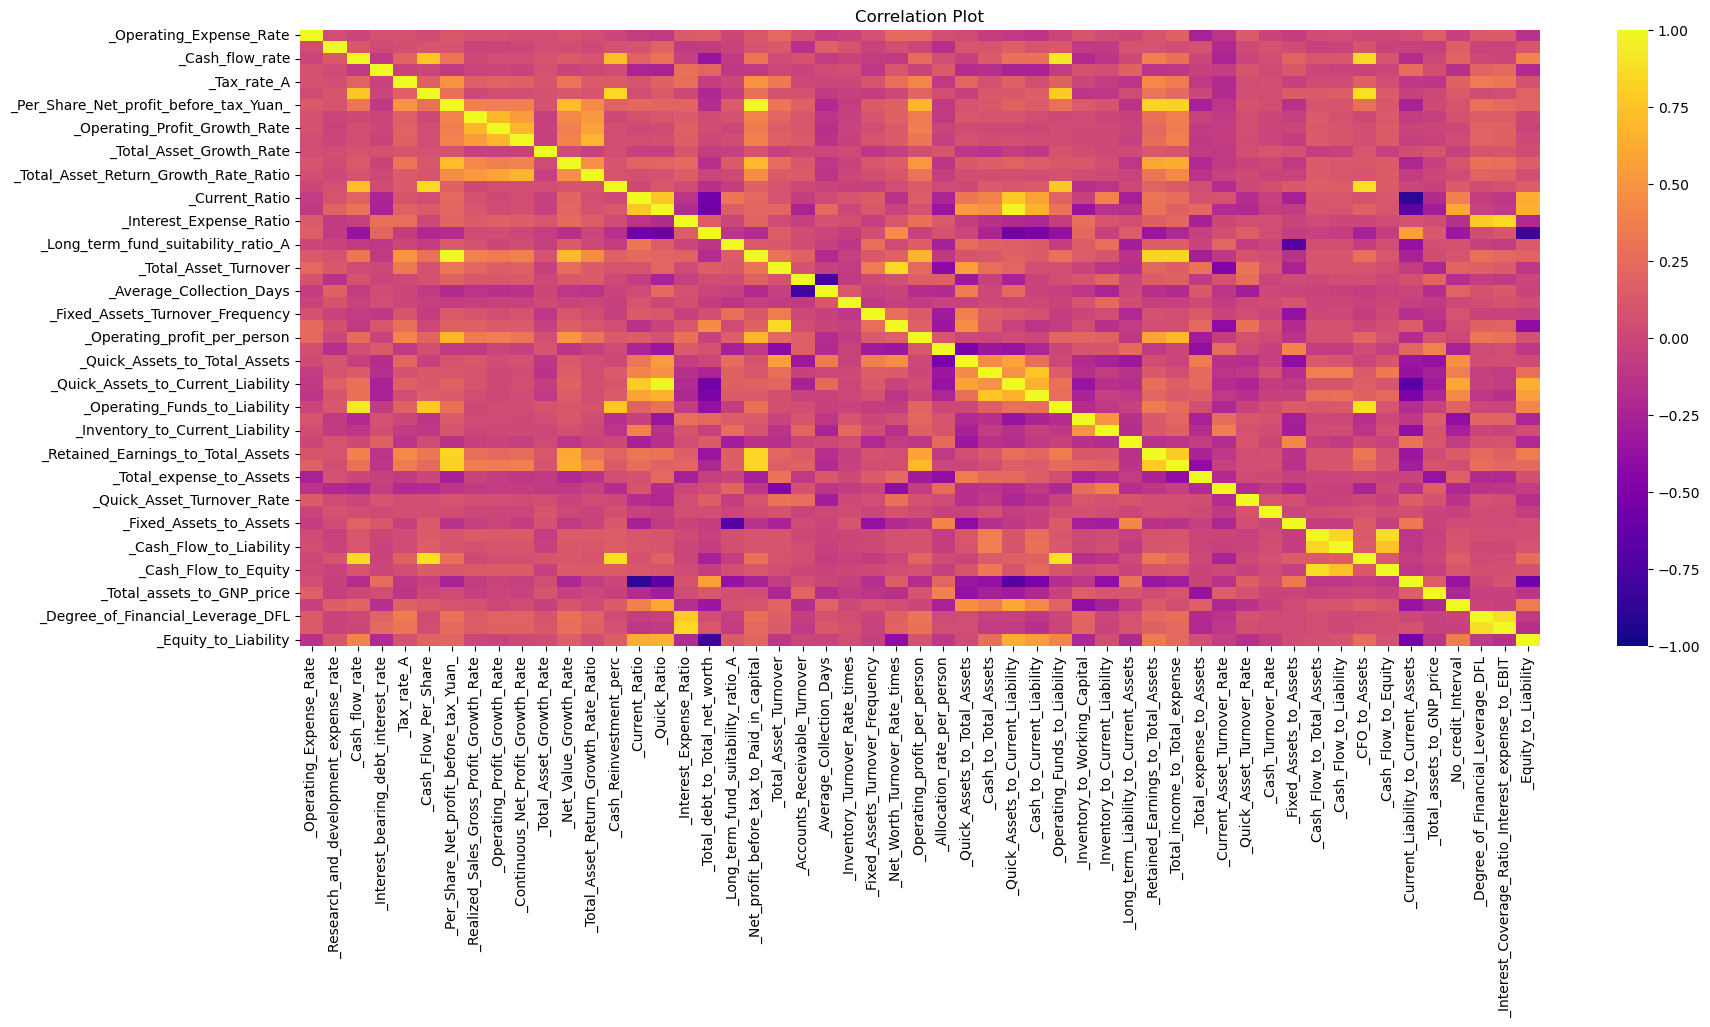

In [64]:
plt.figure(figsize = (20,8))
cor_matrix = Default_imputed.drop('Default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)
plt.title("Correlation Plot")
plt.show()

### Logistic Regression

In [65]:
import statsmodels.formula.api as SM

In [66]:
cols = Default_imputed.drop('Default', axis = 1).columns
cols_str = " + ".join(cols)
print('Independent variables:',cols_str)

model_1 = SM.logit(formula =f"Default ~ {cols_str}", data=Default_imputed).fit()

Independent variables: _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Per_Share_Net_profit_before_tax_Yuan_ + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Net_Value_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc + _Current_Ratio + _Quick_Ratio + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Net_profit_before_tax_to_Paid_in_capital + _Total_Asset_Turnover + _Accounts_Receivable_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Net_Worth_Turnover_Rate_times + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Quick_Assets_to_Current_Liability + _Cash_to_Current_Liability + _Oper

In [67]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2004
Method:                           MLE   Df Model:                           53
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                  0.4424
Time:                        17:03:53   Log-Likelihood:                -390.13
converged:                       True   LL-Null:                       -699.69
Covariance Type:            nonrobust   LLR p-value:                 1.649e-97
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            -3.9226      0.228    -17.170      0.000      -4.370      -3.475
_Operating_Expense_Rate                               0.0835      0.110      0.759      0.448      -0.132       0.299
_Research_and_development_expense_rate                0.2460      0.104      2.359      0.018       0.042       0.450
_Cash_flow_rate                                      -0.2125      0.342     -0.621      0.535      -0.883       0.458
_Interest_bearing_debt_interest_rate                  0.1866      0.117      1.589      0.112      -0.044       0.417
_Tax_rate_A                                          -0.2364      0.161     -1.465      0.143      -0.552       0.080
_Cash_Flow_Per_Share                                 -0.0743      0.228     -0.326      0.744      -0.520       0.372
_Per_Share_Net_profit_before_tax_Yuan_               -0.5716      0.657     -0.870      0.385      -1.860       0.717
_Realized_Sales_Gross_Profit_Growth_Rate              0.0602      0.120      0.502      0.616      -0.175       0.295
_Operating_Profit_Growth_Rate                        -0.1335      0.140     -0.956      0.339      -0.407       0.140
_Continuous_Net_Profit_Growth_Rate                   -0.1249      0.142     -0.877      0.380      -0.404       0.154
_Total_Asset_Growth_Rate                             -0.0992      0.110     -0.903      0.367      -0.314       0.116
_Net_Value_Growth_Rate                               -0.1324      0.145     -0.915      0.360      -0.416       0.151
_Total_Asset_Return_Growth_Rate_Ratio                 0.2115      0.138      1.529      0.126      -0.060       0.483
_Cash_Reinvestment_perc                              -0.2492      0.218     -1.146      0.252      -0.675       0.177
_Current_Ratio                                       -0.1364      0.564     -0.242      0.809      -1.241       0.969
_Quick_Ratio                                         -1.6857      0.445     -3.791      0.000      -2.557      -0.814
_Interest_Expense_Ratio                              -0.0171      0.181     -0.095      0.925      -0.373       0.338
_Total_debt_to_Total_net_worth                        0.4041      0.178      2.274      0.023       0.056       0.752
_Long_term_fund_suitability_ratio_A                  -0.0513      0.153     -0.335      0.738      -0.352       0.249
_Net_profit_before_tax_to_Paid_in_capital             0.4879      0.677      0.721      0.471      -0.839       1.815
_Total_Asset_Turnover                                -0.3991      0.256     -1.559      0.119      -0.901       0.103
_Accounts_Receivable_Turnover                        -0.3274      0.185     -1.765      0.078      -0.691       0.036
_Average_Collection_Days                              0.2303      0.169      1.363      0.173      -0.101       0.561
_Inventory_Turnover_Rate_times                        0

#### VIF

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display

In [69]:
X = Default_imputed.drop('Default', axis = 1)
VIF_thres = 5

while True:
    Cols = range(X.shape[1])
    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = np.array([variance_inflation_factor(X.values, i) for i in Cols])
    vif_order = vif.sort_values(by = 'VIF', ascending = False)
    print('count of variables:',vif.shape[0])
    display(vif_order)
    print('-------------------------------------------------------------------')
    if all(vif["VIF"] < VIF_thres):
        break
    else:
        Cols = np.delete(Cols,np.argmax(vif["VIF"]))
        X = X.iloc[:,Cols]

count of variables: 53


variables   VIF
19          _Net_profit_before_tax_to_Paid_in_capital 43.52
6              _Per_Share_Net_profit_before_tax_Yuan_ 43.06
30                 _Quick_Assets_to_Current_Liability 37.72
15                                       _Quick_Ratio 25.48
45                                     _CFO_to_Assets 11.89
14                                     _Current_Ratio 11.75
32                      _Operating_Funds_to_Liability 10.73
2                                     _Cash_flow_rate  8.91
20                              _Total_Asset_Turnover  7.63
43                         _Cash_Flow_to_Total_Assets  6.99
25                     _Net_Worth_Turnover_Rate_times  6.82
51  _Interest_Coverage_Ratio_Interest_expense_to_EBIT  6.76
28                      _Quick_Assets_to_Total_Assets  6.21
13                            _Cash_Reinvestment_perc  5.90
47               _Current_Liability_to_Current_Assets  5.78
5                                _Cash_Flow_Per_Share  5.37
50                  _Degree_of_Financial_Leverage_DFL  5.05
52                               _Equity_to_Liability  4.93
46                               _Cash_Flow_to_Equity  4.72
37                     _Total_income_to_Total_expense  4.70
31                         _Cash_to_Current_Liability  4.67
16                            _Interest_Expense_Ratio  4.51
36                 _Retained_Earnings_to_Total_Assets  4.36
17                     _Total_debt_to_Total_net_worth  4.23
34                    _Inventory_to_Current_Liability  4.17
29                              _Cash_to_Total_Assets  3.59
44                            _Cash_Flow_to_Liability  3.54
42                            _Fixed_Assets_to_Assets  3.46
22                           _Average_Collection_Days  3.20
21                      _Accounts_Receivable_Turnover  2.87
8                       _Operating_Profit_Growth_Rate  2.73
26                       _Operating_profit_per_person  2.66
11                             _Net_Value_Growth_Rate  2.50
9                  _Continuous_Net_Profit_Growth_Rate  2.45
18                _Long_term_fund_suitability_ratio_A  2.27
39                       _Current_Asset_Turnover_Rate  2.25
12              _Total_Asset_Return_Growth_Rate_Ratio  2.22
7            _Realized_Sales_Gross_Profit_Growth_Rate  2.19
27                        _Allocation_rate_per_person  2.13
38                           _Total_expense_to_Assets  2.05
33                      _Inventory_to_Working_Capital  2.04
49                                _No_credit_Interval  1.98
4                                         _Tax_rate_A  1.72
35             _Long_term_Liability_to_Current_Assets  1.62
48                         _Total_assets_to_GNP_price  1.53
40                         _Quick_Asset_Turnover_Rate  1.43
24                   _Fixed_Assets_Turnover_Frequency  1.42
3                _Interest_bearing_debt_interest_rate  1.31
0                             _Operating_Expense_Rate  1.30
23                     _Inventory_Turnover_Rate_times  1.27
1              _Research_and_development_expense_rate  1.19
10                           _Total_Asset_Growth_Rate  1.11
41                                _Cash_Turnover_Rate  1.09

-------------------------------------------------------------------
count of variables: 52


variables   VIF
29                 _Quick_Assets_to_Current_Liability 37.71
15                                       _Quick_Ratio 25.48
44                                     _CFO_to_Assets 11.88
14                                     _Current_Ratio 11.75
31                      _Operating_Funds_to_Liability 10.73
2                                     _Cash_flow_rate  8.91
19                              _Total_Asset_Turnover  7.63
42                         _Cash_Flow_to_Total_Assets  6.98
24                     _Net_Worth_Turnover_Rate_times  6.81
50  _Interest_Coverage_Ratio_Interest_expense_to_EBIT  6.76
6              _Per_Share_Net_profit_before_tax_Yuan_  6.46
27                      _Quick_Assets_to_Total_Assets  6.20
13                            _Cash_Reinvestment_perc  5.90
46               _Current_Liability_to_Current_Assets  5.78
5                                _Cash_Flow_Per_Share  5.37
49                  _Degree_of_Financial_Leverage_DFL  5.05
51                               _Equity_to_Liability  4.92
45                               _Cash_Flow_to_Equity  4.72
30                         _Cash_to_Current_Liability  4.67
36                     _Total_income_to_Total_expense  4.66
16                            _Interest_Expense_Ratio  4.50
35                 _Retained_Earnings_to_Total_Assets  4.33
17                     _Total_debt_to_Total_net_worth  4.22
33                    _Inventory_to_Current_Liability  4.17
28                              _Cash_to_Total_Assets  3.59
43                            _Cash_Flow_to_Liability  3.52
41                            _Fixed_Assets_to_Assets  3.46
21                           _Average_Collection_Days  3.20
20                      _Accounts_Receivable_Turnover  2.87
8                       _Operating_Profit_Growth_Rate  2.73
25                       _Operating_profit_per_person  2.66
11                             _Net_Value_Growth_Rate  2.49
9                  _Continuous_Net_Profit_Growth_Rate  2.45
18                _Long_term_fund_suitability_ratio_A  2.26
38                       _Current_Asset_Turnover_Rate  2.25
12              _Total_Asset_Return_Growth_Rate_Ratio  2.21
7            _Realized_Sales_Gross_Profit_Growth_Rate  2.19
26                        _Allocation_rate_per_person  2.13
37                           _Total_expense_to_Assets  2.05
32                      _Inventory_to_Working_Capital  2.04
48                                _No_credit_Interval  1.98
4                                         _Tax_rate_A  1.70
34             _Long_term_Liability_to_Current_Assets  1.62
47                         _Total_assets_to_GNP_price  1.53
39                         _Quick_Asset_Turnover_Rate  1.42
23                   _Fixed_Assets_Turnover_Frequency  1.41
3                _Interest_bearing_debt_interest_rate  1.30
0                             _Operating_Expense_Rate  1.30
22                     _Inventory_Turnover_Rate_times  1.27
1              _Research_and_development_expense_rate  1.19
10                           _Total_Asset_Growth_Rate  1.11
40                                _Cash_Turnover_Rate  1.09

-------------------------------------------------------------------
count of variables: 51


variables   VIF
43                                     _CFO_to_Assets 11.83
30                      _Operating_Funds_to_Liability 10.71
14                                     _Current_Ratio  9.62
2                                     _Cash_flow_rate  8.91
15                                       _Quick_Ratio  8.41
19                              _Total_Asset_Turnover  7.52
41                         _Cash_Flow_to_Total_Assets  6.98
24                     _Net_Worth_Turnover_Rate_times  6.80
49  _Interest_Coverage_Ratio_Interest_expense_to_EBIT  6.75
6              _Per_Share_Net_profit_before_tax_Yuan_  6.46
13                            _Cash_Reinvestment_perc  5.90
45               _Current_Liability_to_Current_Assets  5.77
27                      _Quick_Assets_to_Total_Assets  5.64
5                                _Cash_Flow_Per_Share  5.37
48                  _Degree_of_Financial_Leverage_DFL  5.05
50                               _Equity_to_Liability  4.85
44                               _Cash_Flow_to_Equity  4.71
35                     _Total_income_to_Total_expense  4.65
29                         _Cash_to_Current_Liability  4.60
16                            _Interest_Expense_Ratio  4.50
34                 _Retained_Earnings_to_Total_Assets  4.33
17                     _Total_debt_to_Total_net_worth  4.21
32                    _Inventory_to_Current_Liability  3.79
28                              _Cash_to_Total_Assets  3.57
42                            _Cash_Flow_to_Liability  3.51
40                            _Fixed_Assets_to_Assets  3.44
21                           _Average_Collection_Days  3.20
20                      _Accounts_Receivable_Turnover  2.86
8                       _Operating_Profit_Growth_Rate  2.73
25                       _Operating_profit_per_person  2.64
11                             _Net_Value_Growth_Rate  2.49
9                  _Continuous_Net_Profit_Growth_Rate  2.45
18                _Long_term_fund_suitability_ratio_A  2.26
37                       _Current_Asset_Turnover_Rate  2.24
12              _Total_Asset_Return_Growth_Rate_Ratio  2.21
7            _Realized_Sales_Gross_Profit_Growth_Rate  2.19
26                        _Allocation_rate_per_person  2.12
36                           _Total_expense_to_Assets  2.05
31                      _Inventory_to_Working_Capital  2.04
47                                _No_credit_Interval  1.97
4                                         _Tax_rate_A  1.70
33             _Long_term_Liability_to_Current_Assets  1.62
46                         _Total_assets_to_GNP_price  1.52
38                         _Quick_Asset_Turnover_Rate  1.42
23                   _Fixed_Assets_Turnover_Frequency  1.41
0                             _Operating_Expense_Rate  1.30
3                _Interest_bearing_debt_interest_rate  1.29
22                     _Inventory_Turnover_Rate_times  1.27
1              _Research_and_development_expense_rate  1.18
10                           _Total_Asset_Growth_Rate  1.11
39                                _Cash_Turnover_Rate  1.09

-------------------------------------------------------------------
count of variables: 50


variables  VIF
14                                     _Current_Ratio 9.61
30                      _Operating_Funds_to_Liability 9.54
2                                     _Cash_flow_rate 8.71
15                                       _Quick_Ratio 8.40
19                              _Total_Asset_Turnover 7.51
41                         _Cash_Flow_to_Total_Assets 6.98
24                     _Net_Worth_Turnover_Rate_times 6.78
48  _Interest_Coverage_Ratio_Interest_expense_to_EBIT 6.74
6              _Per_Share_Net_profit_before_tax_Yuan_ 6.46
44               _Current_Liability_to_Current_Assets 5.77
27                      _Quick_Assets_to_Total_Assets 5.64
47                  _Degree_of_Financial_Leverage_DFL 5.05
49                               _Equity_to_Liability 4.85
43                               _Cash_Flow_to_Equity 4.71
5                                _Cash_Flow_Per_Share 4.69
35                     _Total_income_to_Total_expense 4.65
29                         _Cash_to_Current_Liability 4.58
13                            _Cash_Reinvestment_perc 4.51
16                            _Interest_Expense_Ratio 4.50
34                 _Retained_Earnings_to_Total_Assets 4.32
17                     _Total_debt_to_Total_net_worth 4.18
32                    _Inventory_to_Current_Liability 3.79
28                              _Cash_to_Total_Assets 3.55
42                            _Cash_Flow_to_Liability 3.51
40                            _Fixed_Assets_to_Assets 3.44
21                           _Average_Collection_Days 3.20
20                      _Accounts_Receivable_Turnover 2.86
8                       _Operating_Profit_Growth_Rate 2.73
25                       _Operating_profit_per_person 2.64
11                             _Net_Value_Growth_Rate 2.49
9                  _Continuous_Net_Profit_Growth_Rate 2.45
18                _Long_term_fund_suitability_ratio_A 2.26
37                       _Current_Asset_Turnover_Rate 2.23
12              _Total_Asset_Return_Growth_Rate_Ratio 2.21
7            _Realized_Sales_Gross_Profit_Growth_Rate 2.18
26                        _Allocation_rate_per_person 2.12
36                           _Total_expense_to_Assets 2.05
31                      _Inventory_to_Working_Capital 2.04
46                                _No_credit_Interval 1.97
4                                         _Tax_rate_A 1.70
33             _Long_term_Liability_to_Current_Assets 1.61
45                         _Total_assets_to_GNP_price 1.52
38                         _Quick_Asset_Turnover_Rate 1.42
23                   _Fixed_Assets_Turnover_Frequency 1.41
0                             _Operating_Expense_Rate 1.30
3                _Interest_bearing_debt_interest_rate 1.29
22                     _Inventory_Turnover_Rate_times 1.27
1              _Research_and_development_expense_rate 1.18
10                           _Total_Asset_Growth_Rate 1.10
39                                _Cash_Turnover_Rate 1.09

-------------------------------------------------------------------
count of variables: 49


variables  VIF
29                      _Operating_Funds_to_Liability 9.54
2                                     _Cash_flow_rate 8.71
18                              _Total_Asset_Turnover 7.50
40                         _Cash_Flow_to_Total_Assets 6.97
23                     _Net_Worth_Turnover_Rate_times 6.75
47  _Interest_Coverage_Ratio_Interest_expense_to_EBIT 6.74
6              _Per_Share_Net_profit_before_tax_Yuan_ 6.46
14                                       _Quick_Ratio 5.90
26                      _Quick_Assets_to_Total_Assets 5.64
46                  _Degree_of_Financial_Leverage_DFL 5.04
42                               _Cash_Flow_to_Equity 4.71
48                               _Equity_to_Liability 4.70
5                                _Cash_Flow_Per_Share 4.69
34                     _Total_income_to_Total_expense 4.65
28                         _Cash_to_Current_Liability 4.56
13                            _Cash_Reinvestment_perc 4.51
15                            _Interest_Expense_Ratio 4.49
43               _Current_Liability_to_Current_Assets 4.46
33                 _Retained_Earnings_to_Total_Assets 4.31
16                     _Total_debt_to_Total_net_worth 4.17
27                              _Cash_to_Total_Assets 3.55
41                            _Cash_Flow_to_Liability 3.51
39                            _Fixed_Assets_to_Assets 3.44
20                           _Average_Collection_Days 3.20
19                      _Accounts_Receivable_Turnover 2.86
31                    _Inventory_to_Current_Liability 2.85
8                       _Operating_Profit_Growth_Rate 2.72
24                       _Operating_profit_per_person 2.64
11                             _Net_Value_Growth_Rate 2.49
9                  _Continuous_Net_Profit_Growth_Rate 2.45
17                _Long_term_fund_suitability_ratio_A 2.26
36                       _Current_Asset_Turnover_Rate 2.23
12              _Total_Asset_Return_Growth_Rate_Ratio 2.21
7            _Realized_Sales_Gross_Profit_Growth_Rate 2.18
25                        _Allocation_rate_per_person 2.12
35                           _Total_expense_to_Assets 2.05
30                      _Inventory_to_Working_Capital 2.01
45                                _No_credit_Interval 1.96
4                                         _Tax_rate_A 1.70
32             _Long_term_Liability_to_Current_Assets 1.61
44                         _Total_assets_to_GNP_price 1.52
37                         _Quick_Asset_Turnover_Rate 1.42
22                   _Fixed_Assets_Turnover_Frequency 1.41
0                             _Operating_Expense_Rate 1.30
3                _Interest_bearing_debt_interest_rate 1.29
21                     _Inventory_Turnover_Rate_times 1.27
1              _Research_and_development_expense_rate 1.18
10                           _Total_Asset_Growth_Rate 1.10
38                                _Cash_Turnover_Rate 1.08

-------------------------------------------------------------------
count of variables: 48


variables  VIF
18                              _Total_Asset_Turnover 7.48
39                         _Cash_Flow_to_Total_Assets 6.96
23                     _Net_Worth_Turnover_Rate_times 6.75
46  _Interest_Coverage_Ratio_Interest_expense_to_EBIT 6.74
6              _Per_Share_Net_profit_before_tax_Yuan_ 6.45
14                                       _Quick_Ratio 5.89
26                      _Quick_Assets_to_Total_Assets 5.62
45                  _Degree_of_Financial_Leverage_DFL 5.04
41                               _Cash_Flow_to_Equity 4.69
33                     _Total_income_to_Total_expense 4.65
5                                _Cash_Flow_Per_Share 4.64
47                               _Equity_to_Liability 4.60
28                         _Cash_to_Current_Liability 4.56
15                            _Interest_Expense_Ratio 4.48
42               _Current_Liability_to_Current_Assets 4.45
32                 _Retained_Earnings_to_Total_Assets 4.31
13                            _Cash_Reinvestment_perc 4.26
16                     _Total_debt_to_Total_net_worth 4.15
27                              _Cash_to_Total_Assets 3.55
2                                     _Cash_flow_rate 3.54
40                            _Cash_Flow_to_Liability 3.51
38                            _Fixed_Assets_to_Assets 3.44
20                           _Average_Collection_Days 3.20
19                      _Accounts_Receivable_Turnover 2.86
30                    _Inventory_to_Current_Liability 2.85
8                       _Operating_Profit_Growth_Rate 2.72
24                       _Operating_profit_per_person 2.63
11                             _Net_Value_Growth_Rate 2.48
9                  _Continuous_Net_Profit_Growth_Rate 2.45
17                _Long_term_fund_suitability_ratio_A 2.26
35                       _Current_Asset_Turnover_Rate 2.22
12              _Total_Asset_Return_Growth_Rate_Ratio 2.21
7            _Realized_Sales_Gross_Profit_Growth_Rate 2.18
25                        _Allocation_rate_per_person 2.12
34                           _Total_expense_to_Assets 2.04
29                      _Inventory_to_Working_Capital 2.00
44                                _No_credit_Interval 1.95
4                                         _Tax_rate_A 1.70
31             _Long_term_Liability_to_Current_Assets 1.61
43                         _Total_assets_to_GNP_price 1.52
36                         _Quick_Asset_Turnover_Rate 1.42
22                   _Fixed_Assets_Turnover_Frequency 1.41
0                             _Operating_Expense_Rate 1.30
3                _Interest_bearing_debt_interest_rate 1.29
21                     _Inventory_Turnover_Rate_times 1.27
1              _Research_and_development_expense_rate 1.18
10                           _Total_Asset_Growth_Rate 1.10
37                                _Cash_Turnover_Rate 1.08

-------------------------------------------------------------------
count of variables: 47


variables  VIF
38                         _Cash_Flow_to_Total_Assets 6.94
45  _Interest_Coverage_Ratio_Interest_expense_to_EBIT 6.74
6              _Per_Share_Net_profit_before_tax_Yuan_ 6.43
14                                       _Quick_Ratio 5.86
25                      _Quick_Assets_to_Total_Assets 5.35
44                  _Degree_of_Financial_Leverage_DFL 5.03
40                               _Cash_Flow_to_Equity 4.67
32                     _Total_income_to_Total_expense 4.63
5                                _Cash_Flow_Per_Share 4.63
46                               _Equity_to_Liability 4.60
27                         _Cash_to_Current_Liability 4.52
15                            _Interest_Expense_Ratio 4.46
41               _Current_Liability_to_Current_Assets 4.45
31                 _Retained_Earnings_to_Total_Assets 4.29
13                            _Cash_Reinvestment_perc 4.25
16                     _Total_debt_to_Total_net_worth 4.04
2                                     _Cash_flow_rate 3.54
26                              _Cash_to_Total_Assets 3.54
39                            _Cash_Flow_to_Liability 3.51
37                            _Fixed_Assets_to_Assets 3.44
22                     _Net_Worth_Turnover_Rate_times 3.37
19                           _Average_Collection_Days 3.17
18                      _Accounts_Receivable_Turnover 2.85
29                    _Inventory_to_Current_Liability 2.83
8                       _Operating_Profit_Growth_Rate 2.72
23                       _Operating_profit_per_person 2.63
11                             _Net_Value_Growth_Rate 2.48
9                  _Continuous_Net_Profit_Growth_Rate 2.45
17                _Long_term_fund_suitability_ratio_A 2.25
12              _Total_Asset_Return_Growth_Rate_Ratio 2.21
7            _Realized_Sales_Gross_Profit_Growth_Rate 2.18
24                        _Allocation_rate_per_person 2.12
34                       _Current_Asset_Turnover_Rate 2.08
33                           _Total_expense_to_Assets 2.01
28                      _Inventory_to_Working_Capital 2.00
43                                _No_credit_Interval 1.95
4                                         _Tax_rate_A 1.69
30             _Long_term_Liability_to_Current_Assets 1.61
42                         _Total_assets_to_GNP_price 1.52
21                   _Fixed_Assets_Turnover_Frequency 1.38
35                         _Quick_Asset_Turnover_Rate 1.35
3                _Interest_bearing_debt_interest_rate 1.29
0                             _Operating_Expense_Rate 1.28
20                     _Inventory_Turnover_Rate_times 1.26
1              _Research_and_development_expense_rate 1.18
10                           _Total_Asset_Growth_Rate 1.10
36                                _Cash_Turnover_Rate 1.08

-------------------------------------------------------------------
count of variables: 46


variables  VIF
44  _Interest_Coverage_Ratio_Interest_expense_to_EBIT 6.74
6              _Per_Share_Net_profit_before_tax_Yuan_ 6.42
14                                       _Quick_Ratio 5.86
25                      _Quick_Assets_to_Total_Assets 5.33
43                  _Degree_of_Financial_Leverage_DFL 5.03
32                     _Total_income_to_Total_expense 4.63
5                                _Cash_Flow_Per_Share 4.63
45                               _Equity_to_Liability 4.60
27                         _Cash_to_Current_Liability 4.52
15                            _Interest_Expense_Ratio 4.46
40               _Current_Liability_to_Current_Assets 4.45
31                 _Retained_Earnings_to_Total_Assets 4.29
13                            _Cash_Reinvestment_perc 4.25
16                     _Total_debt_to_Total_net_worth 4.03
26                              _Cash_to_Total_Assets 3.53
2                                     _Cash_flow_rate 3.53
37                            _Fixed_Assets_to_Assets 3.44
22                     _Net_Worth_Turnover_Rate_times 3.37
19                           _Average_Collection_Days 3.17
18                      _Accounts_Receivable_Turnover 2.85
29                    _Inventory_to_Current_Liability 2.83
8                       _Operating_Profit_Growth_Rate 2.72
23                       _Operating_profit_per_person 2.63
11                             _Net_Value_Growth_Rate 2.48
9                  _Continuous_Net_Profit_Growth_Rate 2.45
38                            _Cash_Flow_to_Liability 2.40
39                               _Cash_Flow_to_Equity 2.36
17                _Long_term_fund_suitability_ratio_A 2.25
12              _Total_Asset_Return_Growth_Rate_Ratio 2.20
7            _Realized_Sales_Gross_Profit_Growth_Rate 2.17
24                        _Allocation_rate_per_person 2.12
34                       _Current_Asset_Turnover_Rate 2.08
33                           _Total_expense_to_Assets 2.01
28                      _Inventory_to_Working_Capital 2.00
42                                _No_credit_Interval 1.93
4                                         _Tax_rate_A 1.69
30             _Long_term_Liability_to_Current_Assets 1.61
41                         _Total_assets_to_GNP_price 1.52
21                   _Fixed_Assets_Turnover_Frequency 1.38
35                         _Quick_Asset_Turnover_Rate 1.35
3                _Interest_bearing_debt_interest_rate 1.29
0                             _Operating_Expense_Rate 1.28
20                     _Inventory_Turnover_Rate_times 1.26
1              _Research_and_development_expense_rate 1.18
10                           _Total_Asset_Growth_Rate 1.10
36                                _Cash_Turnover_Rate 1.08

-------------------------------------------------------------------
count of variables: 45


variables  VIF
6     _Per_Share_Net_profit_before_tax_Yuan_ 6.41
14                              _Quick_Ratio 5.86
25             _Quick_Assets_to_Total_Assets 5.33
5                       _Cash_Flow_Per_Share 4.63
32            _Total_income_to_Total_expense 4.63
44                      _Equity_to_Liability 4.59
27                _Cash_to_Current_Liability 4.52
40      _Current_Liability_to_Current_Assets 4.45
31        _Retained_Earnings_to_Total_Assets 4.29
13                   _Cash_Reinvestment_perc 4.24
16            _Total_debt_to_Total_net_worth 4.03
26                     _Cash_to_Total_Assets 3.53
2                            _Cash_flow_rate 3.53
37                   _Fixed_Assets_to_Assets 3.43
22            _Net_Worth_Turnover_Rate_times 3.36
15                   _Interest_Expense_Ratio 3.27
19                  _Average_Collection_Days 3.17
43         _Degree_of_Financial_Leverage_DFL 3.16
18             _Accounts_Receivable_Turnover 2.85
29           _Inventory_to_Current_Liability 2.81
8              _Operating_Profit_Growth_Rate 2.72
23              _Operating_profit_per_person 2.63
11                    _Net_Value_Growth_Rate 2.48
9         _Continuous_Net_Profit_Growth_Rate 2.45
38                   _Cash_Flow_to_Liability 2.40
39                      _Cash_Flow_to_Equity 2.36
17       _Long_term_fund_suitability_ratio_A 2.24
12     _Total_Asset_Return_Growth_Rate_Ratio 2.20
7   _Realized_Sales_Gross_Profit_Growth_Rate 2.17
24               _Allocation_rate_per_person 2.11
34              _Current_Asset_Turnover_Rate 2.08
33                  _Total_expense_to_Assets 2.00
28             _Inventory_to_Working_Capital 2.00
42                       _No_credit_Interval 1.92
4                                _Tax_rate_A 1.68
30    _Long_term_Liability_to_Current_Assets 1.61
41                _Total_assets_to_GNP_price 1.52
21          _Fixed_Assets_Turnover_Frequency 1.38
35                _Quick_Asset_Turnover_Rate 1.35
3       _Interest_bearing_debt_interest_rate 1.29
0                    _Operating_Expense_Rate 1.28
20            _Inventory_Turnover_Rate_times 1.25
1     _Research_and_development_expense_rate 1.18
10                  _Total_Asset_Growth_Rate 1.10
36                       _Cash_Turnover_Rate 1.08

-------------------------------------------------------------------
count of variables: 44


variables  VIF
13                              _Quick_Ratio 5.86
24             _Quick_Assets_to_Total_Assets 5.32
43                      _Equity_to_Liability 4.59
5                       _Cash_Flow_Per_Share 4.58
26                _Cash_to_Current_Liability 4.52
39      _Current_Liability_to_Current_Assets 4.45
12                   _Cash_Reinvestment_perc 4.24
31            _Total_income_to_Total_expense 4.09
15            _Total_debt_to_Total_net_worth 4.03
25                     _Cash_to_Total_Assets 3.53
2                            _Cash_flow_rate 3.53
30        _Retained_Earnings_to_Total_Assets 3.44
36                   _Fixed_Assets_to_Assets 3.43
21            _Net_Worth_Turnover_Rate_times 3.34
14                   _Interest_Expense_Ratio 3.25
18                  _Average_Collection_Days 3.16
42         _Degree_of_Financial_Leverage_DFL 3.16
17             _Accounts_Receivable_Turnover 2.85
28           _Inventory_to_Current_Liability 2.81
7              _Operating_Profit_Growth_Rate 2.72
22              _Operating_profit_per_person 2.56
8         _Continuous_Net_Profit_Growth_Rate 2.45
37                   _Cash_Flow_to_Liability 2.40
38                      _Cash_Flow_to_Equity 2.36
10                    _Net_Value_Growth_Rate 2.28
16       _Long_term_fund_suitability_ratio_A 2.24
11     _Total_Asset_Return_Growth_Rate_Ratio 2.18
6   _Realized_Sales_Gross_Profit_Growth_Rate 2.17
23               _Allocation_rate_per_person 2.11
33              _Current_Asset_Turnover_Rate 2.08
32                  _Total_expense_to_Assets 2.00
27             _Inventory_to_Working_Capital 2.00
41                       _No_credit_Interval 1.92
29    _Long_term_Liability_to_Current_Assets 1.61
4                                _Tax_rate_A 1.59
40                _Total_assets_to_GNP_price 1.52
20          _Fixed_Assets_Turnover_Frequency 1.37
34                _Quick_Asset_Turnover_Rate 1.35
3       _Interest_bearing_debt_interest_rate 1.29
0                    _Operating_Expense_Rate 1.27
19            _Inventory_Turnover_Rate_times 1.25
1     _Research_and_development_expense_rate 1.17
9                   _Total_Asset_Growth_Rate 1.10
35                       _Cash_Turnover_Rate 1.08

-------------------------------------------------------------------
count of variables: 43


variables  VIF
23             _Quick_Assets_to_Total_Assets 4.70
5                       _Cash_Flow_Per_Share 4.58
12                   _Cash_Reinvestment_perc 4.22
25                _Cash_to_Current_Liability 4.13
30            _Total_income_to_Total_expense 4.07
14            _Total_debt_to_Total_net_worth 4.02
42                      _Equity_to_Liability 3.90
38      _Current_Liability_to_Current_Assets 3.81
2                            _Cash_flow_rate 3.53
24                     _Cash_to_Total_Assets 3.49
29        _Retained_Earnings_to_Total_Assets 3.44
35                   _Fixed_Assets_to_Assets 3.40
20            _Net_Worth_Turnover_Rate_times 3.33
13                   _Interest_Expense_Ratio 3.23
41         _Degree_of_Financial_Leverage_DFL 3.15
17                  _Average_Collection_Days 3.13
16             _Accounts_Receivable_Turnover 2.85
27           _Inventory_to_Current_Liability 2.80
7              _Operating_Profit_Growth_Rate 2.72
21              _Operating_profit_per_person 2.56
8         _Continuous_Net_Profit_Growth_Rate 2.44
36                   _Cash_Flow_to_Liability 2.39
37                      _Cash_Flow_to_Equity 2.36
10                    _Net_Value_Growth_Rate 2.28
15       _Long_term_fund_suitability_ratio_A 2.24
11     _Total_Asset_Return_Growth_Rate_Ratio 2.18
6   _Realized_Sales_Gross_Profit_Growth_Rate 2.16
22               _Allocation_rate_per_person 2.11
32              _Current_Asset_Turnover_Rate 2.07
31                  _Total_expense_to_Assets 2.00
26             _Inventory_to_Working_Capital 1.94
40                       _No_credit_Interval 1.91
4                                _Tax_rate_A 1.59
28    _Long_term_Liability_to_Current_Assets 1.57
39                _Total_assets_to_GNP_price 1.52
19          _Fixed_Assets_Turnover_Frequency 1.37
33                _Quick_Asset_Turnover_Rate 1.35
3       _Interest_bearing_debt_interest_rate 1.29
0                    _Operating_Expense_Rate 1.27
18            _Inventory_Turnover_Rate_times 1.25
1     _Research_and_development_expense_rate 1.16
9                   _Total_Asset_Growth_Rate 1.10
34                       _Cash_Turnover_Rate 1.08

-------------------------------------------------------------------


In [70]:
cols = X.columns
cols_str = " + ".join(cols)
print('Independent variables:',cols_str)

model_2 = SM.logit(formula =f"Default ~ {cols_str}", data=Default_imputed_train).fit()

Independent variables: _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Net_Value_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Cash_Reinvestment_perc + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Accounts_Receivable_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Net_Worth_Turnover_Rate_times + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Working_Capital + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Total

In [71]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                           43
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                  0.4382
Time:                        17:04:01   Log-Likelihood:                -262.82
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.258e-61
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.7850      0.259    -14.616      0.000      -4.292      -3.277
_Operating_Expense_Rate                      0.0262      0.135      0.195      0.845      -0.238       0.290
_Research_and_development_expense_rate       0.2642      0.119      2.221      0.026       0.031       0.497
_Cash_flow_rate                             -0.1338      0.275     -0.487      0.626      -0.672       0.405
_Interest_bearing_debt_interest_rate         0.3257      0.146      2.229      0.026       0.039       0.612
_Tax_rate_A                                 -0.3274      0.189     -1.736      0.083      -0.697       0.042
_Cash_Flow_Per_Share                        -0.0983      0.257     -0.382      0.702      -0.602       0.406
_Realized_Sales_Gross_Profit_Growth_Rate     0.1043      0.143      0.728      0.466      -0.176       0.385
_Operating_Profit_Growth_Rate               -0.1132      0.166     -0.680      0.497      -0.439       0.213
_Continuous_Net_Profit_Growth_Rate          -0.1489      0.177     -0.840      0.401      -0.497       0.199
_Total_Asset_Growth_Rate                    -0.1915      0.132     -1.449      0.147      -0.451       0.068
_Net_Value_Growth_Rate                       0.0436      0.162      0.269      0.788      -0.275       0.362
_Total_Asset_Return_Growth_Rate_Ratio        0.0109      0.172      0.063      0.950      -0.326       0.348
_Cash_Reinvestment_perc                      0.0263      0.244      0.108      0.914      -0.452       0.504
_Interest_Expense_Ratio                      0.0114      0.194      0.058      0.953      -0.369       0.392
_Total_debt_to_Total_net_worth               0.7234      0.210      3.437      0.001       0.311       1.136
_Long_term_fund_suitability_ratio_A         -0.1020      0.201     -0.507      0.612      -0.496       0.292
_Accounts_Receivable_Turnover               -0.5797      0.244     -2.375      0.018      -1.058      -0.101
_Average_Collection_Days                     0.0385      0.220      0.175      0.861      -0.393       0.470
_Inventory_Turnover_Rate_times               0.1356      0.134      1.008      0.313      -0.128       0.399
_Fixed_Assets_Turnover_Frequency             0.1868      0.198      0.942      0.346      -0.202       0.575
_Net_Worth_Turnover_Rate_times              -0.1330      0.194     -0.685      0.493      -0.514       0.248
_Operating_profit_per_person                 0.2217      0.190      1.167      0.243      -0.151       0.594
_Allocation_rate_per_person                  0.3555      0.169      2.102      0.036       0.024       0.687
_Quick_Assets_to_Total_Assets               -0.4442      0.287     -1.550      0.121      -1.006       0.118
_Cash_to_Total_Assets                       -0.1803      0.244     -0.739      0.460      -0.658       0.298
_Cash_to_Current_Liability                   0.4935      0.306      1.611      0

In [72]:
model_2.pvalues[model_2.pvalues<0.05]

Intercept                                0.00
_Research_and_development_expense_rate   0.03
_Interest_bearing_debt_interest_rate     0.03
_Total_debt_to_Total_net_worth           0.00
_Accounts_Receivable_Turnover            0.02
_Allocation_rate_per_person              0.04
_Inventory_to_Working_Capital            0.04
_Total_income_to_Total_expense           0.00
_Total_expense_to_Assets                 0.00
_Cash_Turnover_Rate                      0.03
_Cash_Flow_to_Liability                  0.01
_No_credit_Interval                      0.01
_Equity_to_Liability                     0.02
dtype: float64

In [73]:
model_2.pvalues[model_2.pvalues>=0.05].index

Index(['_Operating_Expense_Rate', '_Cash_flow_rate', '_Tax_rate_A',
       '_Cash_Flow_Per_Share', '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Interest_Expense_Ratio', '_Long_term_fund_suitability_ratio_A',
       '_Average_Collection_Days', '_Inventory_Turnover_Rate_times',
       '_Fixed_Assets_Turnover_Frequency', '_Net_Worth_Turnover_Rate_times',
       '_Operating_profit_per_person', '_Quick_Assets_to_Total_Assets',
       '_Cash_to_Total_Assets', '_Cash_to_Current_Liability',
       '_Inventory_to_Current_Liability',
       '_Long_term_Liability_to_Current_Assets',
       '_Retained_Earnings_to_Total_Assets', '_Current_Asset_Turnover_Rate',
       '_Quick_Asset_Turnover_Rate', '_Fixed_Assets_to_Assets',
       '_Cash_Flow_to_Equity', '_Current_Liability_to_Curr

In [74]:
model_2.pvalues[model_2.pvalues<0.05].index[1:,]

Index(['_Research_and_development_expense_rate',
       '_Interest_bearing_debt_interest_rate',
       '_Total_debt_to_Total_net_worth', '_Accounts_Receivable_Turnover',
       '_Allocation_rate_per_person', '_Inventory_to_Working_Capital',
       '_Total_income_to_Total_expense', '_Total_expense_to_Assets',
       '_Cash_Turnover_Rate', '_Cash_Flow_to_Liability', '_No_credit_Interval',
       '_Equity_to_Liability'],
      dtype='object')

In [75]:
cols = model_2.pvalues[model_2.pvalues<0.05].index[1:,]
cols_str = " + ".join(cols)
print('Independent variables:',cols_str)
model_3 = SM.logit(formula =f"Default ~ {cols_str}", data=Default_imputed_train).fit()

Independent variables: _Research_and_development_expense_rate + _Interest_bearing_debt_interest_rate + _Total_debt_to_Total_net_worth + _Accounts_Receivable_Turnover + _Allocation_rate_per_person + _Inventory_to_Working_Capital + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Cash_Turnover_Rate + _Cash_Flow_to_Liability + _No_credit_Interval + _Equity_to_Liability
Optimization terminated successfully.
         Current function value: 0.200226
         Iterations 8


### Final Log Reg Model

In [76]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1365
Method:                           MLE   Df Model:                           12
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                  0.4103
Time:                        17:04:01   Log-Likelihood:                -275.91
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 9.828e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.7249      0.215    -17.327      0.000      -4.146      -3.304
_Research_and_development_expense_rate     0.2263      0.110      2.063      0.039       0.011       0.441
_Interest_bearing_debt_interest_rate       0.2883      0.130      2.217      0.027       0.033       0.543
_Total_debt_to_Total_net_worth             0.5800      0.177      3.275      0.001       0.233       0.927
_Accounts_Receivable_Turnover             -0.4986      0.134     -3.710      0.000      -0.762      -0.235
_Allocation_rate_per_person                0.3176      0.125      2.531      0.011       0.072       0.564
_Inventory_to_Working_Capital             -0.2816      0.102     -2.766      0.006      -0.481      -0.082
_Total_income_to_Total_expense            -1.2884      0.156     -8.247      0.000      -1.595      -0.982
_Total_expense_to_Assets                   0.4355      0.126      3.465      0.001       0.189       0.682
_Cash_Turnover_Rate                       -0.2716      0.128     -2.129      0.033      -0.522      -0.022
_Cash_Flow_to_Liability                   -0.3048      0.134     -2.278      0.023      -0.567      -0.043
_No_credit_Interval                       -0.3914      0.122     -3.210      0.001      -0.630      -0.152
_Equity_to_Liability                      -0.4905      0.262     -1.873      0.061      -1.004       0.023
==========================================================================================================
"""

#### Model Equation

In [77]:
print("Default =")
for i in range(0,13):
    print("(",np.round(model_3.params[i],2),")",'*',model_3.params.index[i],end=' + ')

Default =
( -3.72 ) * Intercept + ( 0.23 ) * _Research_and_development_expense_rate + ( 0.29 ) * _Interest_bearing_debt_interest_rate + ( 0.58 ) * _Total_debt_to_Total_net_worth + ( -0.5 ) * _Accounts_Receivable_Turnover + ( 0.32 ) * _Allocation_rate_per_person + ( -0.28 ) * _Inventory_to_Working_Capital + ( -1.29 ) * _Total_income_to_Total_expense + ( 0.44 ) * _Total_expense_to_Assets + ( -0.27 ) * _Cash_Turnover_Rate + ( -0.3 ) * _Cash_Flow_to_Liability + ( -0.39 ) * _No_credit_Interval + ( -0.49 ) * _Equity_to_Liability + 

In [78]:
y_prob_pred_train = model_3.predict(Default_imputed_train)

In [79]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [80]:
from sklearn import metrics

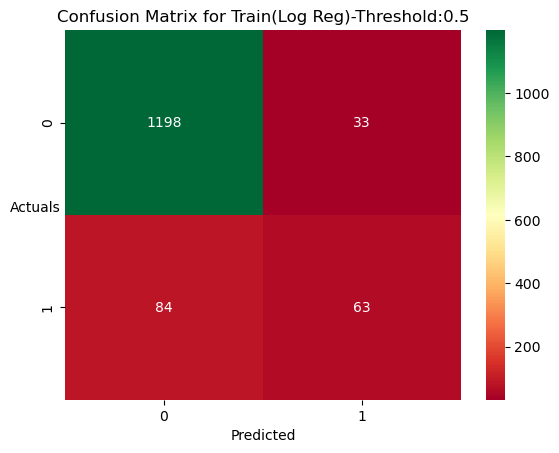

In [81]:
sns.heatmap((metrics.confusion_matrix(Default_imputed_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='RdYlGn').set_title("Confusion Matrix for Train(Log Reg)-Threshold:0.5");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [82]:
print(metrics.classification_report(Default_imputed_train['Default'],y_class_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1231
         1.0       0.66      0.43      0.52       147

    accuracy                           0.92      1378
   macro avg       0.80      0.70      0.74      1378
weighted avg       0.90      0.92      0.91      1378



In [83]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_imputed_train['Default'],y_prob_pred_train)

In [84]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.11347520775037373

In [85]:
from sklearn.metrics import roc_auc_score,roc_curve

In [86]:
auc_train_log = roc_auc_score(Default_imputed_train['Default'],y_prob_pred_train)
auc_train_log

0.9176544703990451

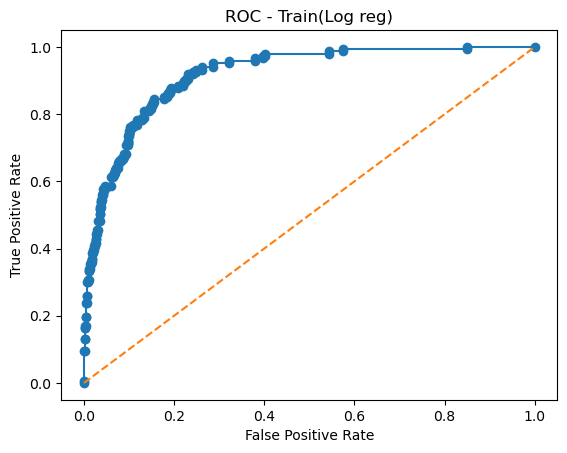

In [87]:
fpr, tpr,_=roc_curve(Default_imputed_train['Default'],y_prob_pred_train)
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(Log reg)')
plt.show()

In [88]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

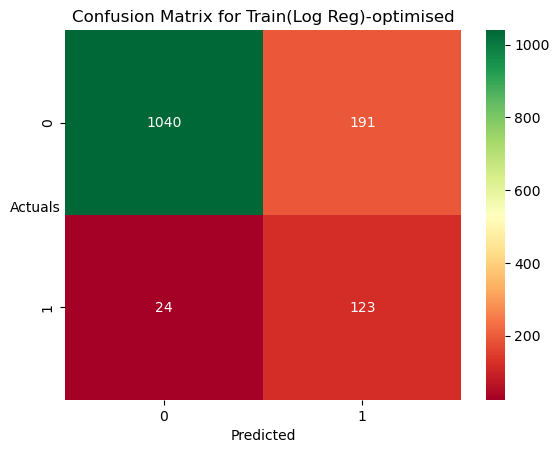

In [89]:
sns.heatmap((metrics.confusion_matrix(Default_imputed_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='RdYlGn').set_title("Confusion Matrix for Train(Log Reg)-optimised");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [90]:
print(metrics.classification_report(Default_imputed_train['Default'],y_class_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      1231
         1.0       0.39      0.84      0.53       147

    accuracy                           0.84      1378
   macro avg       0.68      0.84      0.72      1378
weighted avg       0.91      0.84      0.87      1378



In [91]:
y_prob_pred_test = model_3.predict(Default_imputed_test)

In [92]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

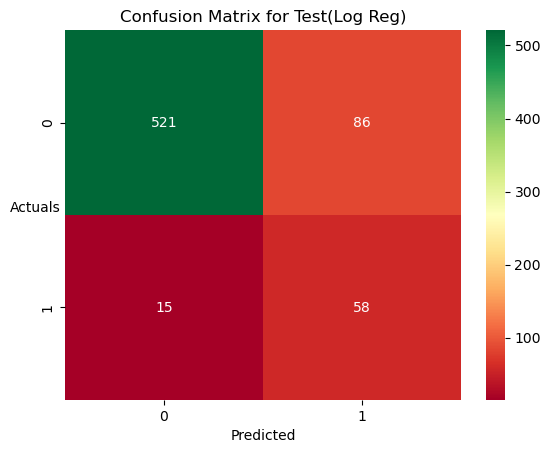

In [93]:
sns.heatmap((metrics.confusion_matrix(Default_imputed_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='RdYlGn').set_title("Confusion Matrix for Test(Log Reg)");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [94]:
print(metrics.classification_report(Default_imputed_test['Default'],y_class_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91       607
         1.0       0.40      0.79      0.53        73

    accuracy                           0.85       680
   macro avg       0.69      0.83      0.72       680
weighted avg       0.91      0.85      0.87       680



In [95]:
auc_test_log = roc_auc_score(Default_imputed_test['Default'],y_prob_pred_test)
auc_test_log

0.9031843108934576

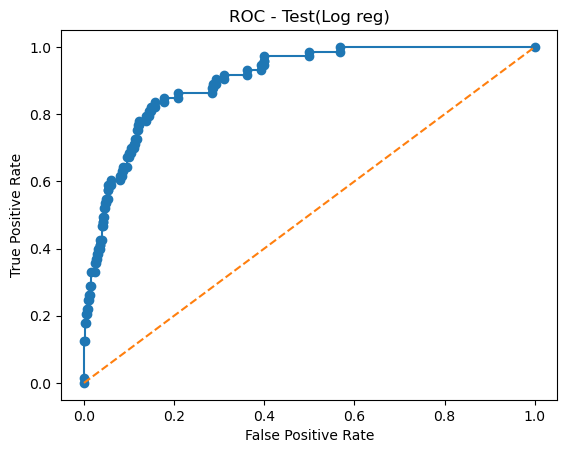

In [96]:
fpr, tpr,_=roc_curve(Default_imputed_test['Default'],y_prob_pred_test)
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(Log reg)')
plt.show()

### LDA

In [97]:
X_train = Default_imputed_train.drop('Default', axis = 1)
y_train = Default_imputed_train['Default']
X_test = Default_imputed_test.drop('Default', axis = 1)
y_test = Default_imputed_test['Default']

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [99]:
LDA = LinearDiscriminantAnalysis()

In [100]:
lda_model = LDA.fit(X_train, y_train)

In [101]:
pred_train_lda_0 = lda_model.predict(X_train)
pred_test_lda_0 = lda_model.predict(X_test)
print('Train Accuracy: {}'.format(lda_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(lda_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_lda_0))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_lda_0))

Train Accuracy: 0.9129172714078374
Test Accuracy: 0.8897058823529411

Classification Report Train
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1231
         1.0       0.60      0.55      0.57       147

    accuracy                           0.91      1378
   macro avg       0.77      0.75      0.76      1378
weighted avg       0.91      0.91      0.91      1378


Classification Report Test
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       607
         1.0       0.49      0.47      0.48        73

    accuracy                           0.89       680
   macro avg       0.71      0.70      0.71       680
weighted avg       0.89      0.89      0.89       680



In [102]:
from sklearn.model_selection import GridSearchCV
model_LDA= LinearDiscriminantAnalysis()
params_LDA = {'solver':['svd','lsqr','eigen']}
grid_search_LDA = GridSearchCV(estimator = model_LDA, param_grid = params_LDA, cv = 10,n_jobs=-1,scoring='recall',verbose=1)
grid_search_LDA.fit(X_train, y_train)
LDA_model = grid_search_LDA.best_estimator_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [103]:
pred_train_lda_model = LDA_model.predict(X_train)
pred_test_lda_model = LDA_model.predict(X_test)
print('Train Accuracy: {}'.format(LDA_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(LDA_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_lda_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_lda_model))

Train Accuracy: 0.9129172714078374
Test Accuracy: 0.8897058823529411

Classification Report Train
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1231
         1.0       0.60      0.55      0.57       147

    accuracy                           0.91      1378
   macro avg       0.77      0.75      0.76      1378
weighted avg       0.91      0.91      0.91      1378


Classification Report Test
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       607
         1.0       0.49      0.47      0.48        73

    accuracy                           0.89       680
   macro avg       0.71      0.70      0.71       680
weighted avg       0.89      0.89      0.89       680



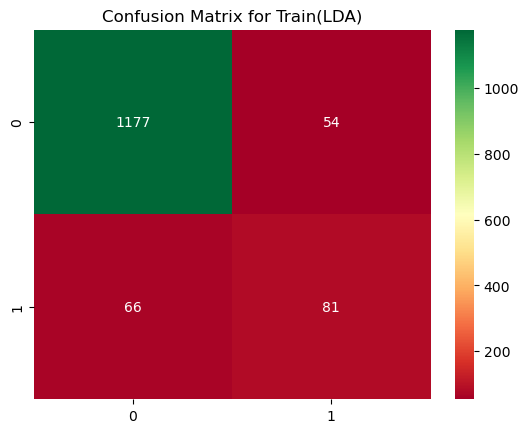

In [104]:
from sklearn.metrics import confusion_matrix
c_m_train_lda = pd.DataFrame(confusion_matrix(y_train, pred_train_lda_model))
sns.heatmap(c_m_train_lda,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Train(LDA)")
plt.show()

In [105]:
pred_train_lda_prob = LDA_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = LDA_model.predict_proba(X_test)[:,1]

In [106]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [107]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.03782394644258394

In [108]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

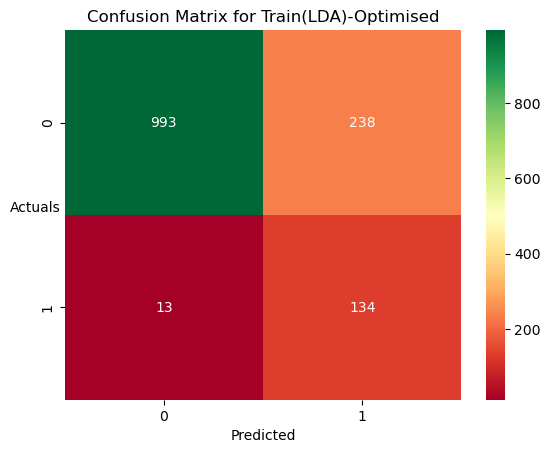

In [109]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='RdYlGn').set_title("Confusion Matrix for Train(LDA)-Optimised");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [110]:
print(metrics.classification_report(y_train, y_class_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89      1231
         1.0       0.36      0.91      0.52       147

    accuracy                           0.82      1378
   macro avg       0.67      0.86      0.70      1378
weighted avg       0.92      0.82      0.85      1378



In [111]:
auc_train_lda = roc_auc_score(y_train,pred_train_lda_prob)
auc_train_lda

0.9234845847356002

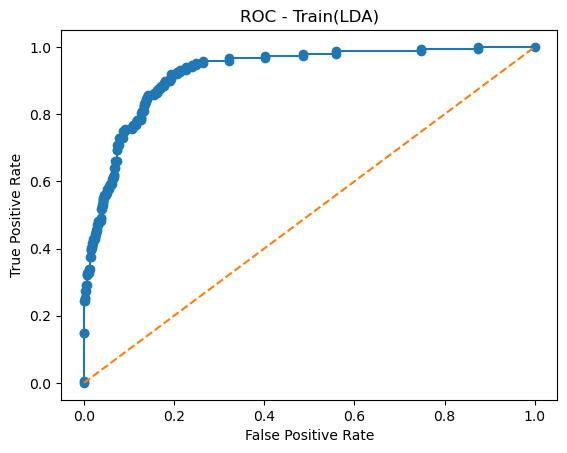

In [112]:
fpr, tpr,_=roc_curve(y_train,pred_train_lda_prob)
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(LDA)')
plt.show()

In [113]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

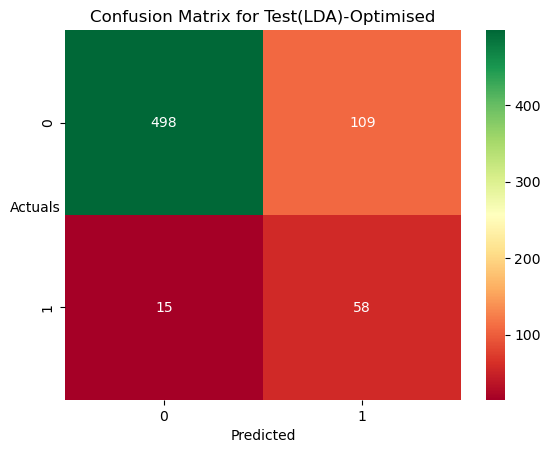

In [114]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='RdYlGn').set_title("Confusion Matrix for Test(LDA)-Optimised");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [115]:
print(metrics.classification_report(y_test, y_class_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89       607
         1.0       0.35      0.79      0.48        73

    accuracy                           0.82       680
   macro avg       0.66      0.81      0.69       680
weighted avg       0.90      0.82      0.85       680



In [116]:
auc_test_lda = roc_auc_score(y_test,pred_test_lda_prob)
auc_test_lda

0.8796235697682291

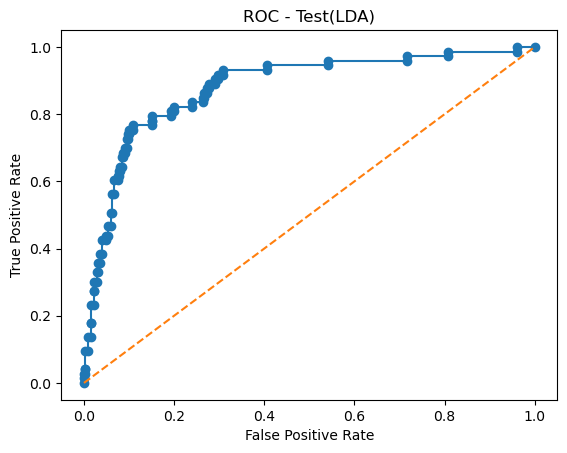

In [117]:
fpr, tpr,_=roc_curve(y_test,pred_test_lda_prob)
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(LDA)')
plt.show()

### Random Forest

In [118]:
np.random.seed(1)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
params_RF = {'criterion':['gini','entropy'],
         'n_estimators':list(range(100,1000,2)),
         'min_samples_leaf':list(range(1,10)),
         'max_features':list(range(1,15)),
         'max_samples':list(np.arange(0.1,1))}
grid_search_RF = RandomizedSearchCV(estimator = model_RF, param_distributions = params_RF, cv = 10,n_jobs=-1,scoring='recall',verbose=1)
grid_search_RF.fit(X_train,y_train)
RF_model = grid_search_RF.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [119]:
grid_search_RF.best_params_

{'n_estimators': 894,
 'min_samples_leaf': 2,
 'max_samples': 0.1,
 'max_features': 11,
 'criterion': 'entropy'}

In [120]:
pred_train_RF_model = RF_model.predict(X_train)
pred_test_RF_model = RF_model.predict(X_test)
print('Train Accuracy: {}'.format(RF_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(RF_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_RF_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_RF_model))

Train Accuracy: 0.9252539912917271
Test Accuracy: 0.9073529411764706

Classification Report Train
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1231
         1.0       0.87      0.35      0.50       147

    accuracy                           0.93      1378
   macro avg       0.90      0.67      0.73      1378
weighted avg       0.92      0.93      0.91      1378


Classification Report Test
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       607
         1.0       0.68      0.26      0.38        73

    accuracy                           0.91       680
   macro avg       0.80      0.62      0.66       680
weighted avg       0.89      0.91      0.89       680



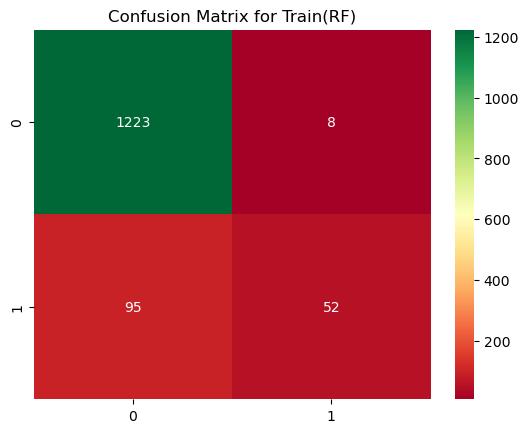

In [121]:
c_m_train_RF = pd.DataFrame(confusion_matrix(y_train, pred_train_RF_model))
sns.heatmap(c_m_train_RF,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Train(RF)")
plt.show()

In [122]:
probs_train_RF = RF_model.predict_proba(X_train)
probs_train_RF = probs_train_RF[:, 1]
auc_train_RF = roc_auc_score(y_train,probs_train_RF)
auc_train_RF

0.9514304503279785

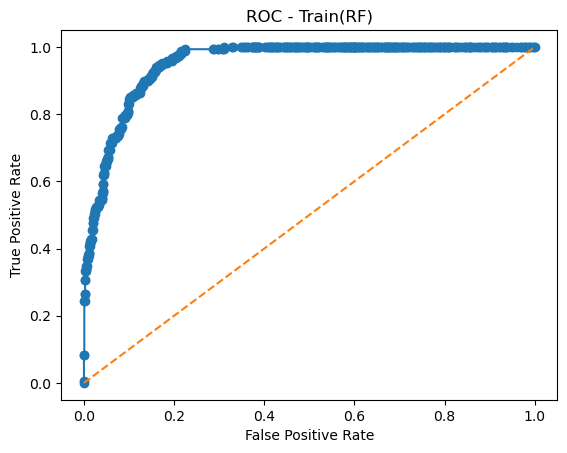

In [123]:
fpr, tpr,_=roc_curve(y_train,RF_model.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(RF)')
plt.show()

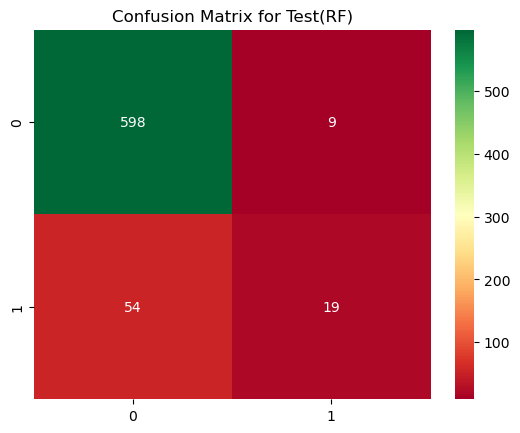

In [124]:
c_m_test_RF = pd.DataFrame(confusion_matrix(y_test, pred_test_RF_model))
sns.heatmap(c_m_test_RF,annot = True,fmt = '.5g',cmap = 'RdYlGn').set_title("Confusion Matrix for Test(RF)")
plt.show()

In [125]:
probs_test_RF = RF_model.predict_proba(X_test)
probs_test_RF = probs_test_RF[:, 1]
auc_test_RF = roc_auc_score(y_test,pred_test_RF_model)
auc_test_RF

0.6227234772404143

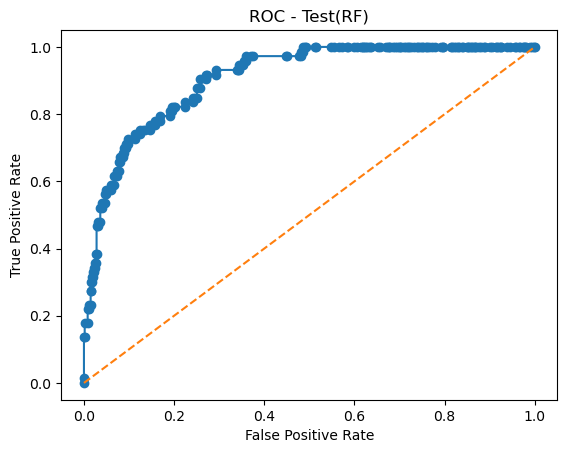

In [126]:
fpr, tpr,_=roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(RF)')
plt.show()